 <center>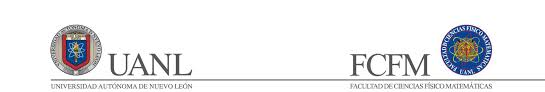  </center>



<h1>  <center>  Aprendizaje Automático   </center>    <h1>   

<t1>    <center>    <b> Practica:  </b> Explorar Datos  de Empleados de las dependencias de la UANL  </center>  </t1>

<t1>   <center>   
   <b>   Nombre  </b>    Cynthia  Selene Martínez Espinoza <b>  Matricula   </b> 1011238                            
</center>   </t1>

<h2> Explorar Datos   </h2>

In [97]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from scipy.stats import f_oneway, kruskal, normaltest, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [86]:
# Leer los datos de archivo csv, typed_uanl.csv con el URL
url = "https://raw.githubusercontent.com/ppGodel/data_mining/main/csv/typed_uanl.csv"
df = pd.read_csv(url)

<h2> Identificar Datos   </h2>

<t2> <b> Identificar las datos del Archivo </b> <span style="color: rgb(0, 128, 255)"> typed_uanl.csv : </bspan>
      
  - <b> Fecha:  </b> Fecha del dato  <span style="color: rgb(0, 128, 255)">  'Fecha'  </bspan>
  - <b> Nombre: </b> Nombre del empleado  <span style="color: rgb(0, 128, 255)"> 'Nombre' </bspan>
  - <b> Tipo:   </b> Tipo de Empleado  <span style="color: rgb(0, 128, 255)">  'Tipo' </bspan>
  - <b>Sueldo Neto: </b> Monto del Sueldo del empleado <span style="color: rgb(0, 128, 255)">  'Sueldo Neto' </bspan>
  - <b>Dependencia: </b> Dependencia de la UANL <span style="color: rgb(0, 128, 255)"> 'dependencia' </bspan>
  <t2>

<h2> Descriptivas Datos   </h2>

In [13]:
# Identificar los nombres de las columnas
print("Columnas :\n", df.columns)

Columnas :
 Index(['Nombre', 'Sueldo Neto', 'dependencia', 'Fecha', 'Tipo'], dtype='object')


In [14]:
# Obtener estadísticas descriptivas de cada entidad
EstadisticasDescriptivas = df.describe()
print(f"Estadísticas descriptivas:\n{EstadisticasDescriptivas}\n")

Estadísticas descriptivas:
         Sueldo Neto
count  636201.000000
mean    14241.682401
std      9578.442311
min       175.410000
25%      8007.660000
50%     11426.500000
75%     17654.630000
max    147051.590000



<h2>  Hallazgos   </h2>

<t2>   <span style="color:red"> Hallazgos </bspan>   (Datos Agrupados por fecha) :     
  - Al conocer la desviacion estandar por fecha se identifican con mayor desviacion los meses de Junio y diciembre a partir del 2020
  - La media de los meses de Junio y diciembre a partir del 2020 son muy elevadas, por lo que robustece lo encontrado en el punto anterior
  - La media mas baja se observa en el mes de Junio 2020 Dependencia de la UANL
  - No se cuenta con informacion de los meses de Diciembre 2021 y Enero 2022 
  - Solo contamos con el mes de Enero el 2024 (Agrupado_anio)
  - Los valores maximos por año los tiene el 2023, en base el crecimiento natural(Agrupado_anio)
  <t2>


<h2>  Explorando Datos   </h2>

In [18]:
# No se localizan valores nullos en la informacion
print(df.isnull().sum())

Nombre         0
Sueldo Neto    0
dependencia    0
Fecha          0
Tipo           0
dtype: int64


In [89]:
# Obtengo Medidas descriptivas agrupando por fecha
Agrupado_fecha = df.groupby('Fecha')['Sueldo Neto'].agg(['min', 'max', 'mean', 'std'])
#print(Agrupado_fecha)

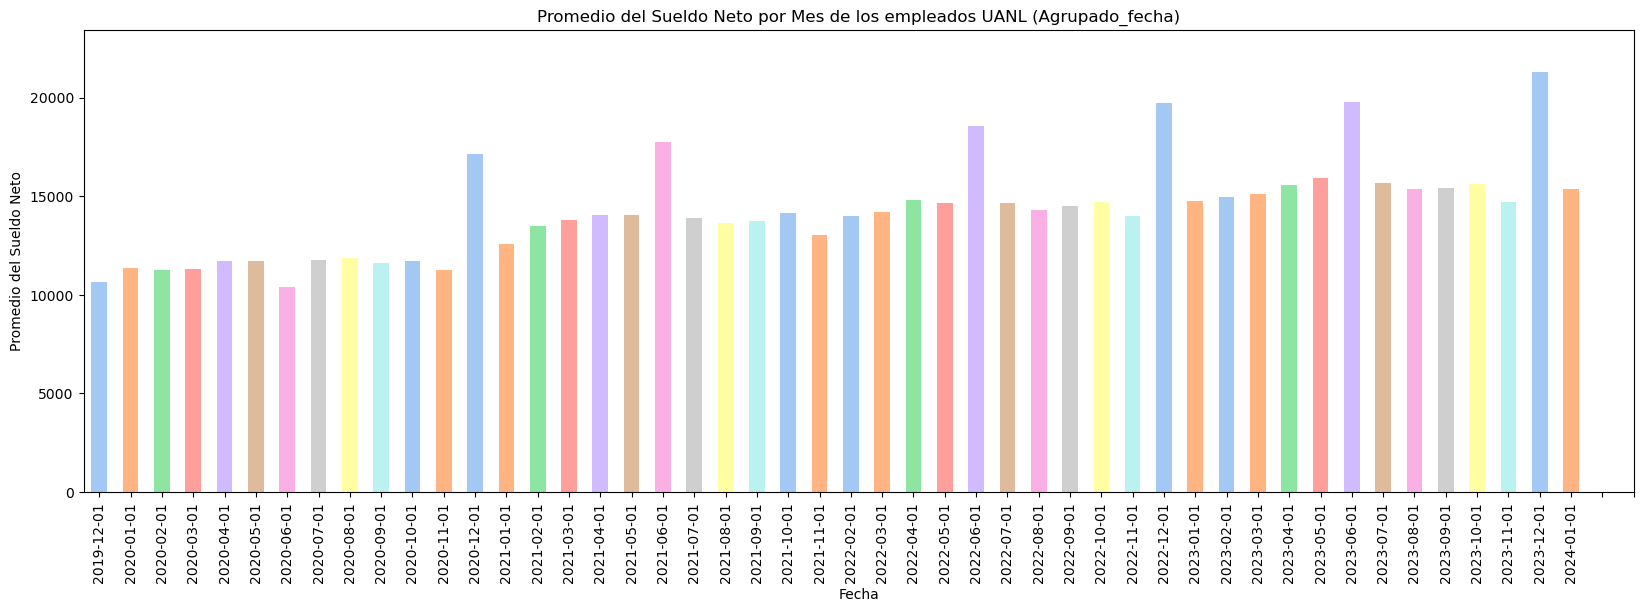

In [91]:
# Definir colores  para las barras
colors = sns.color_palette('pastel', 12)
# Gráfica de barras de las medias del Sueldo Neto por mes
plt.figure(figsize=(20, 6))
Agrupado_fecha['mean'].plot( kind='bar', color=colors)
plt.title(f'Promedio del Sueldo Neto por Mes de los empleados UANL (Agrupado_fecha)')
plt.ylabel('Promedio del Sueldo Neto')
plt.xticks(ticks=range(50)) 
plt.ylim(0, Agrupado_fecha['mean'].max() * 1.1)  # Ajuste del rango del eje y
plt.savefig("C:/Users/PC/Documents/ML003/Practicas/GraficaBarrasSueldoNeto_Agrupado_fecha.png")
plt.show()
plt.close()

In [20]:
# Agrupar por año y calcular estadísticas descriptivas
df['Año'] = df['Fecha'].dt.year
Agrupado_anio = df.groupby('Año')['Sueldo Neto'].agg(['min', 'max', 'mean', 'std'])
print(Agrupado_anio)

         min        max          mean           std
Año                                                
2019  294.44   86245.29  10640.372254   7764.839265
2020  175.41   98881.96  11949.890176   8794.587944
2021  187.54  138744.51  14014.582055   9296.192065
2022  189.65  140739.88  15291.581540   9669.770671
2023  230.03  147051.59  16209.321490  10075.871084
2024  825.27  111868.46  15371.374204   9796.259695


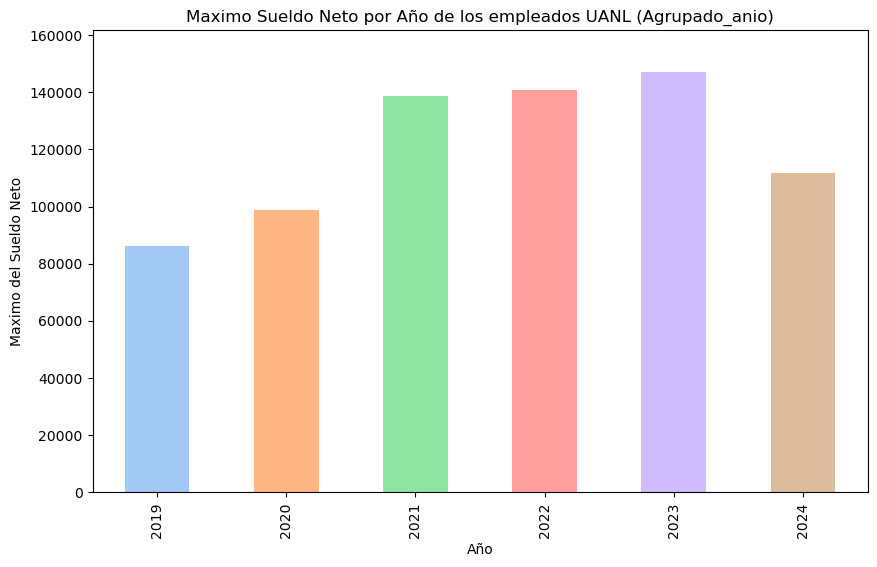

In [94]:
# Definir colores  para las barras
colors = sns.color_palette('pastel',6)
# Gráfica de barras de las medias del Sueldo Neto por mes
plt.figure(figsize=(10, 6))
Agrupado_anio['max'].plot( kind='bar', color=colors)
plt.title(f'Maximo Sueldo Neto por Año de los empleados UANL (Agrupado_anio)')
plt.ylabel('Maximo del Sueldo Neto')
plt.xticks(ticks=range(6)) 
plt.ylim(0, Agrupado_fecha['max'].max() * 1.1)  # Ajuste del rango del eje y
plt.savefig("C:/Users/PC/Documents/ML003/Practicas/GraficaBarrasSueldoMax_Agrupado_Anio.png")
plt.show()
plt.close()

In [95]:
# Agrupar por tipo y calcular la media y suma del Sueldo Neto
agrupado_tipo = df.groupby(df['Tipo'])['Nombre'].agg(['count'])
print(agrupado_tipo)

               count
Tipo                
ADMIN          76994
CENTRO         25117
FACULTAD      274527
HOSPITAL      105549
OTRO           12190
PREPARATORIA  141824


C:\Users\PC\AppData\Local\Temp\ipykernel_15680\3771360855.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("Blues")


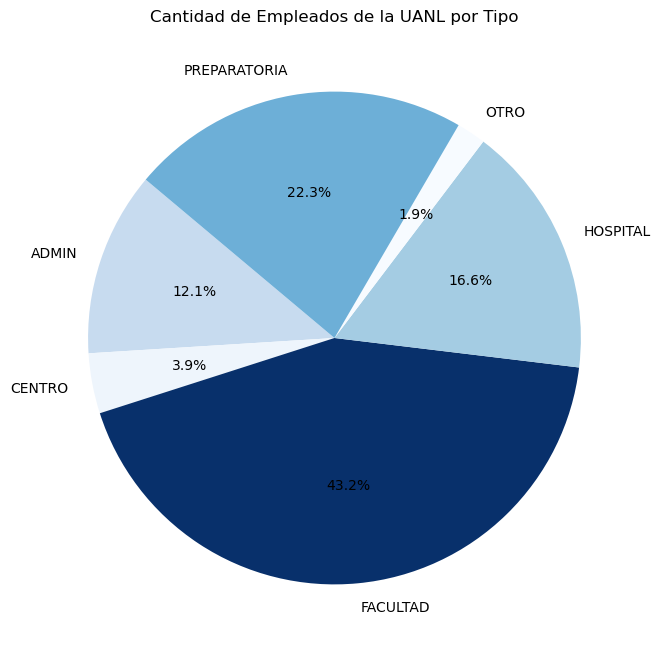

In [99]:
# Normalizar los valores
normdata = colors.Normalize(vmin= agrupado_tipo['count'].min(), vmax= agrupado_tipo['count'].max())
colormap = plt.cm.get_cmap("Blues")
#colormap =plt.cm.viridis
colores =colormap(normdata(agrupado_tipo['count']))

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))  # Tamaño de la figura
plt.pie(agrupado_tipo['count'], labels=agrupado_tipo.index, autopct='%1.1f%%', startangle=140, colors=colores)

# Añadir título
plt.title('Cantidad de Empleados de la UANL por Tipo')

# Guardar la gráfica en un archivo
plt.savefig("C:/Users/PC/Documents/ML003/Practicas/GraficaPastelCantidadEmpleados_Agrupado_tipo.png")
# Mostrar la gráfica
plt.show()
plt.close()

<h2>  Analizando el Sueldo neto  </h2>

<t2>   <span style="color:red"> Hallazgos </bspan>   (max_sueldo) :     
  - Se encuentra un sueldo levado en el mes de Junio 23,  se encuentra en dos dependencias el empleado recibiendo un sueldo de 230,517.48 en cada una   ( VICTOR EDUARDO SANCHEZ PLASCENCIA) 
  - Junio 2021, 2022,  se tienen una media elevada,  vemos que el sueldo del rector esos meses esta arriba de la media
  - La media mas baja se observa en el mes de Junio 2020 Dependencia de la UANL
  
  <t2>

<h2> Consultas </h2>

In [116]:
#  Obtener los sueldos netos por fecha , empleado
#   Sumar sueldos por fecha y empleado
suma_sueldo = df.groupby(['Fecha', 'Nombre'])['Sueldo Neto'].sum().reset_index()
print("Suma de sueldos por fecha y empleado:")
print(suma_sueldo)

Suma de sueldos por fecha y empleado:
            Fecha                               Nombre  Sueldo Neto
0      2019-12-01        AARON ABDIEL TREJO VILLALOBOS      3518.39
1      2019-12-01                    AARON CRUZ VARGAS      4835.71
2      2019-12-01        AARON EDGARDO ESPINOZA GARCIA       714.28
3      2019-12-01          AARON GERALDO SOTO ESPINOZA      5561.06
4      2019-12-01   AARON GILBERTO VILLARREAL ELIZONDO     36523.66
...           ...                                  ...          ...
632473 2024-01-01              ZULLY BAZALDUA GUERRERO      9211.97
632474 2024-01-01                  ZULMA ESPINOZA MATA      5342.94
632475 2024-01-01        ZULY MARLENE COVARRUBIAS MATA      7554.58
632476 2024-01-01          ZURYA VANESSA LLAMAS MEDINA     11928.65
632477 2024-01-01  ZUZANKA ALEJANDRA VILLARREAL ARIZPE     23273.49

[632478 rows x 3 columns]


In [123]:
# Encontrar el sueldo neto maximo por fecha sin distinguir dependencia
# Agrupar por fecha y nombre, sueldo neto maximo 
max_sueldo = suma_sueldo.loc[suma_sueldo.groupby('Fecha')['Sueldo Neto'].idxmax()].reset_index(drop=True)
print(max_sueldo )

        Fecha                             Nombre  Sueldo Neto
0  2019-12-01              REYES S. TAMEZ GUERRA     86245.29
1  2020-01-01              REYES S. TAMEZ GUERRA     97698.38
2  2020-02-01              REYES S. TAMEZ GUERRA     97274.55
3  2020-03-01              REYES S. TAMEZ GUERRA     89433.90
4  2020-04-01              REYES S. TAMEZ GUERRA     98881.96
5  2020-05-01              REYES S. TAMEZ GUERRA     98881.96
6  2020-06-01              REYES S. TAMEZ GUERRA     77608.82
7  2020-07-01              REYES S. TAMEZ GUERRA     98881.96
8  2020-08-01              REYES S. TAMEZ GUERRA     98881.96
9  2020-09-01              REYES S. TAMEZ GUERRA     98881.96
10 2020-10-01              REYES S. TAMEZ GUERRA     98881.96
11 2020-11-01              REYES S. TAMEZ GUERRA     89433.90
12 2020-12-01              JESUS ANCER RODRIGUEZ     93467.50
13 2021-01-01              REYES S. TAMEZ GUERRA    101260.38
14 2021-02-01              REYES S. TAMEZ GUERRA    101463.43
15 2021-

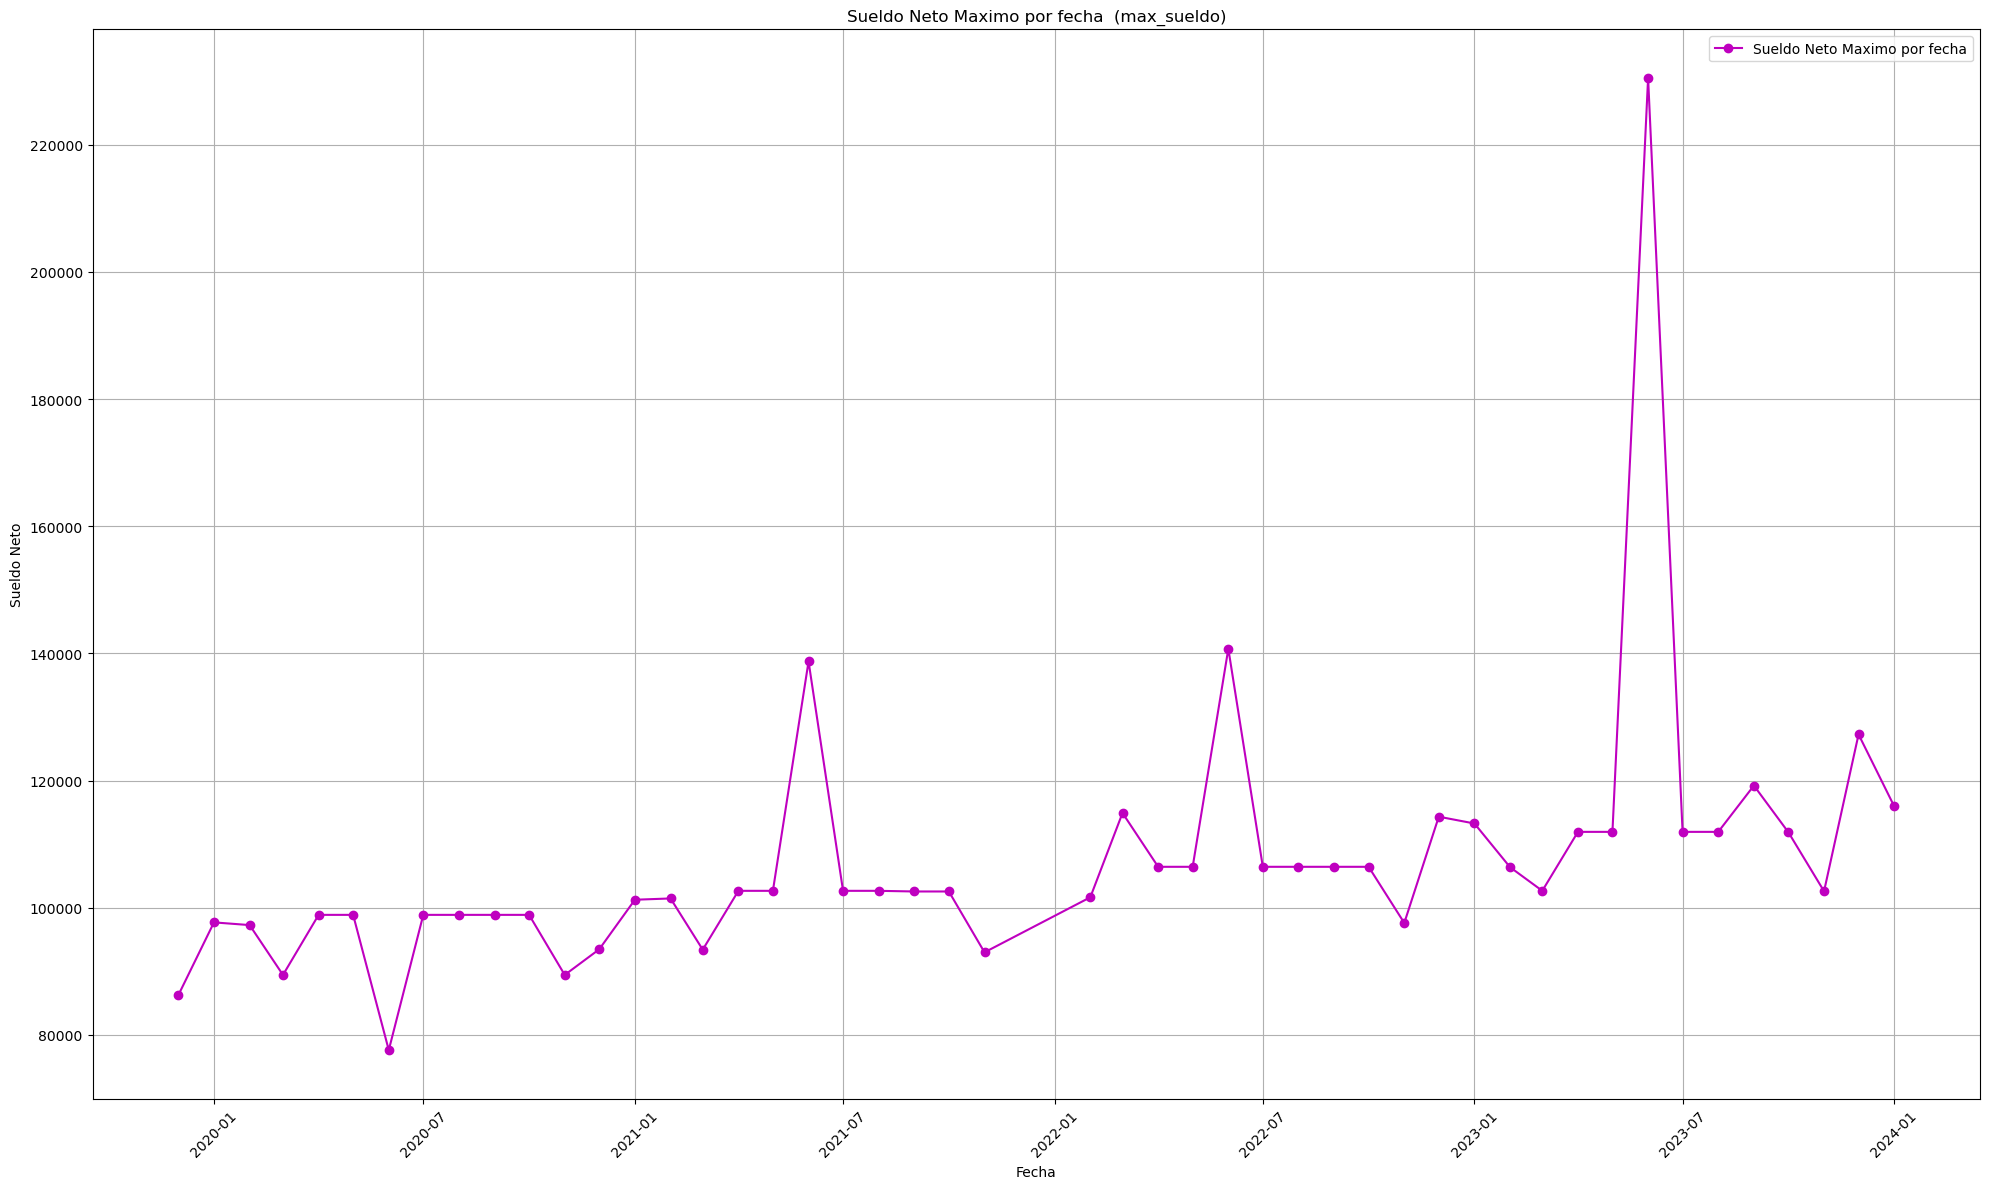

In [125]:
# Graficar los fechas con los sueltos netos maximos
plt.figure(figsize=(20, 12))
plt.plot(max_sueldo['Fecha'], max_sueldo['Sueldo Neto'], marker='o', linestyle='-', color='m', label='Sueldo Neto Maximo por fecha')

plt.xlabel('Fecha')
plt.ylabel('Sueldo Neto')
plt.title('Sueldo Neto Maximo por fecha  (max_sueldo)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar la gráfica en un archivo
plt.savefig("C:/Users/PC/Documents/ML003/Practicas/GraficaLineaMaxSueldo.png")
# Mostrar la gráfica
plt.show()
plt.close()


<t2>   <span style="color:red"> Hallazgos </bspan>   (max_sueldo) :     
  - Se encuentra un sueldo levado en el mes de Junio 23,  se encuentra en dos dependencias el empleado recibiendo un sueldo de 230,517.48 en cada una   ( VICTOR EDUARDO SANCHEZ PLASCENCIA) 
  - Junio 2021, 2022,  se tienen una media elevada,  vemos que el sueldo del rector esos meses esta arriba de la media
  - La media mas baja se observa en el mes de Junio 2020 Dependencia de la UANL
  
  <t2>

In [46]:
df_filtromayorsueldo = df[df['Nombre'].str.contains('VICTOR EDUARDO SANCHEZ PLASCENCIA', case=False, na=False)]
df_filtromayorsueldo.head(50)

Nombre  Sueldo Neto  \
20      VICTOR EDUARDO SANCHEZ PLASCENCIA     72171.38   
14430   VICTOR EDUARDO SANCHEZ PLASCENCIA     79086.70   
27131   VICTOR EDUARDO SANCHEZ PLASCENCIA     79141.75   
40996   VICTOR EDUARDO SANCHEZ PLASCENCIA     74360.51   
55206   VICTOR EDUARDO SANCHEZ PLASCENCIA     79998.30   
69515   VICTOR EDUARDO SANCHEZ PLASCENCIA     79998.30   
83685   VICTOR EDUARDO SANCHEZ PLASCENCIA     67107.77   
97938   VICTOR EDUARDO SANCHEZ PLASCENCIA     79998.30   
110486  VICTOR EDUARDO SANCHEZ PLASCENCIA     79998.29   
122779  VICTOR EDUARDO SANCHEZ PLASCENCIA     79998.29   
136685  VICTOR EDUARDO SANCHEZ PLASCENCIA     79998.29   
150694  VICTOR EDUARDO SANCHEZ PLASCENCIA     74360.51   
164728  VICTOR EDUARDO SANCHEZ PLASCENCIA     73154.37   
179615  VICTOR EDUARDO SANCHEZ PLASCENCIA     82376.72   
193555  VICTOR EDUARDO SANCHEZ PLASCENCIA     83009.41   
207088  VICTOR EDUARDO SANCHEZ PLASCENCIA     79150.93   
220986  VICTOR EDUARDO SANCHEZ PLASCENCIA     84633.62   
234897  VICTOR EDUARDO SANCHEZ PLASCENCIA     84633.62   
248798  VICTOR EDUARDO SANCHEZ PLASCENCIA    106934.82   
262638  VICTOR EDUARDO SANCHEZ PLASCENCIA     84633.62   
274838  VICTOR EDUARDO SANCHEZ PLASCENCIA     84633.62   
288338  VICTOR EDUARDO SANCHEZ PLASCENCIA     84531.62   
302122  VICTOR EDUARDO SANCHEZ PLASCENCIA     79906.19   
315226  VICTOR EDUARDO SANCHEZ PLASCENCIA     61356.26   
329041  VICTOR EDUARDO SANCHEZ PLASCENCIA     83632.45   
342014  VICTOR EDUARDO SANCHEZ PLASCENCIA     80990.34   
355095  VICTOR EDUARDO SANCHEZ PLASCENCIA     87015.58   
368227  VICTOR EDUARDO SANCHEZ PLASCENCIA     87015.58   
381345  VICTOR EDUARDO SANCHEZ PLASCENCIA    110106.14   
394433  VICTOR EDUARDO SANCHEZ PLASCENCIA     87015.58   
405894  VICTOR EDUARDO SANCHEZ PLASCENCIA     87015.58   
418518  VICTOR EDUARDO SANCHEZ PLASCENCIA     87015.58   
431510  VICTOR EDUARDO SANCHEZ PLASCENCIA     87015.58   
444621  VICTOR EDUARDO SANCHEZ PLASCENCIA     80990.35   
457727  VICTOR EDUARDO SANCHEZ PLASCENCIA     72364.56   
470851  VICTOR EDUARDO SANCHEZ PLASCENCIA     88364.56   
482353  VICTOR EDUARDO SANCHEZ PLASCENCIA     87485.23   
495175  VICTOR EDUARDO SANCHEZ PLASCENCIA     84987.70   
508180  VICTOR EDUARDO SANCHEZ PLASCENCIA     91244.58   
521321  VICTOR EDUARDO SANCHEZ PLASCENCIA     91244.58   
534446  VICTOR EDUARDO SANCHEZ PLASCENCIA    115258.74   
536820  VICTOR EDUARDO SANCHEZ PLASCENCIA    115258.74   
547565  VICTOR EDUARDO SANCHEZ PLASCENCIA     22708.45   
549690  VICTOR EDUARDO SANCHEZ PLASCENCIA     40403.13   
561259  VICTOR EDUARDO SANCHEZ PLASCENCIA     47064.67   

                     dependencia      Fecha          Tipo  
20                      RECTORIA 2019-12-01         ADMIN  
14430                   RECTORIA 2020-01-01         ADMIN  
27131                   RECTORIA 2020-02-01         ADMIN  
40996                   RECTORIA 2020-03-01         ADMIN  
55206                   RECTORIA 2020-04-01         ADMIN  
69515                   RECTORIA 2020-05-01         ADMIN  
83685                   RECTORIA 2020-06-01         ADMIN  
97938                   RECTORIA 2020-07-01         ADMIN  
110486                  RECTORIA 2020-08-01         ADMIN  
122779                  RECTORIA 2020-09-01         ADMIN  
136685                  RECTORIA 2020-10-01         ADMIN  
150694                  RECTORIA 2020-11-01         ADMIN  
164728                  RECTORIA 2020-12-01         ADMIN  
179615                  RECTORIA 2021-01-01         ADMIN  
193555                  RECTORIA 2021-02-01         ADMIN  
207088                  RECTORIA 2021-03-01         ADMIN  
220986                  RECTORIA 2021-04-01         ADMIN  
234897                  RECTORIA 2021-05-01         ADMIN  
248798                  RECTORIA 2021-06-01         ADMIN  
262638                  RECTORIA 2021-07-01         ADMIN  
274838                  RECTORIA 2021-08-01         ADMIN  
288338                  RECTORIA 2021-09-01   

<h2>  Trabajadores en distintas dependencias  </h2>

In [127]:
# Encontrar trabajadores en distintas dependencias
# Agrupar por nombre empleado,  para obtener solo empleados  y el conteo de las veces que aparecen
empleados_varias_dependencias = df.groupby('Nombre')['dependencia'].nunique()

In [128]:
# Filtrar empleados que trabajan en más de una dependencia
empleados_varias_dependencias = empleados_varias_dependencias[empleados_varias_dependencias > 1]

In [129]:
# Obtener la lista de empleados que trabajan en varias dependencias
empleados_varias_dependencias_lista = empleados_varias_dependencias.index.tolist()
print("Empleados que trabajan en varias dependencias:", empleados_varias_dependencias_lista)

In [130]:
# Se unen los datos para presentar la informacion de la depenencias en las cuales estan trabajando
# Hacer la union con (inner join) por la entidad por 'nombre' que es la llave 
df_uniondatos = pd.merge(df, empleados_varias_dependencias, on='Nombre', how='inner')


In [131]:
# Para conocer como quedaron los datos de la union
# Muestro los datos que se unieron, para explorar la informacion
# df_uniondatos.head(5)
# consulto las columnas con las que se dio de alta el dataframe
print("Columnas :\n", df_uniondatos.columns)

Columnas :
 Index(['Nombre', 'Sueldo Neto', 'dependencia_x', 'Fecha', 'Tipo',
       'dependencia_y'],
      dtype='object')


In [132]:
# De la union de datos UANL con Empleados en mas de una dependencia, se dejan los entidades a utilizar  
# quitar datos distintos
df_EmpleadosDepedenciaMas = df_uniondatos[['Nombre', 'Tipo', 'dependencia_x', 'dependencia_y']].drop_duplicates()
#df_EmpleadosDepedenciaMas.head(100)

In [151]:
df_filtroempleado = df_EmpleadosDepedenciaMas[df_EmpleadosDepedenciaMas['Nombre'].str.contains('VICTOR EDUARDO SANCHEZ PLASCENCIA', case=False, na=False)]
print(df_filtroempleado)

                                Nombre          Tipo  \
674  VICTOR EDUARDO SANCHEZ PLASCENCIA         ADMIN   
715  VICTOR EDUARDO SANCHEZ PLASCENCIA  PREPARATORIA   

                dependencia_x  dependencia_y  
674                  RECTORIA              2  
715  ESCUELA PREPARATORIA #12              2  


In [152]:
df_filtroempleado = df_EmpleadosDepedenciaMas[df_EmpleadosDepedenciaMas['Nombre'].str.contains('ELTON DAMIAN AGUILA GARCIA', case=False, na=False)]
print(df_filtroempleado)

                           Nombre          Tipo  \
44252  ELTON DAMIAN AGUILA GARCIA         ADMIN   
44262  ELTON DAMIAN AGUILA GARCIA  PREPARATORIA   

                                    dependencia_x  dependencia_y  
44252  DIRECCION DEL PROGRAMA DE FUTBOL AMERICANO              2  
44262          ESC.IND.Y PREPA.TEC.ALVARO OBREGON              2  


<h2> Graficas Barras fecha / dependencia </h2>

In [159]:
# Convertir la columna 'Fecha' a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [166]:
import os
# Crear una carpeta principal para las gráficas
if not os.path.exists('GraficasBarras_Fecha_Dependencia'):
    os.makedirs('C:/Users/PC/Documents/ML003/Practicas/GraficasBarras_Fecha_Dependencia')

In [178]:
import matplotlib.pyplot as plt

# Agrupar por fecha y dependencia y calcular estadísticas descriptivas
Agrupado_fecha_dependencia = df.groupby(['Fecha', 'dependencia'])['Sueldo Neto'].agg(['min', 'max', 'mean', 'std']).reset_index()
#print(Agrupado_fecha_dependencia)


In [180]:

# Graficar las estadísticas descriptivas para cada combinación de fecha y dependencia
for _, row in Agrupado_fecha_dependencia.iterrows():
    fecha = row['Fecha']
    dependencia = row['dependencia']
    data_fecha_dependencia = df[(df['Fecha'] == fecha) & (df['dependencia'] == dependencia)]['Sueldo Neto']
    
    plt.figure(figsize=(10, 6))
    
    # Gráfica de barras del sueldo neto por fecha y dependencia
    plt.bar(data_fecha_dependencia.index, data_fecha_dependencia, alpha=0.7, label='Sueldo Neto')
    #plt.plot(data_fecha_dependencia['Fecha'], data_fecha_dependencia['Sueldo Neto'], marker='o', linestyle='-', color='m', label='Sueldo Neto Maximo por fecha')

      # Mostrar estadísticas en la gráfica
    textstr = '\n'.join((
        f'Min: {row["min"]:.2f}',
        f'Max: {row["max"]:.2f}',
        f'Mean: {row["mean"]:.2f}',
        f'Std: {row["std"]:.2f}'))
    
    # Posición del texto
    plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(facecolor='white', alpha=0.5))
    
    # Mostrar leyenda y gráfico
    plt.legend()
    
    # Crear una subcarpeta para la fecha
    fecha_str = fecha.strftime('%Y-%m-%d')
    subfolder_path = os.path.join('C:/Users/PC/Documents/ML003/Practicas/GraficasBarras_Fecha_Dependencia', fecha_str)
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)
    
    # Guardar la gráfica en un archivo
    filename = f'{subfolder_path}/{dependencia}.png'
    plt.savefig(filename)
    plt.close()


<h2> Graficas histogramas por dependencia </h2>

In [165]:
import os
# Crear una carpeta principal para las gráficas
if not os.path.exists('graficasHistograma_dependencia'):
    os.makedirs('C:/Users/PC/Documents/ML003/Practicas/graficasHistograma_dependencia')


In [156]:
# Agrupar por dependencia y calcular estadísticas descriptivas
Agrupado_dependencia = df.groupby('dependencia')['Sueldo Neto'].agg(['min', 'max', 'mean', 'std'])
print(Agrupado_dependencia)


                                                        min       max  \
dependencia                                                             
AUDITORIA INTERNA DE LA U.A.N.L.                    2694.80  68323.61   
C. INNOVACION; INVEST. Y DESLLO. DE INGENIERIA ...  5045.30  35590.67   
C.DE ESTUDIOS HUMANISTICOS                          2895.11  43505.89   
C.DE INV.Y DES.DE ED.BILINGUE                       2903.41  77130.15   
CAPILLA ALFONSINA BIBLIOTECA UNIVERSITARIA          1535.48  78959.29   
...                                                     ...       ...   
TEATRO UNIVERSITARIO                                2611.44  67532.31   
TESORERIA GENERAL                                    245.38  87384.51   
UNIDAD DE TRANSPARENCIA                              285.73  49809.89   
WORLD TRADE CENTER MONTEREY-UANL                    7184.08  58697.17   
´CAPILLA ALFONSINA´ BIBLIOTECA UNIVERSITARIA         311.22  35182.17   

                                                  

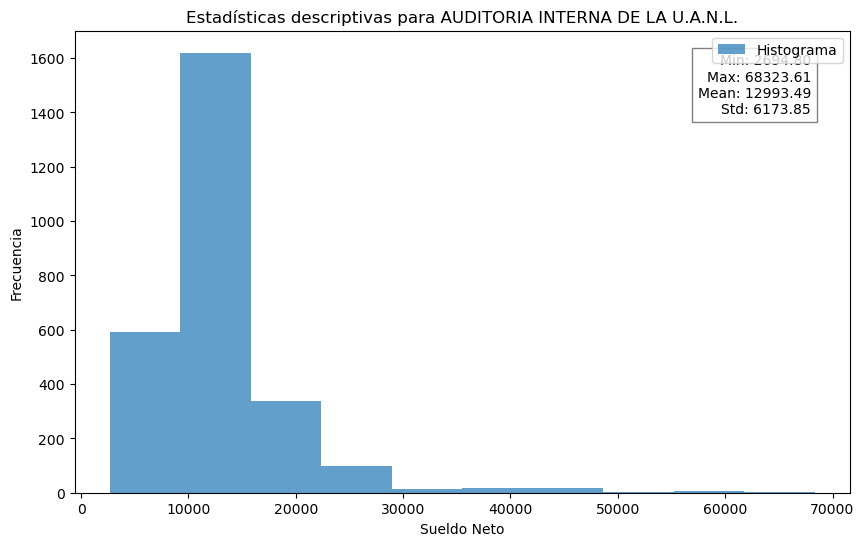

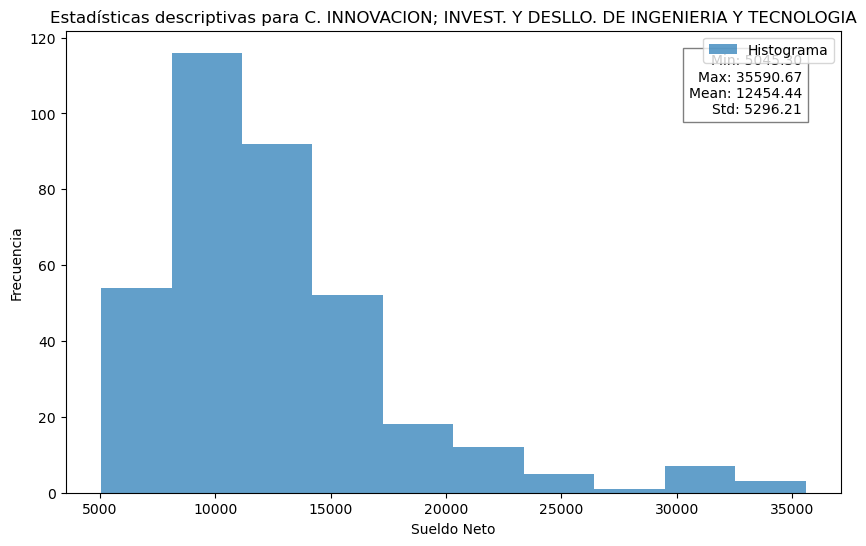

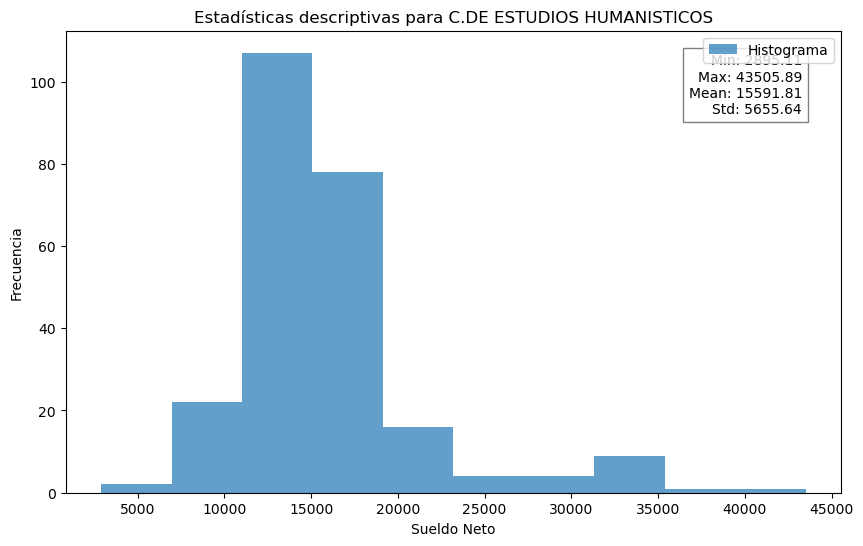

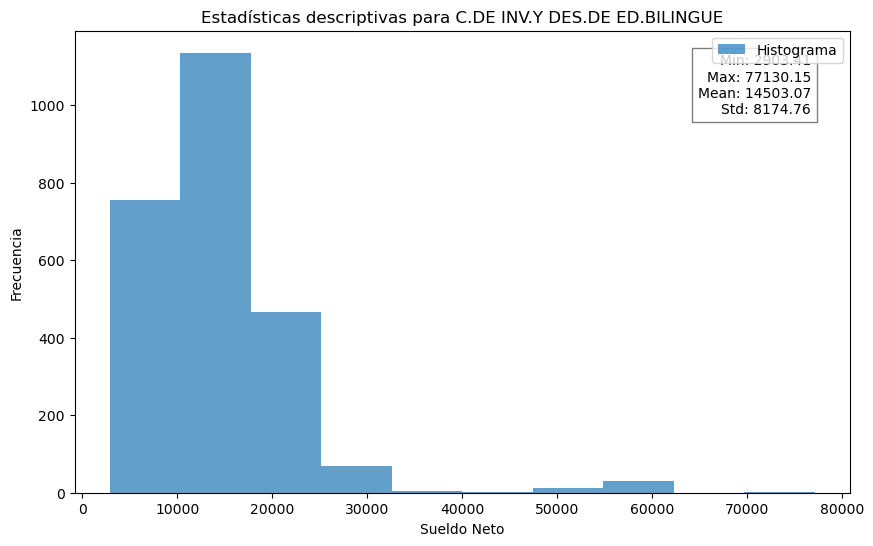

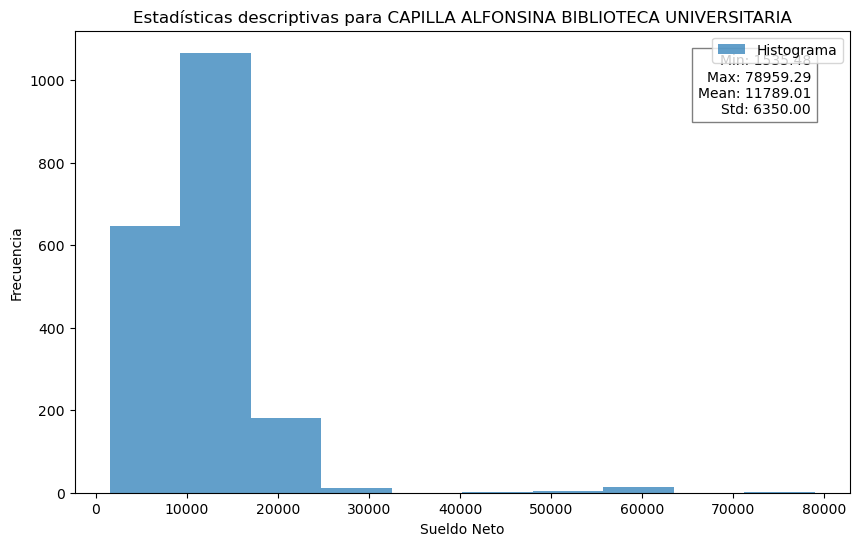

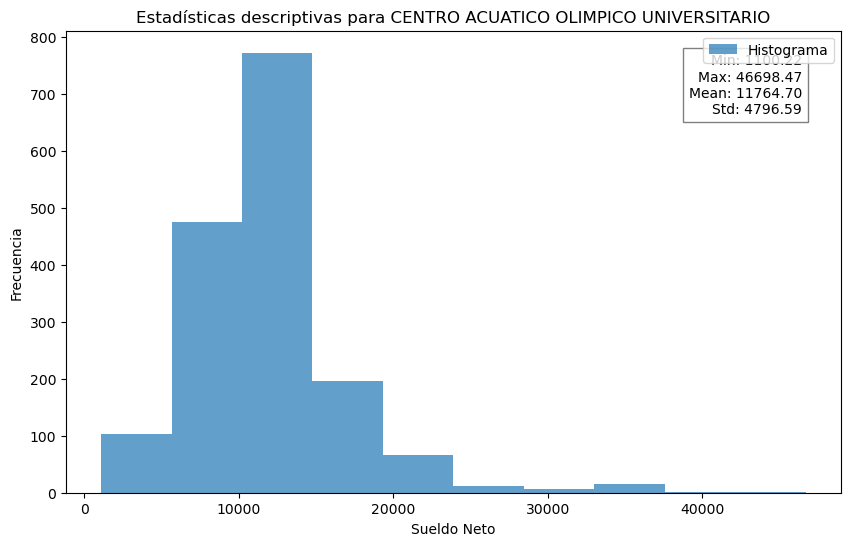

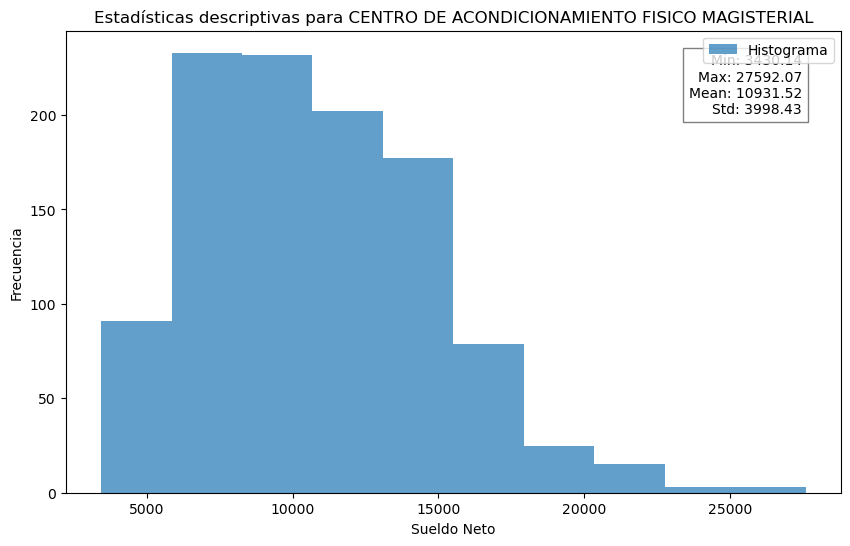

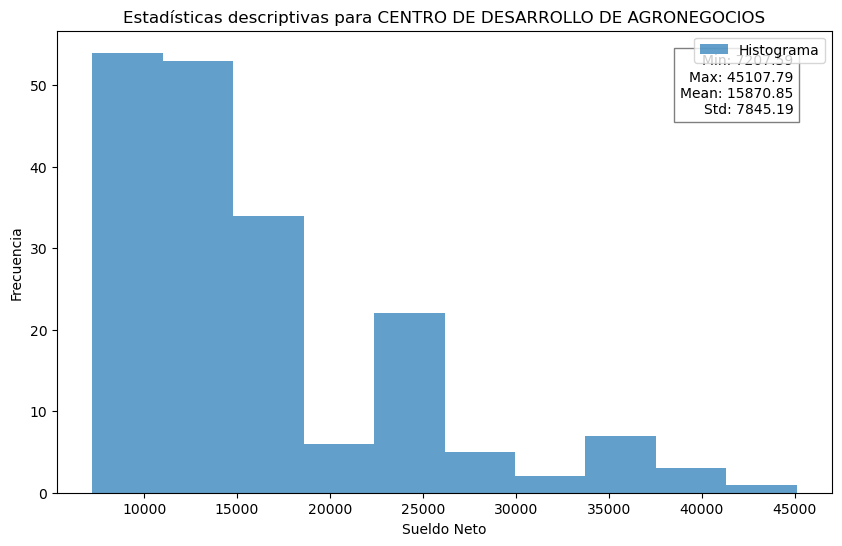

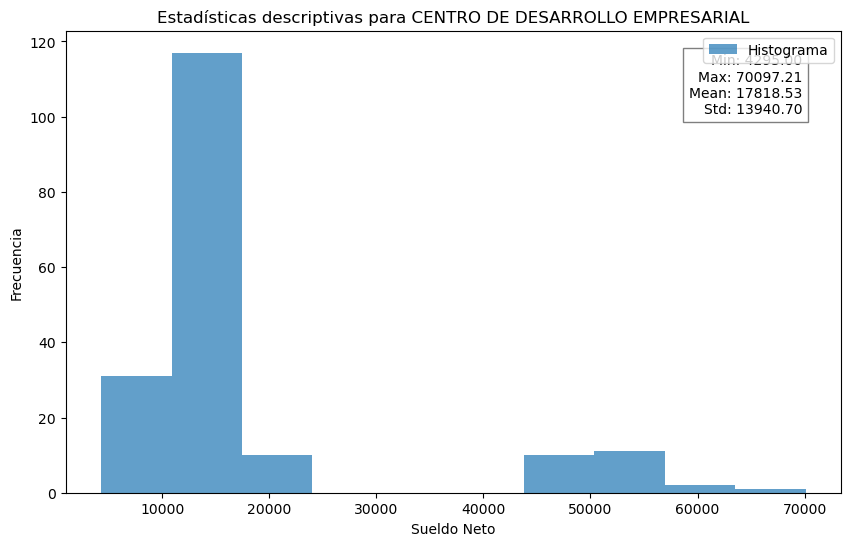

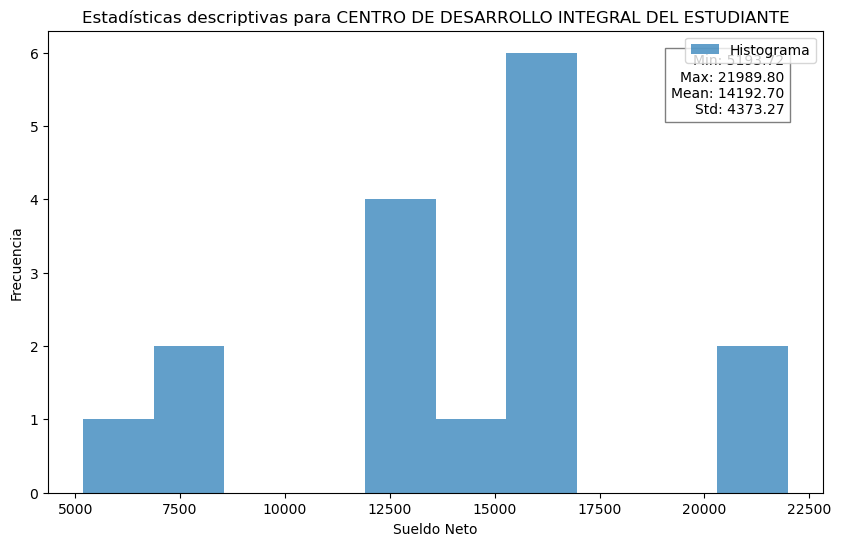

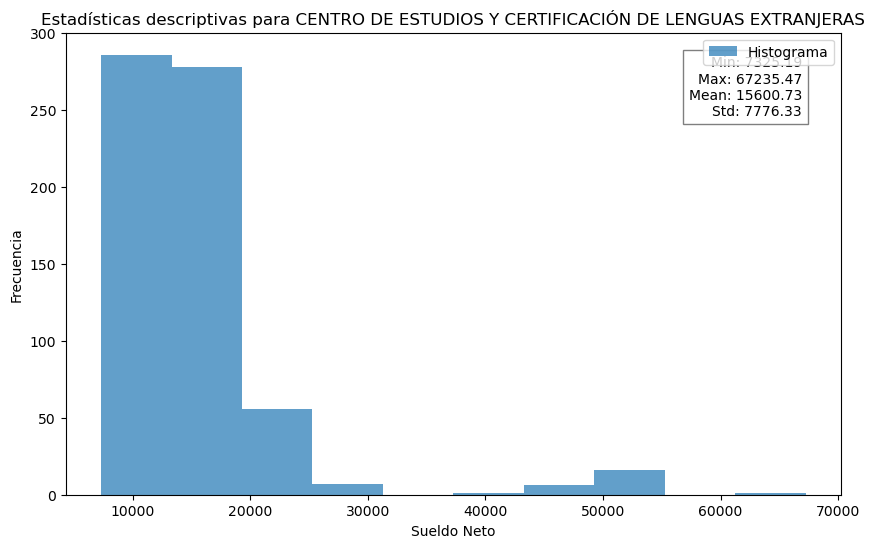

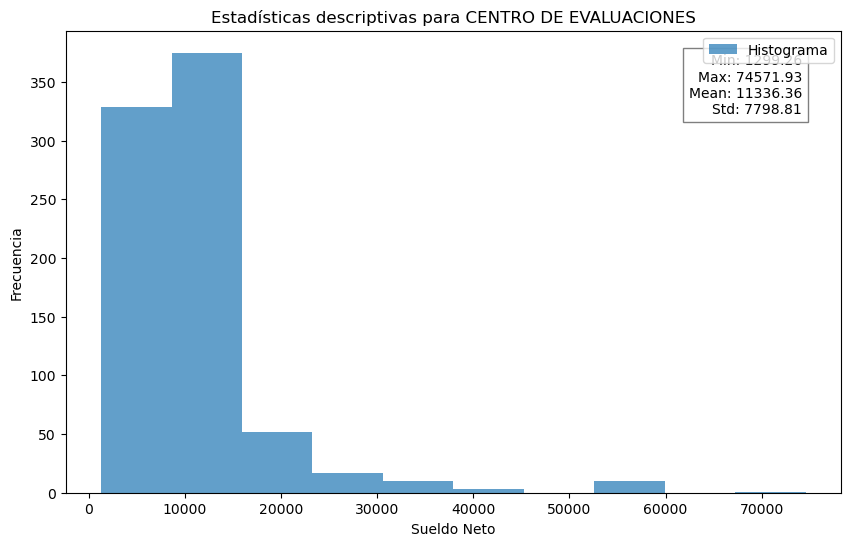

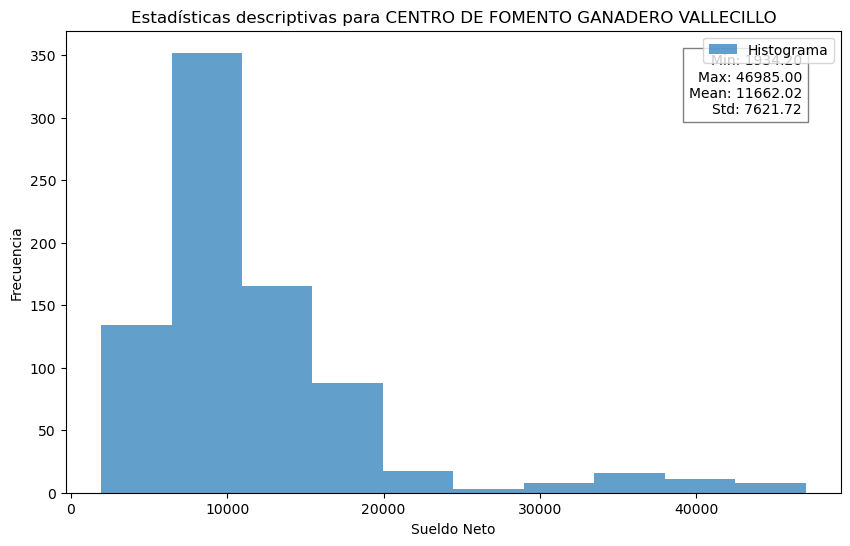

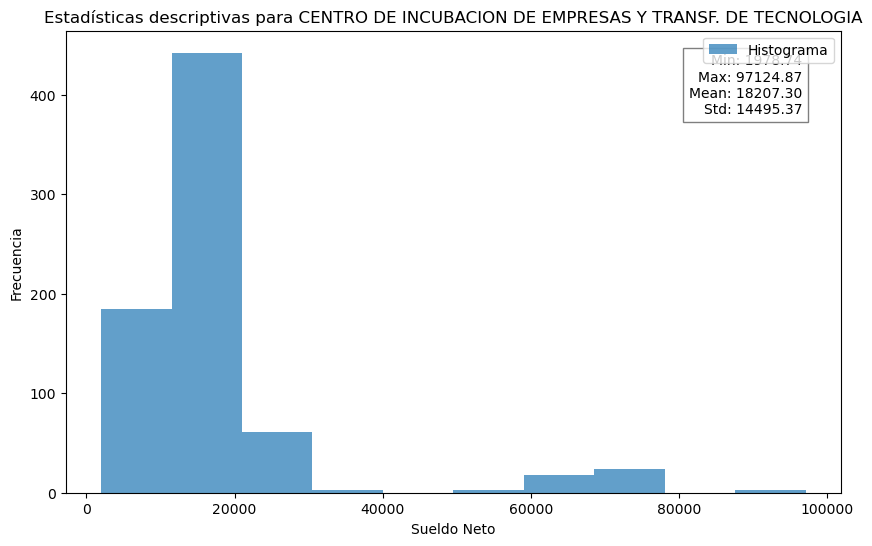

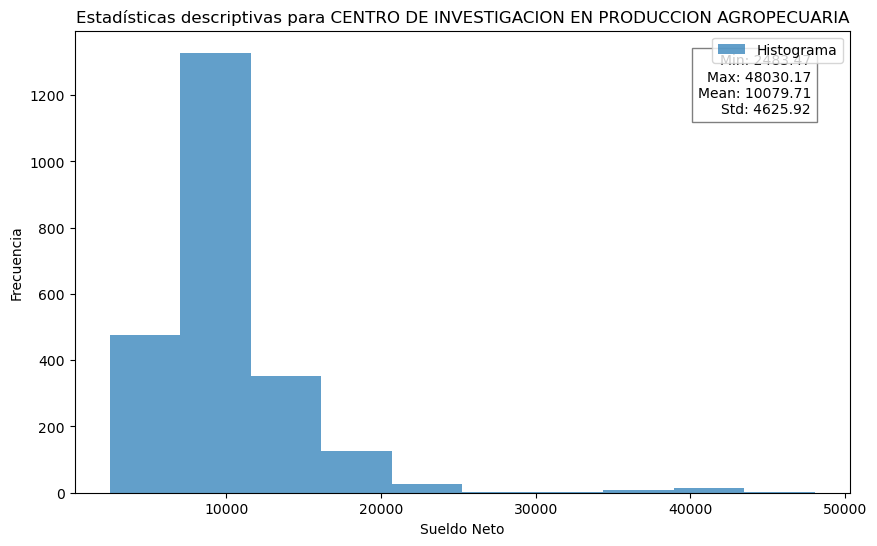

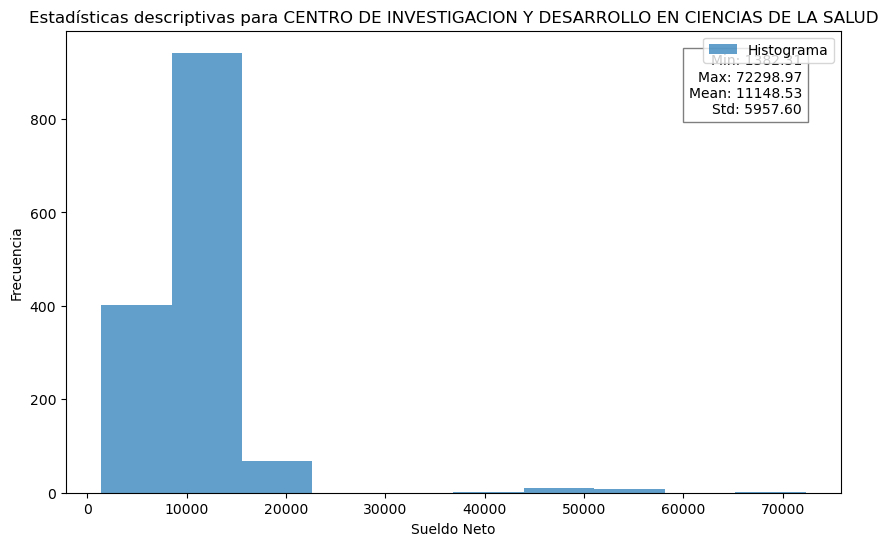

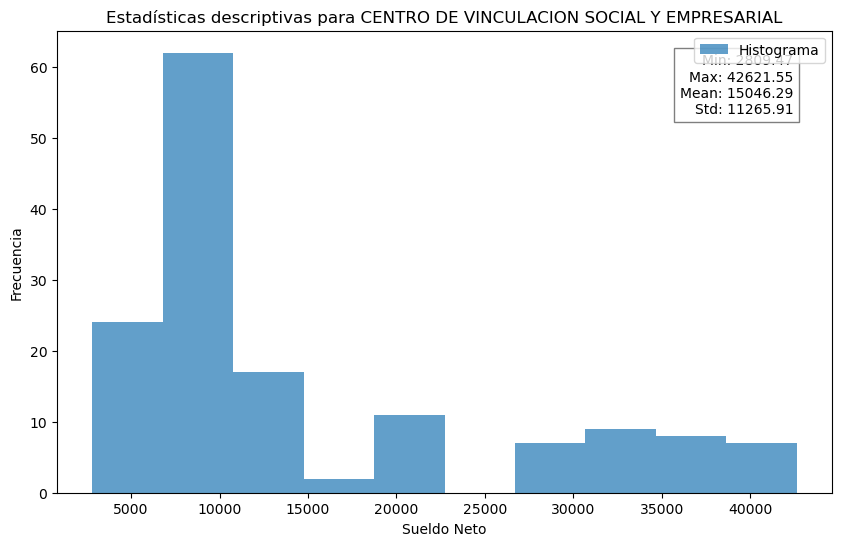

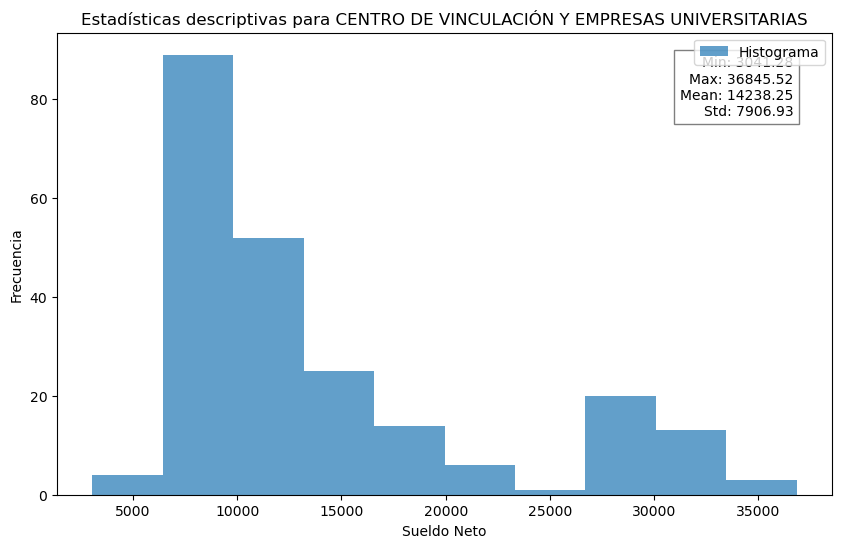

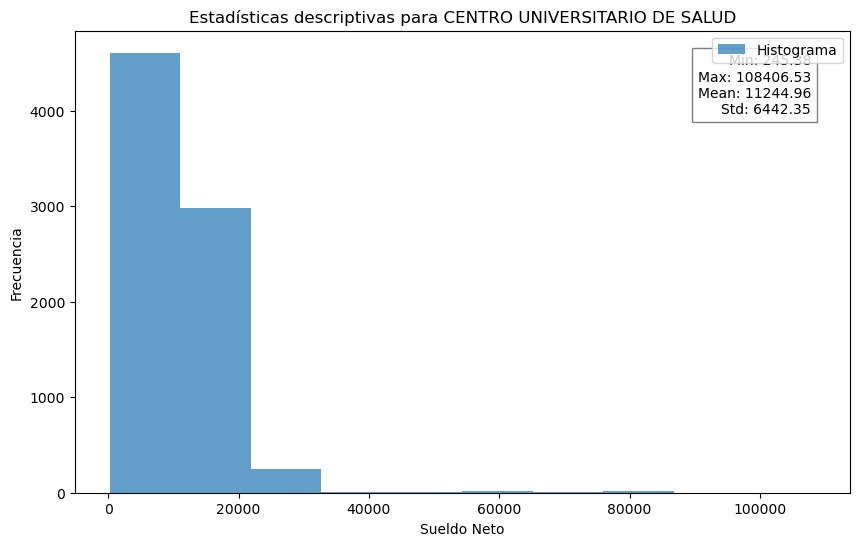

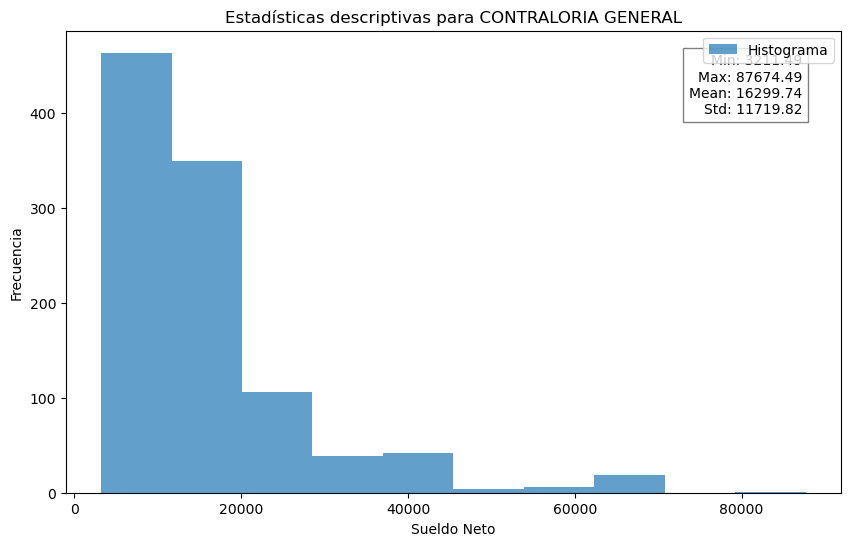

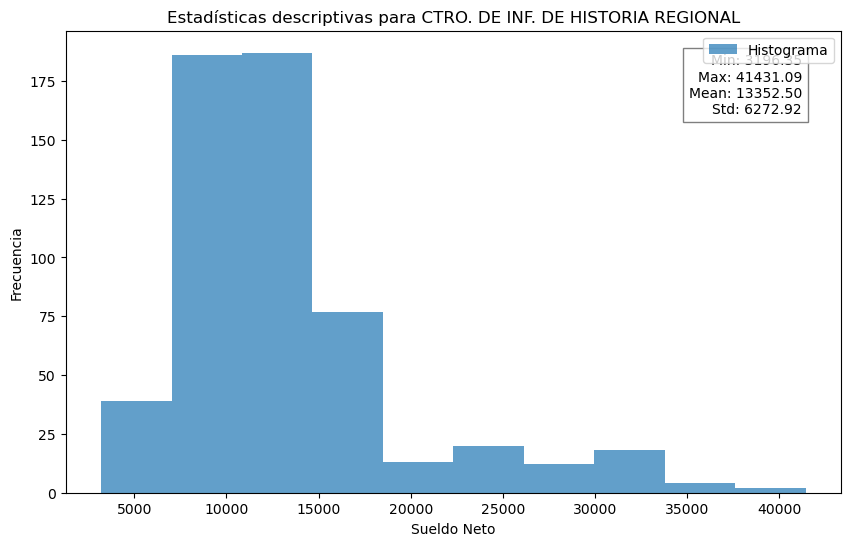

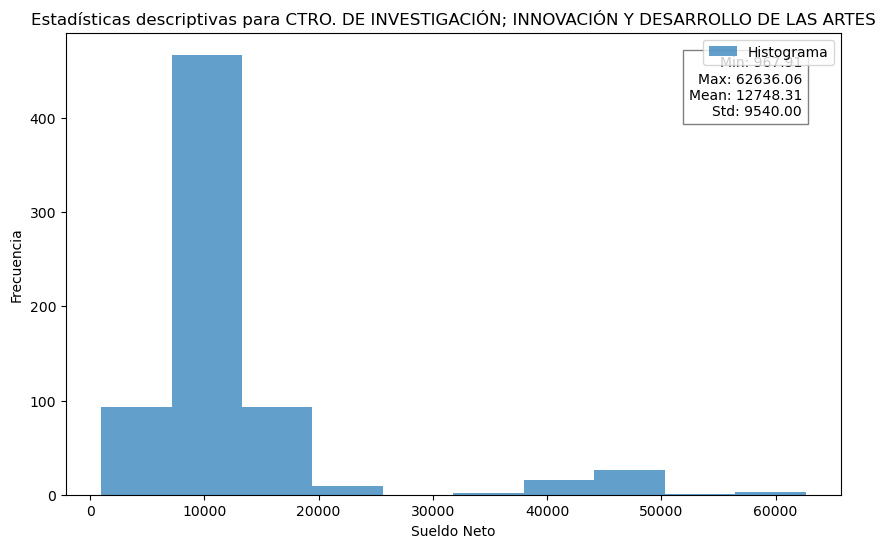

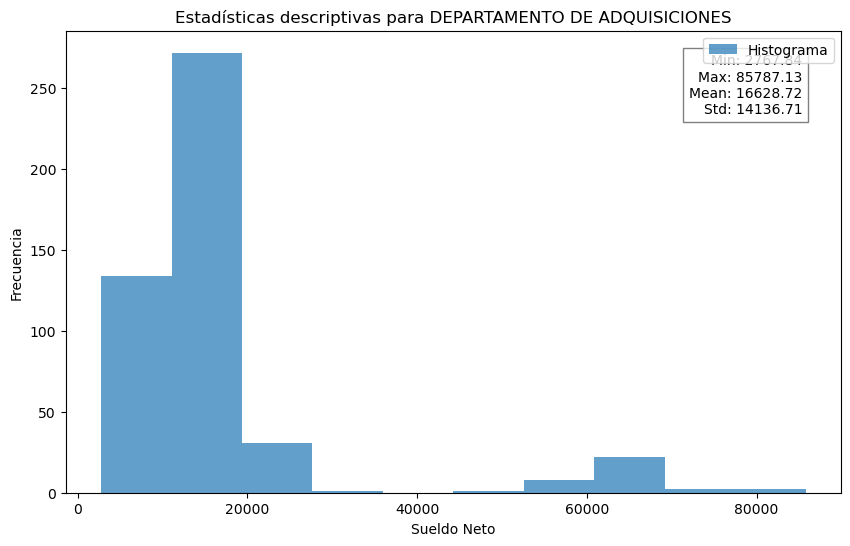

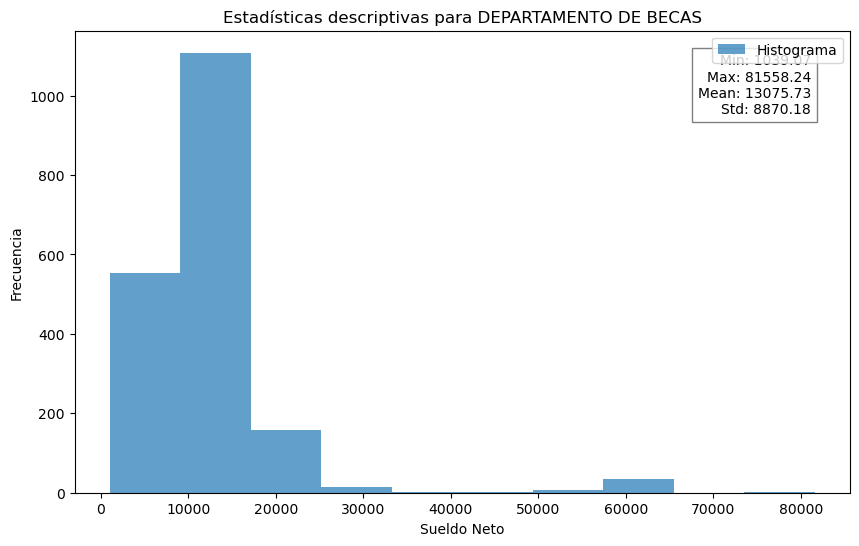

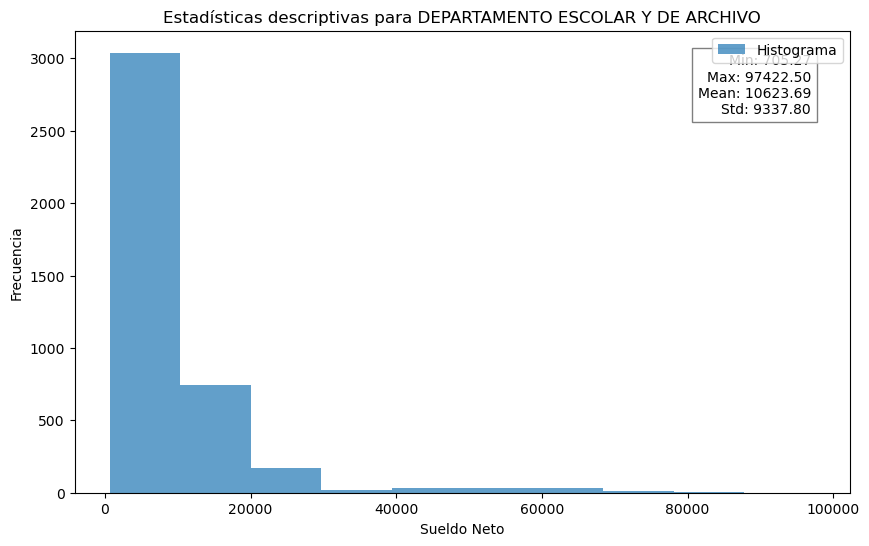

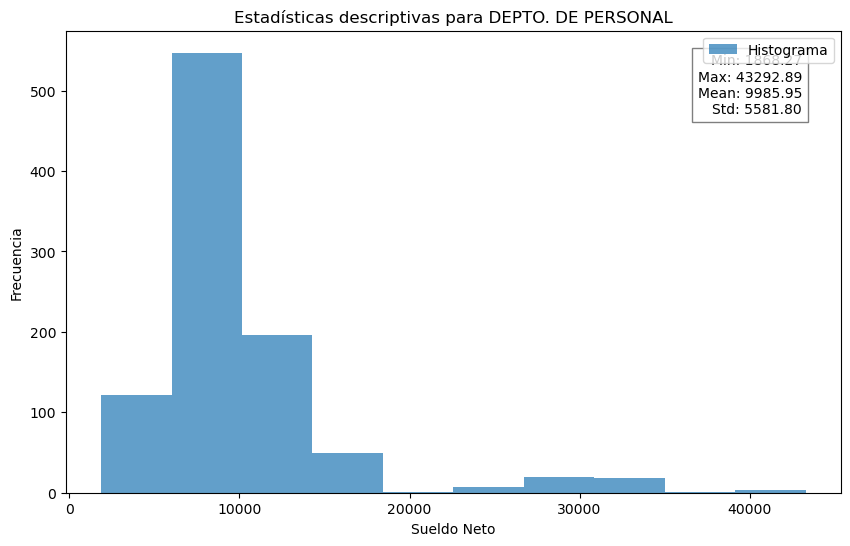

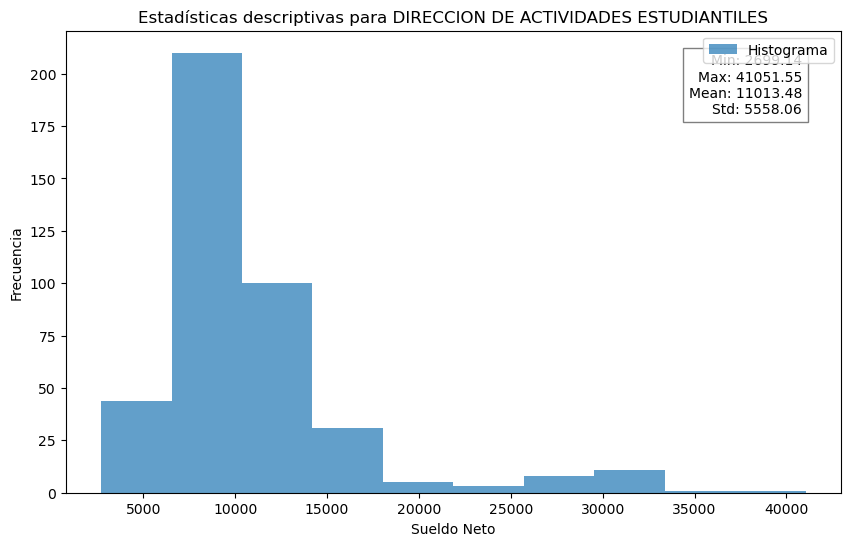

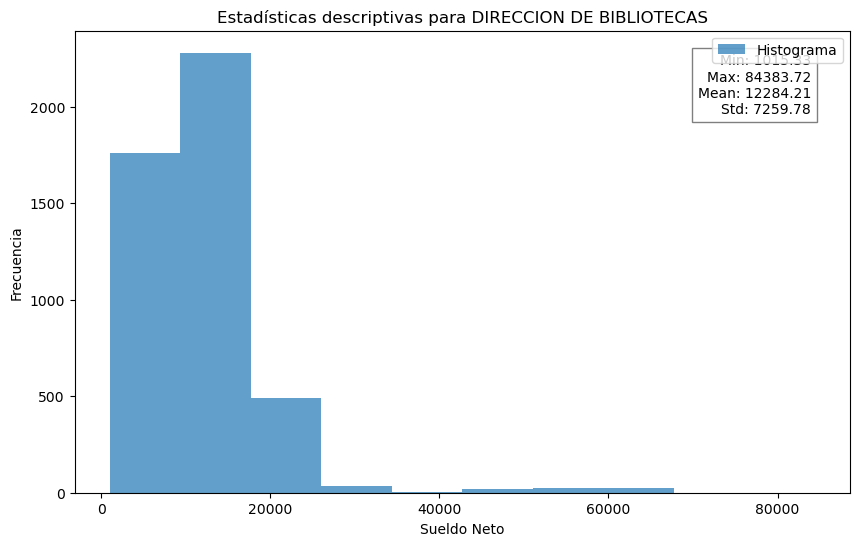

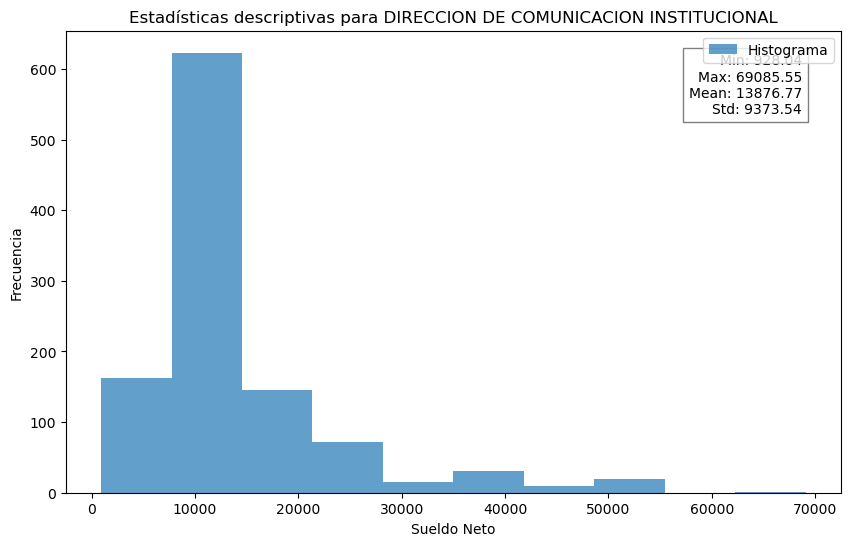

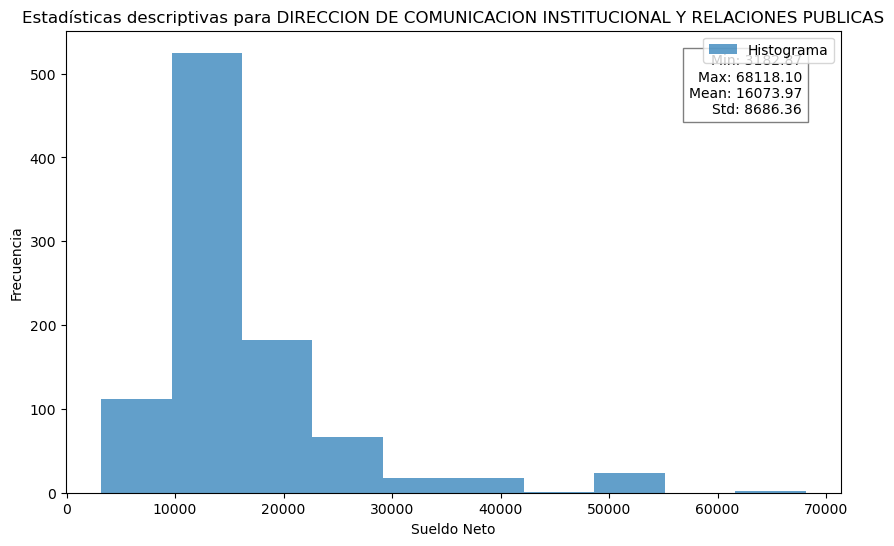

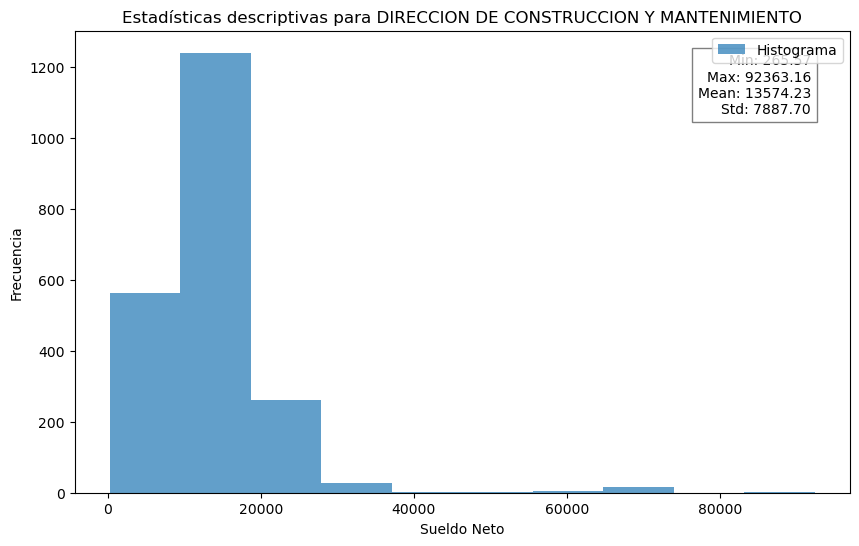

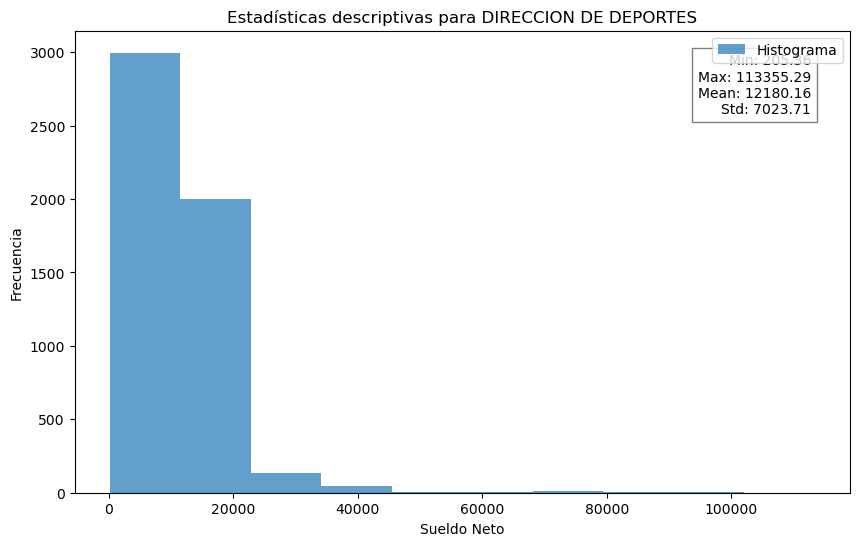

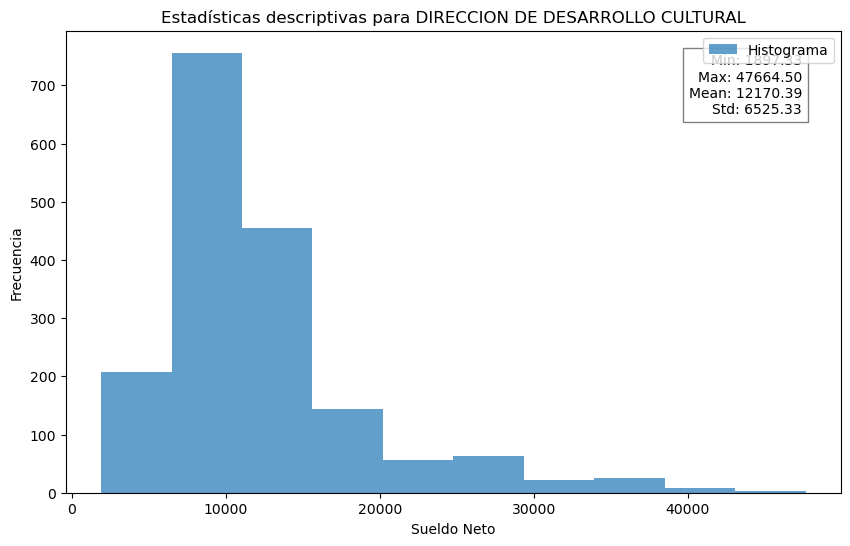

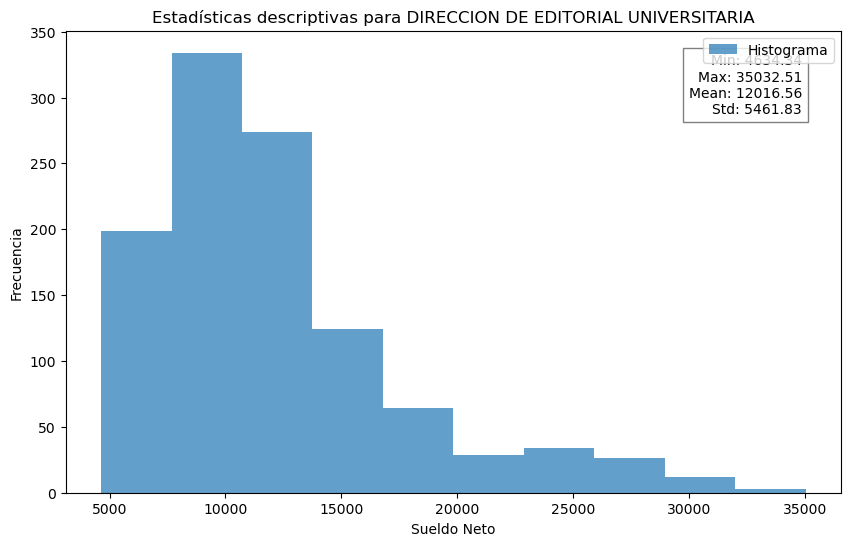

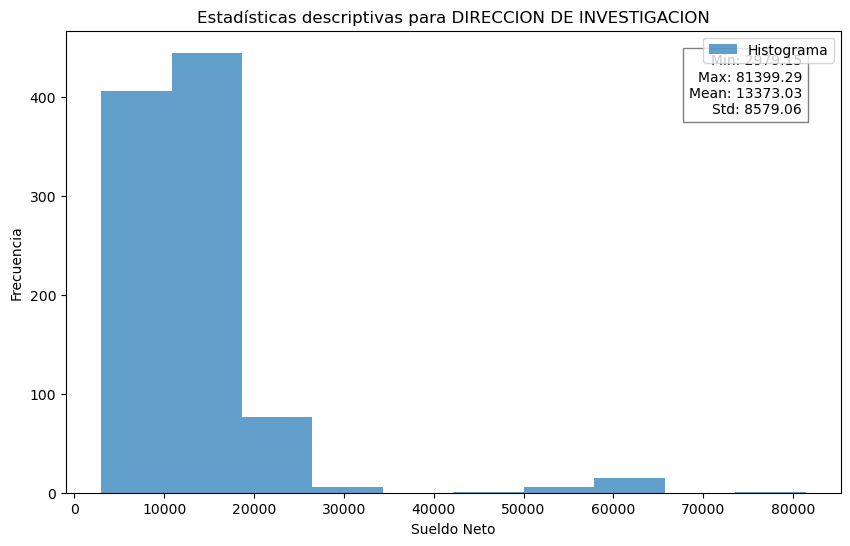

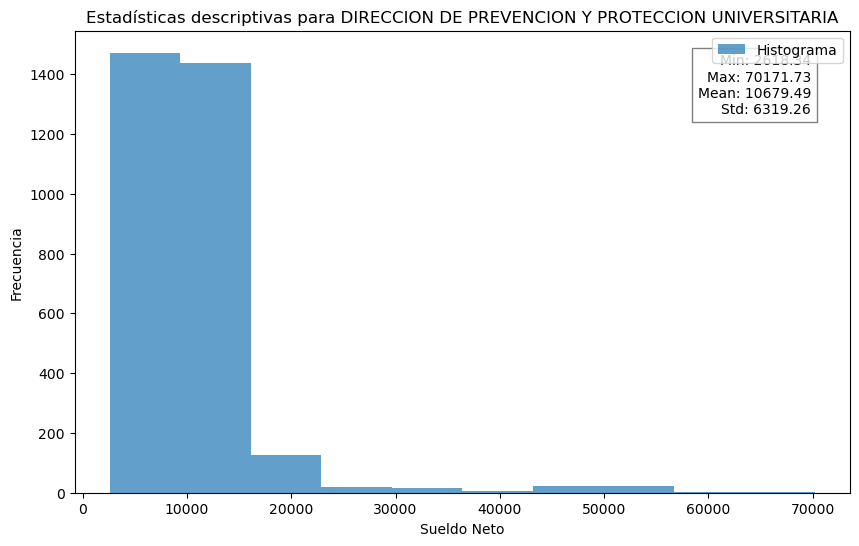

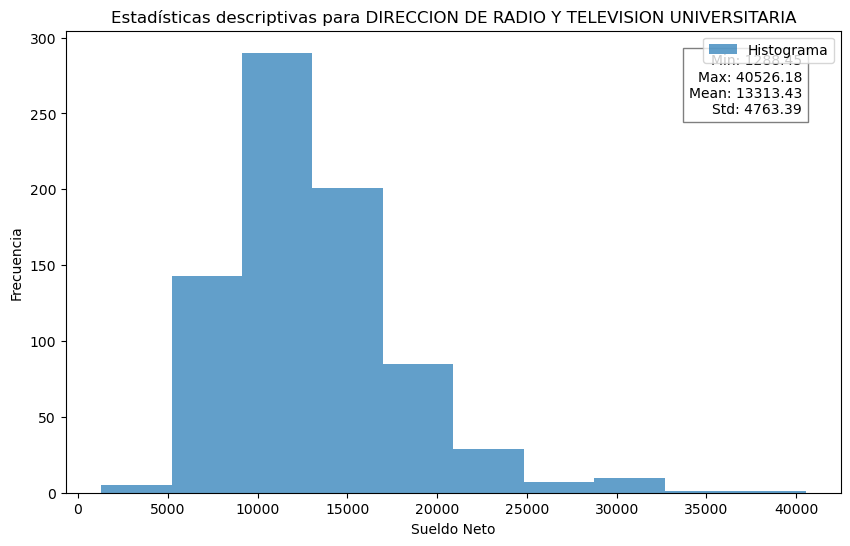

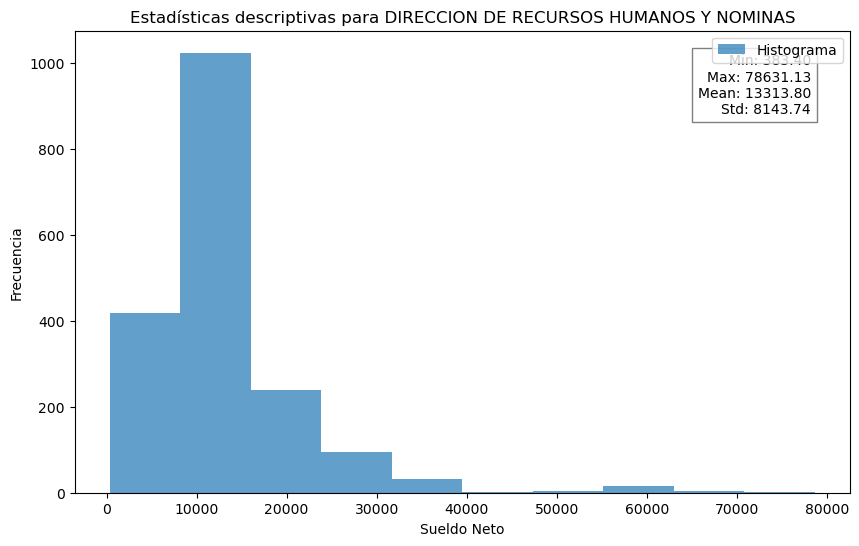

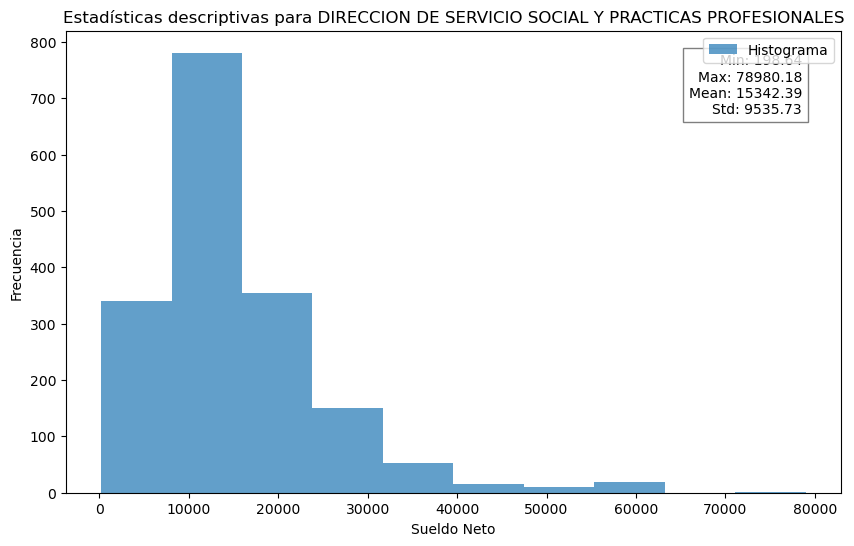

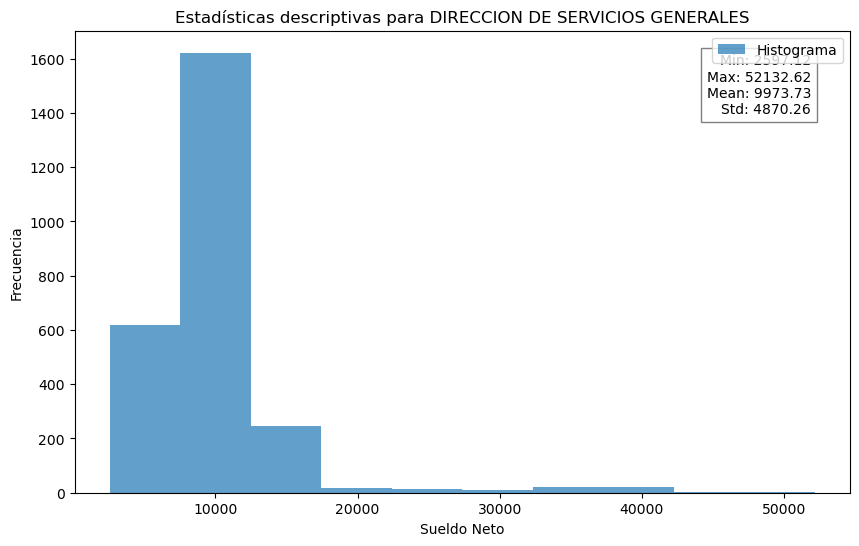

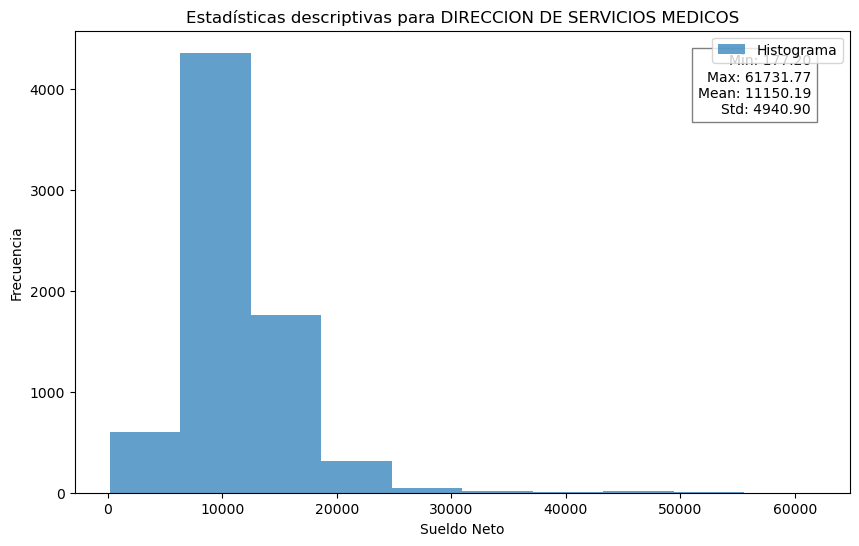

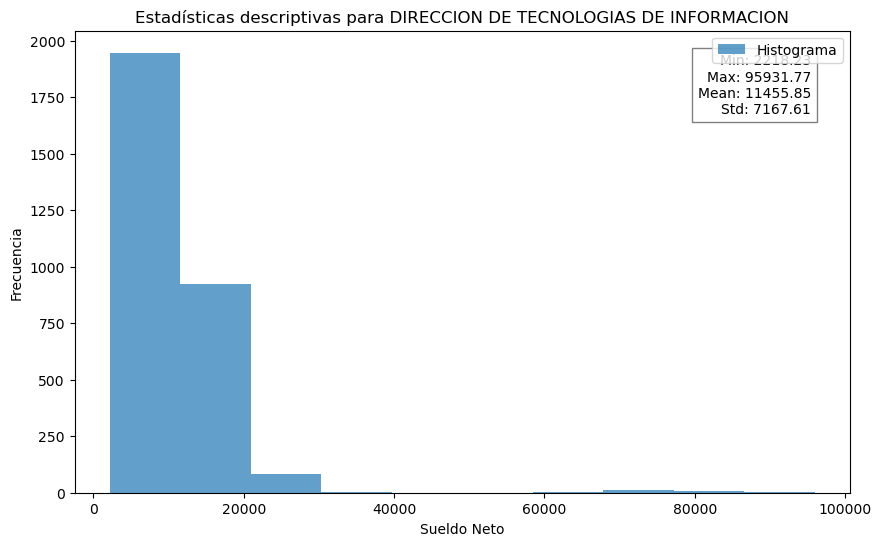

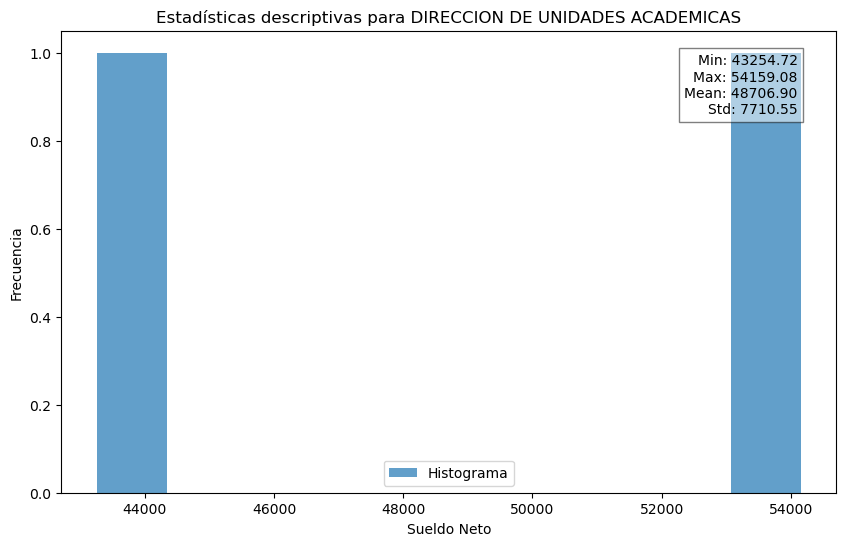

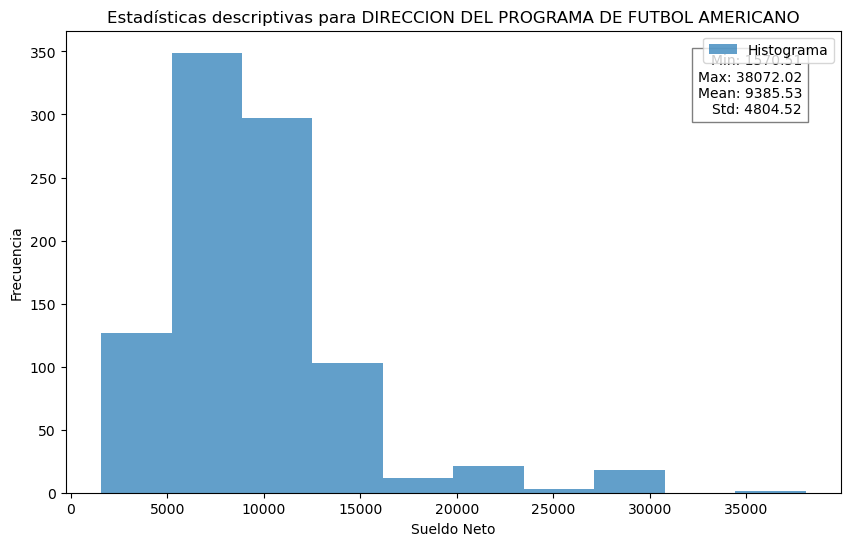

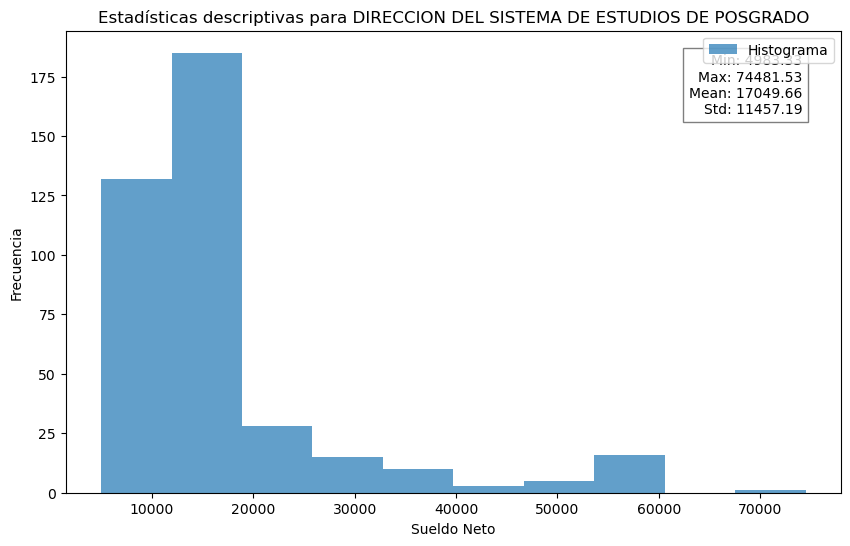

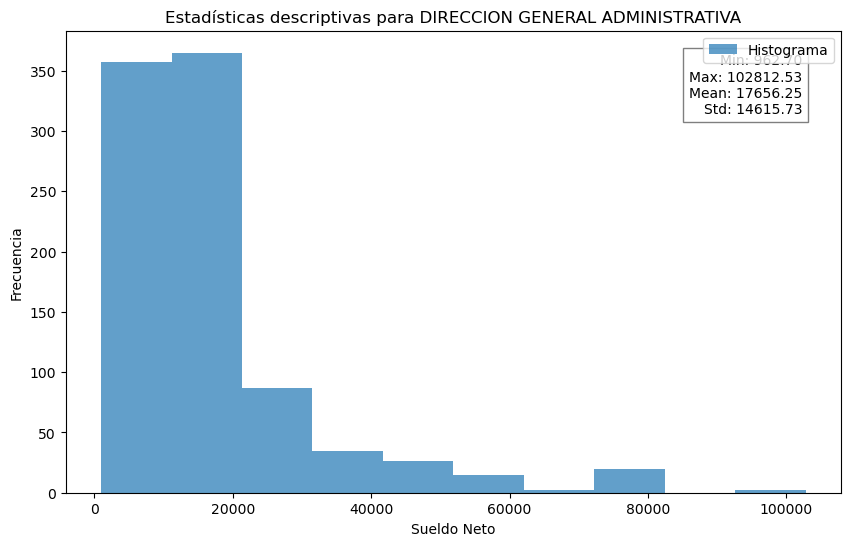

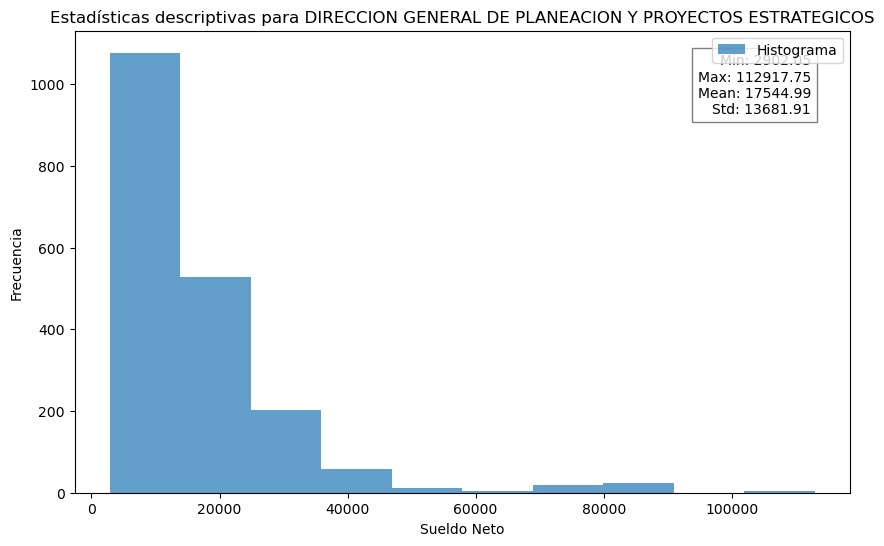

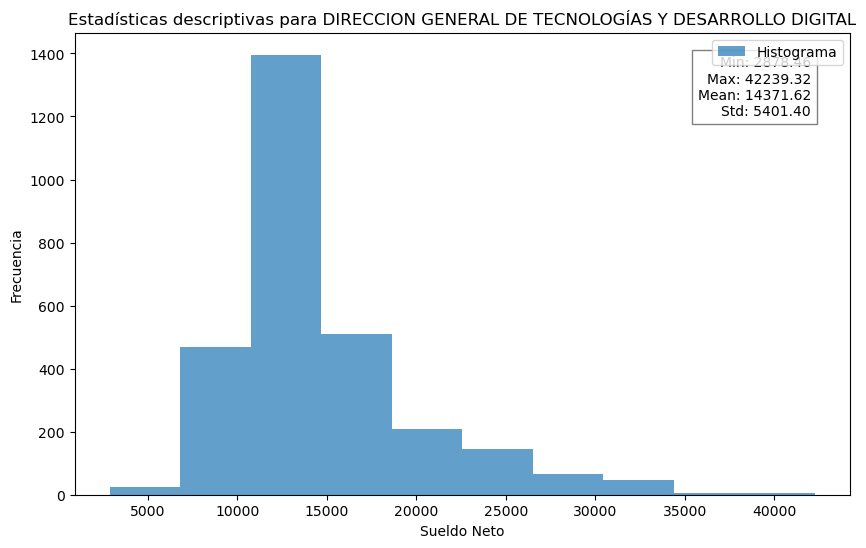

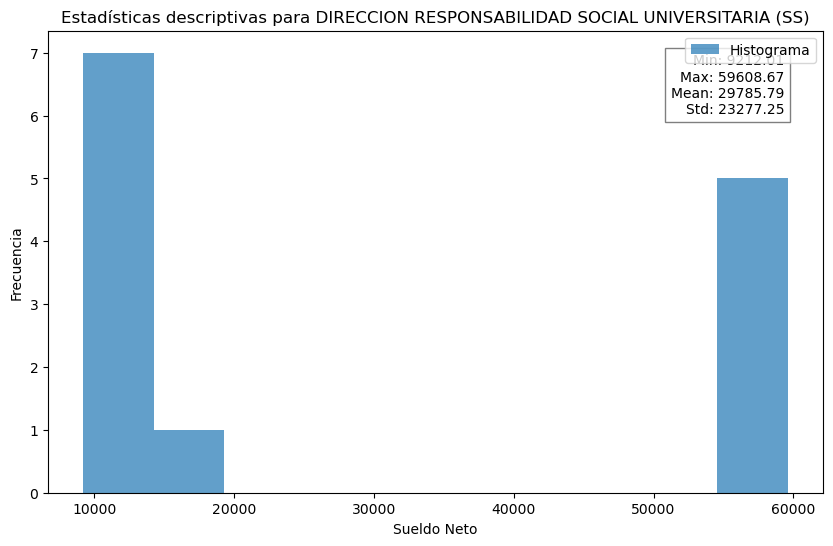

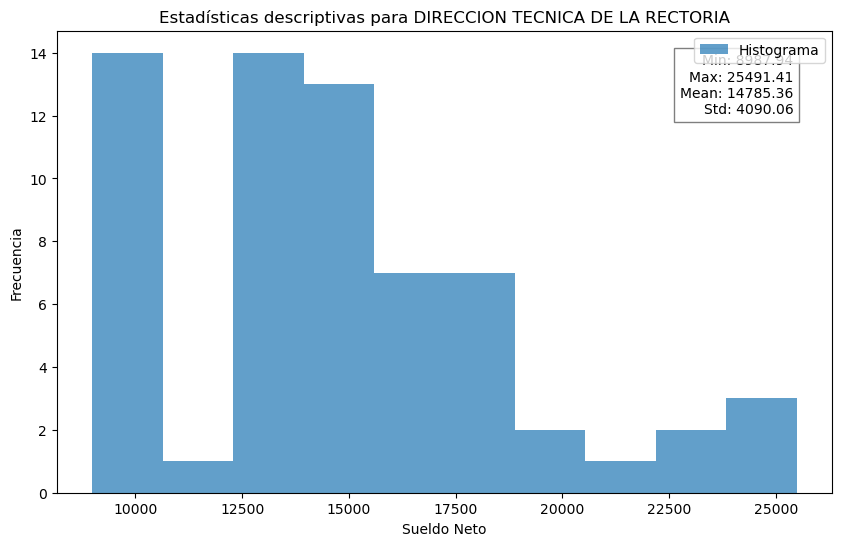

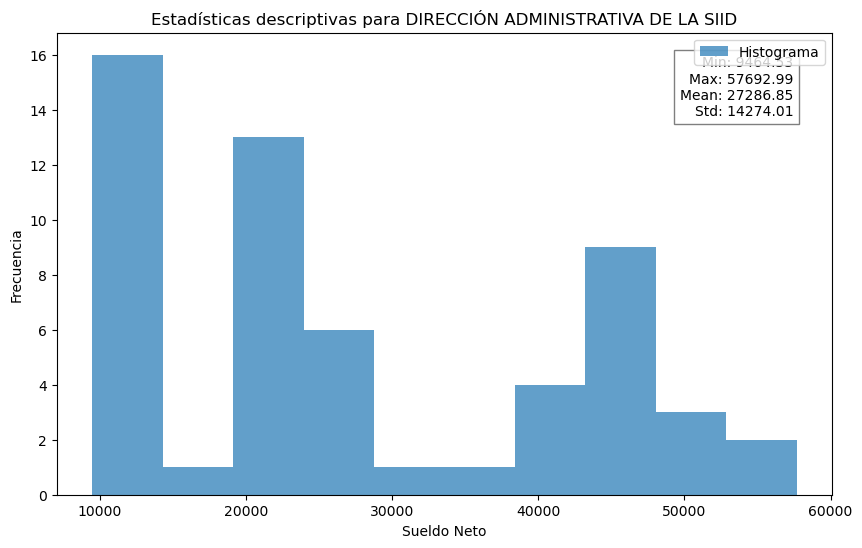

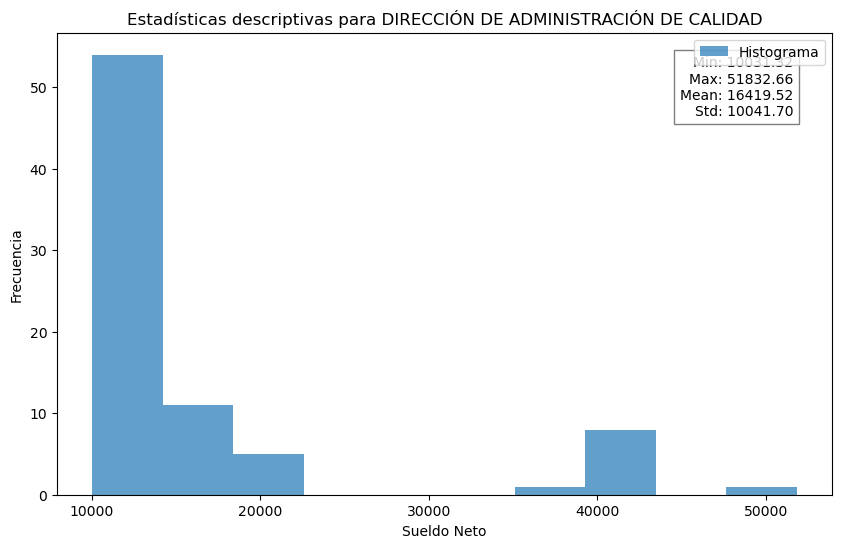

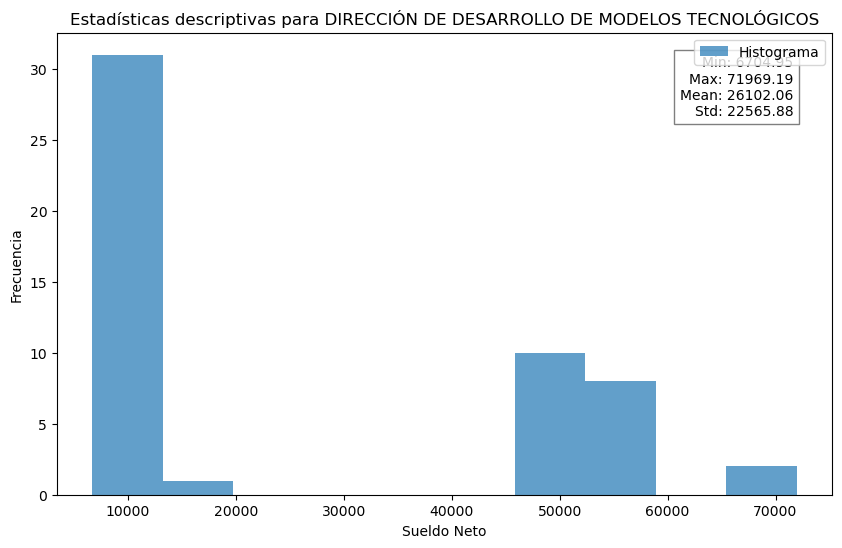

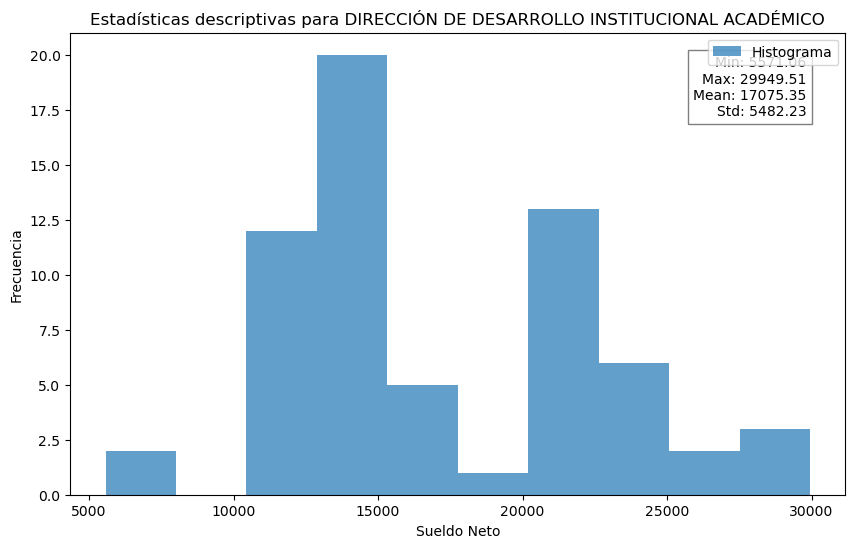

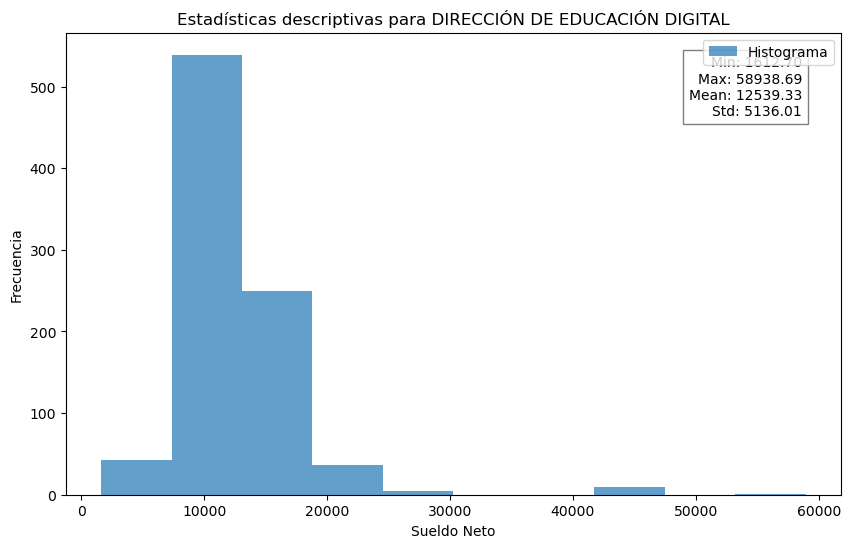

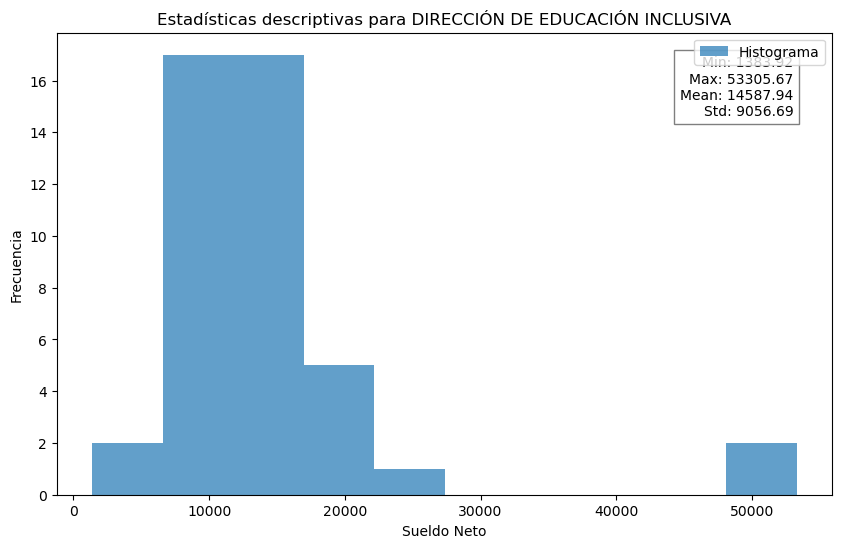

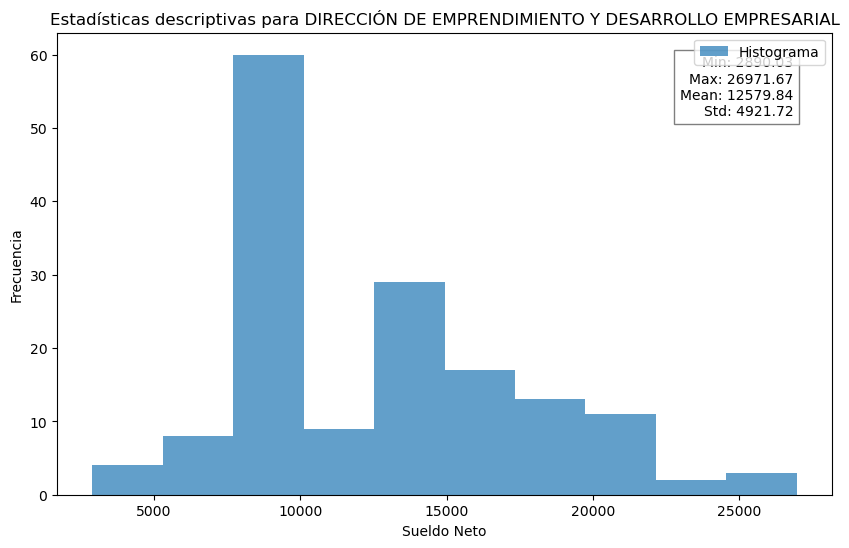

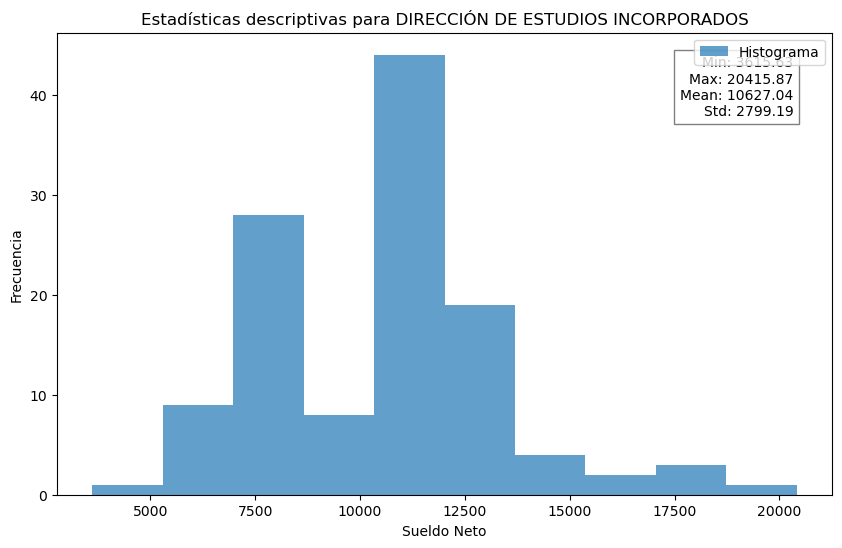

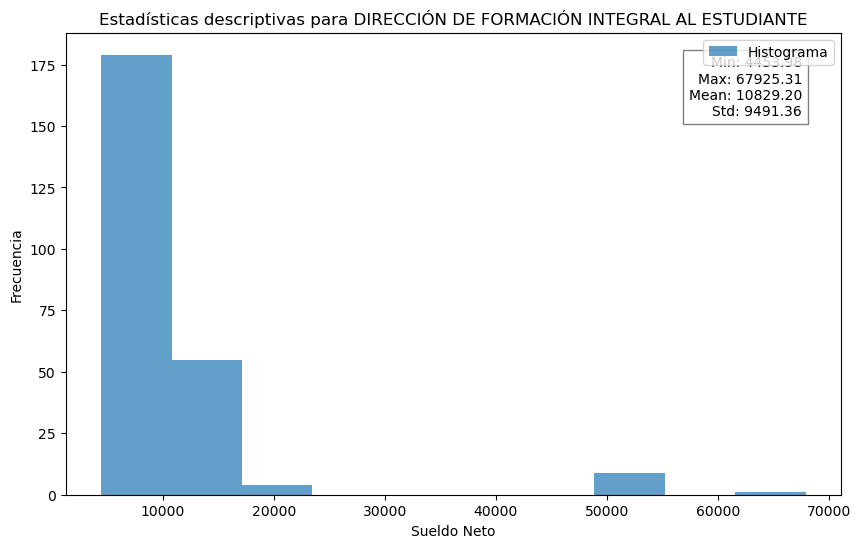

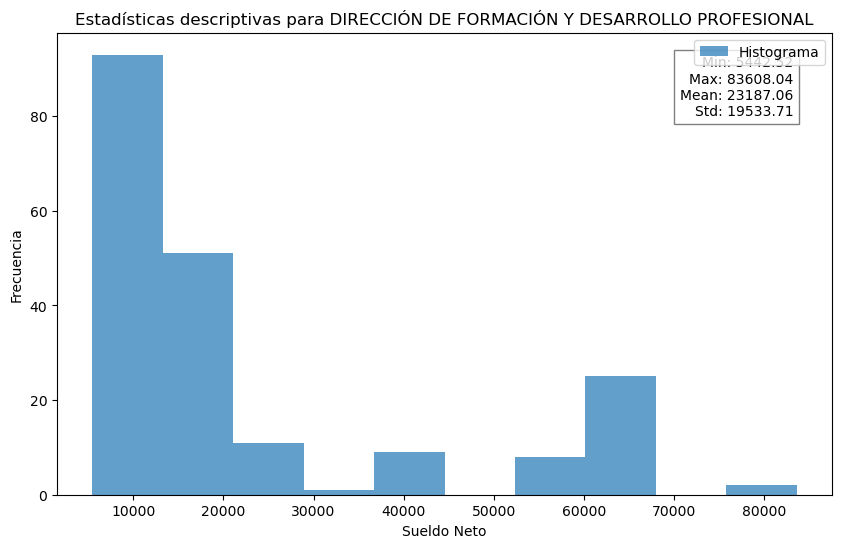

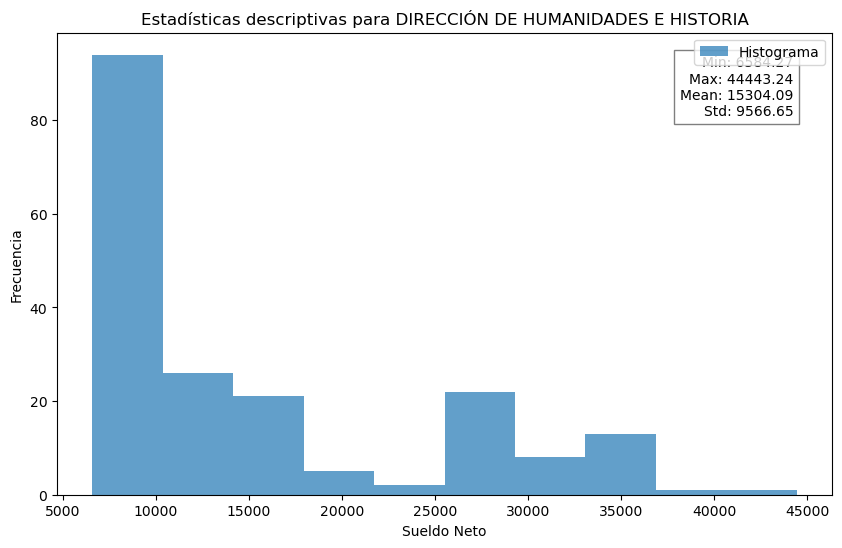

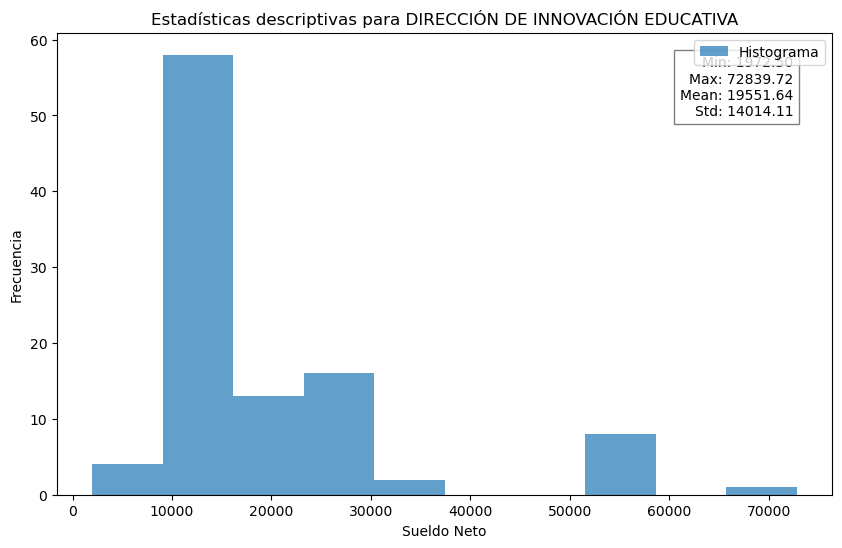

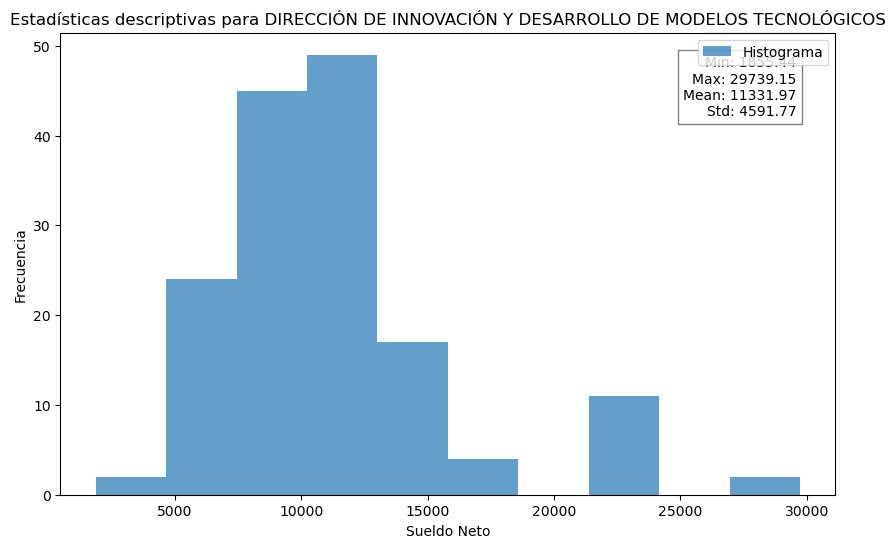

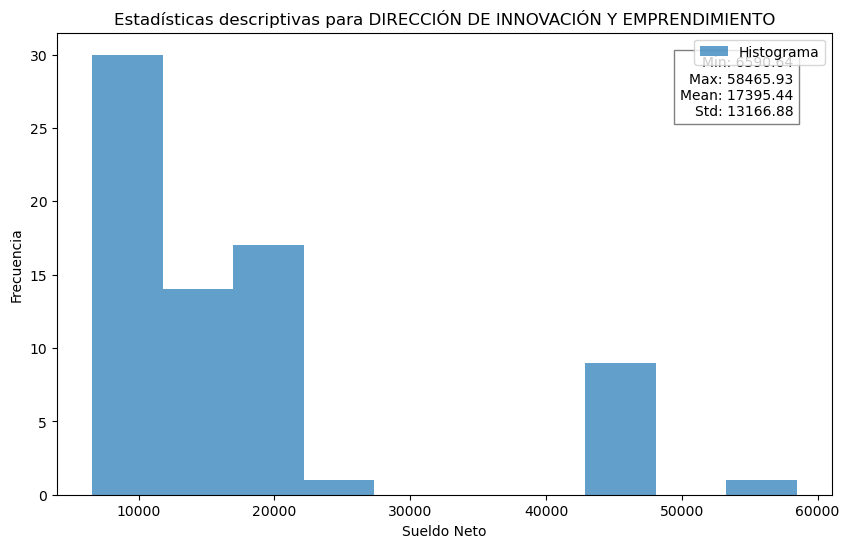

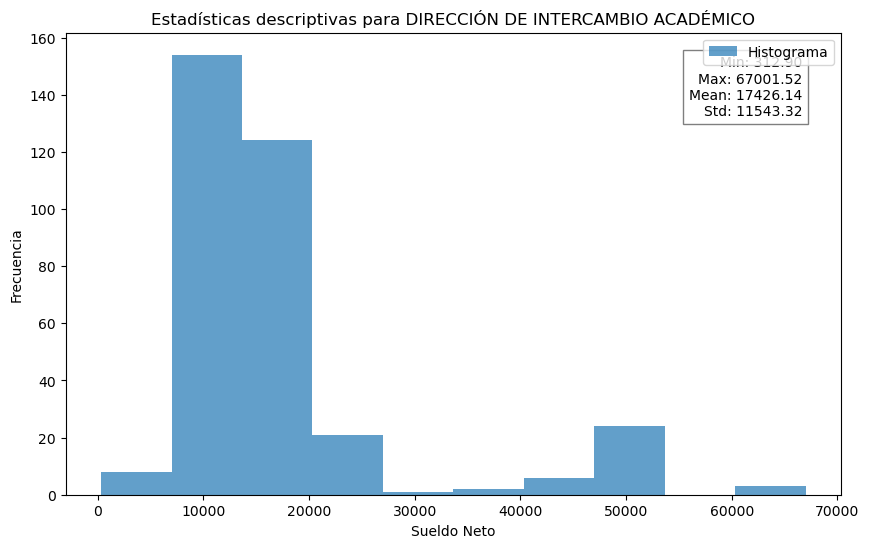

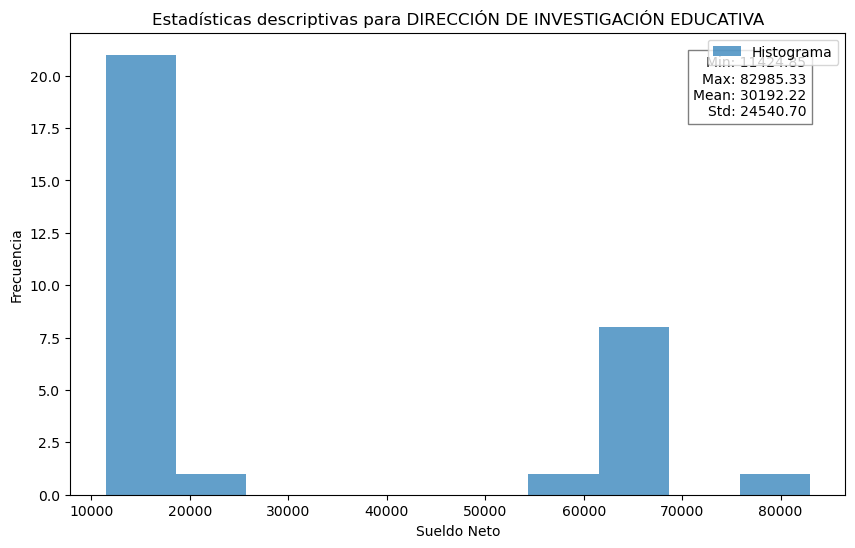

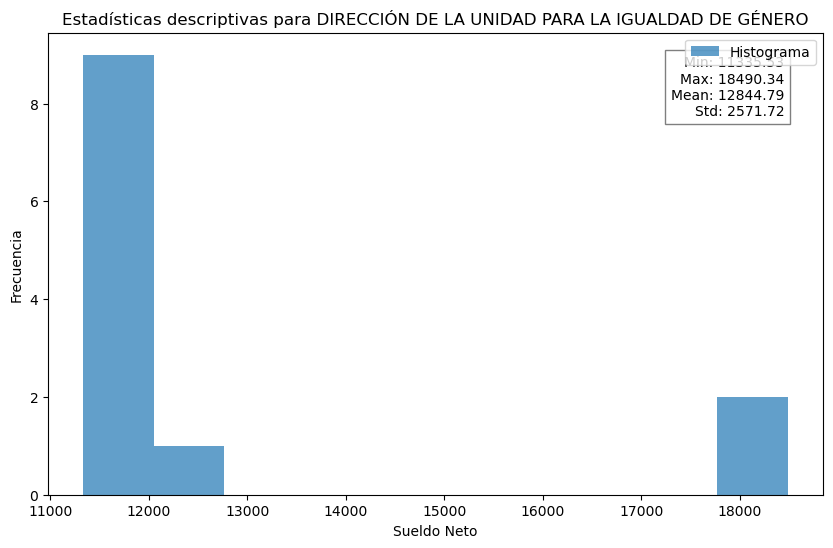

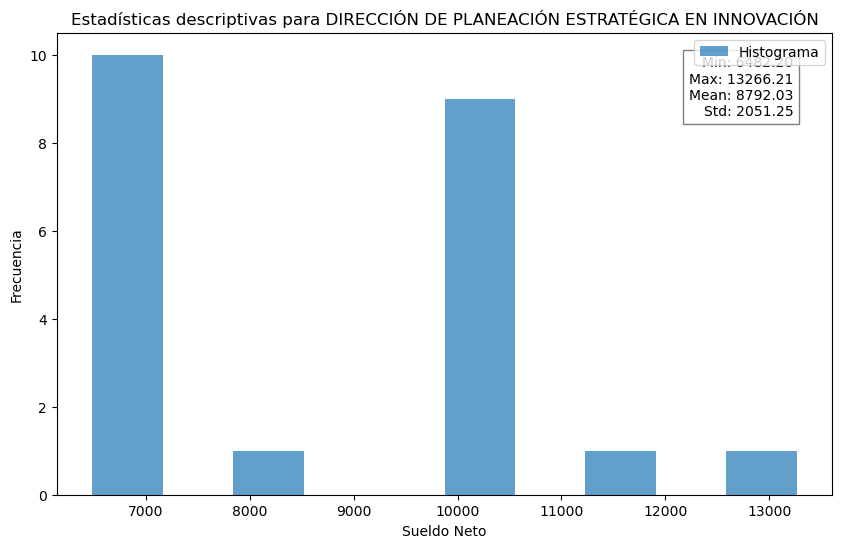

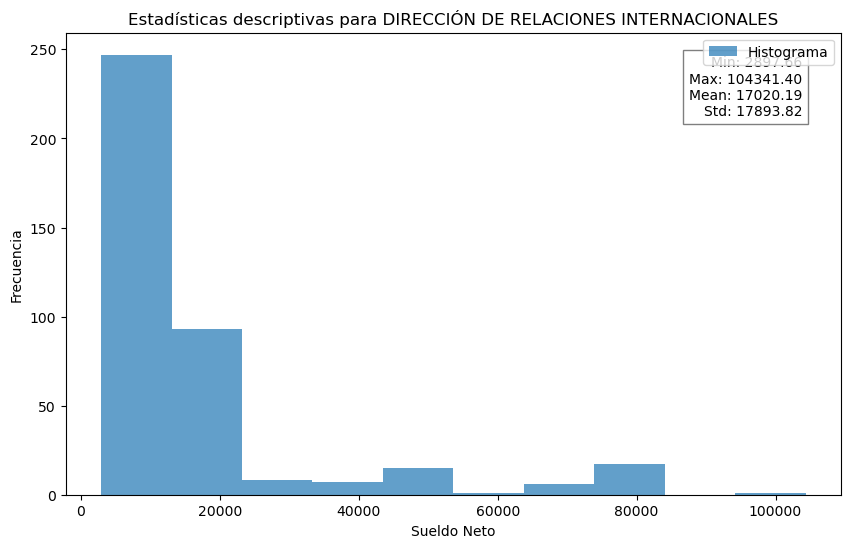

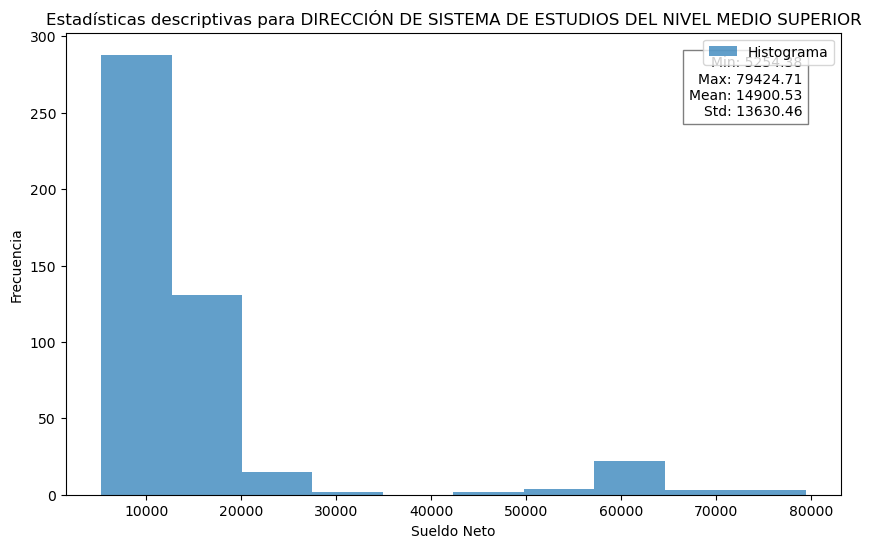

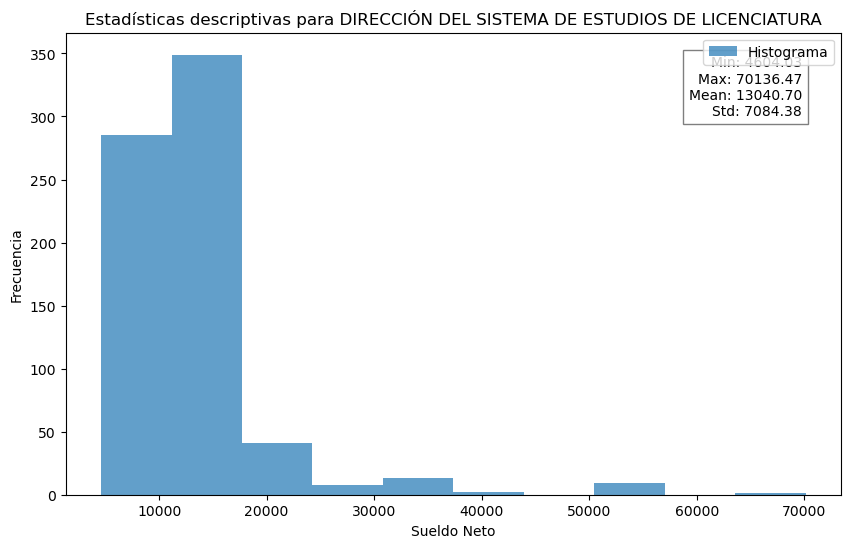

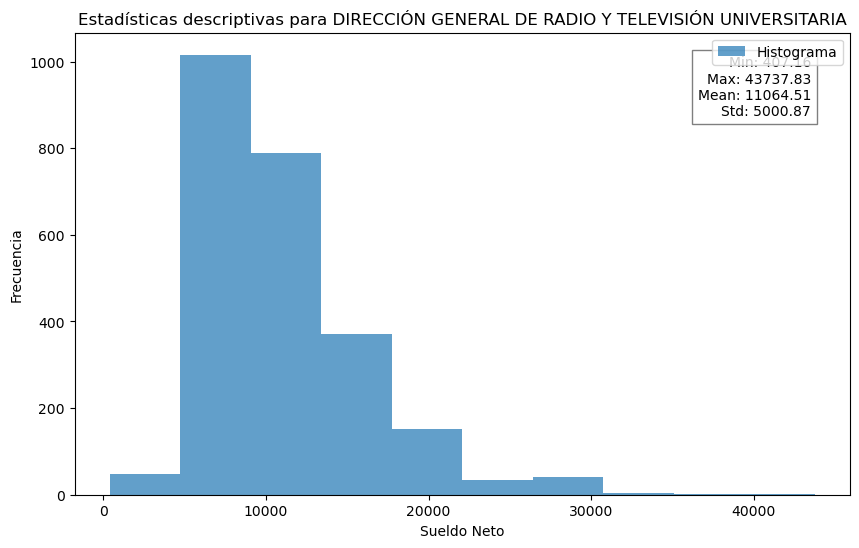

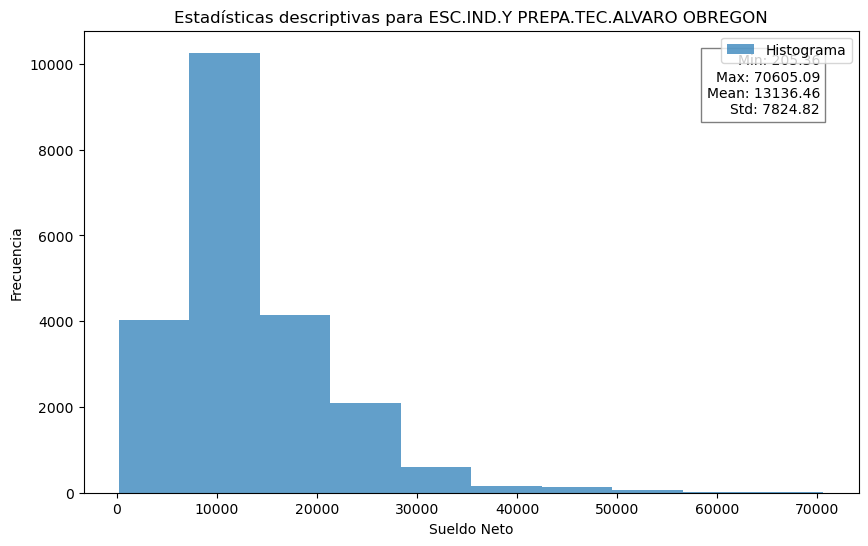

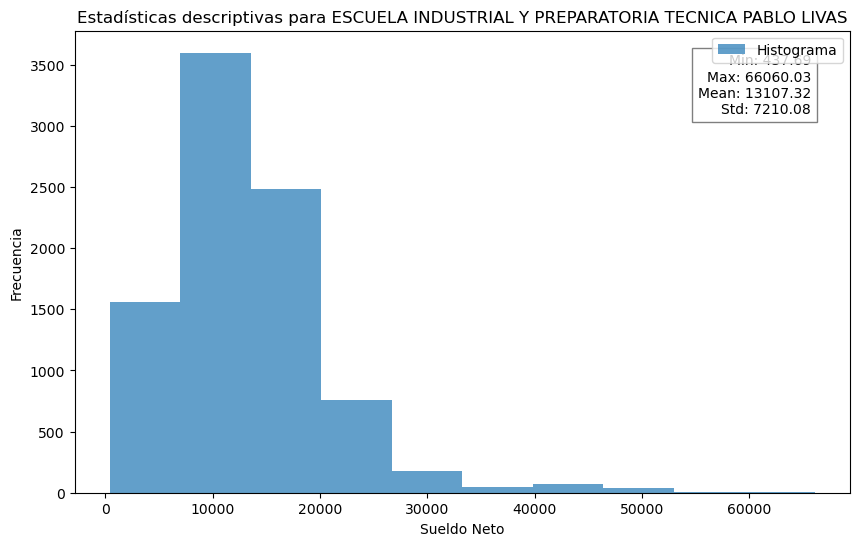

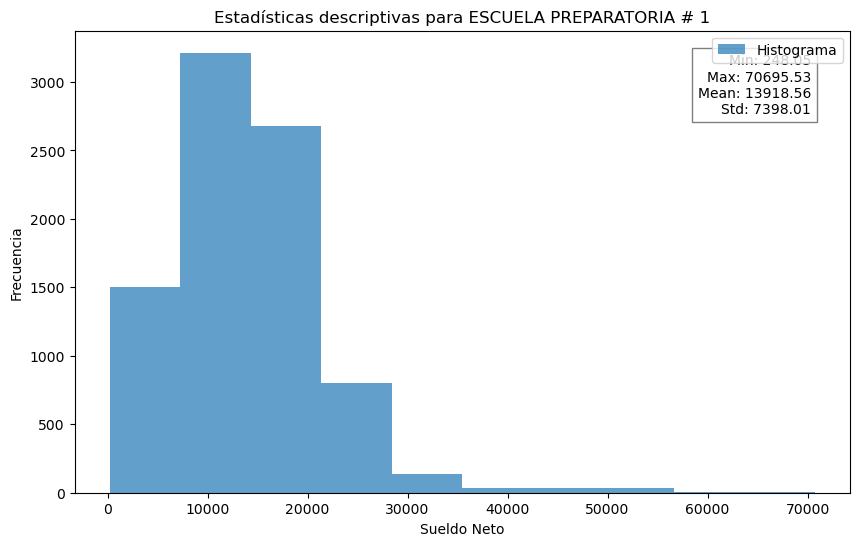

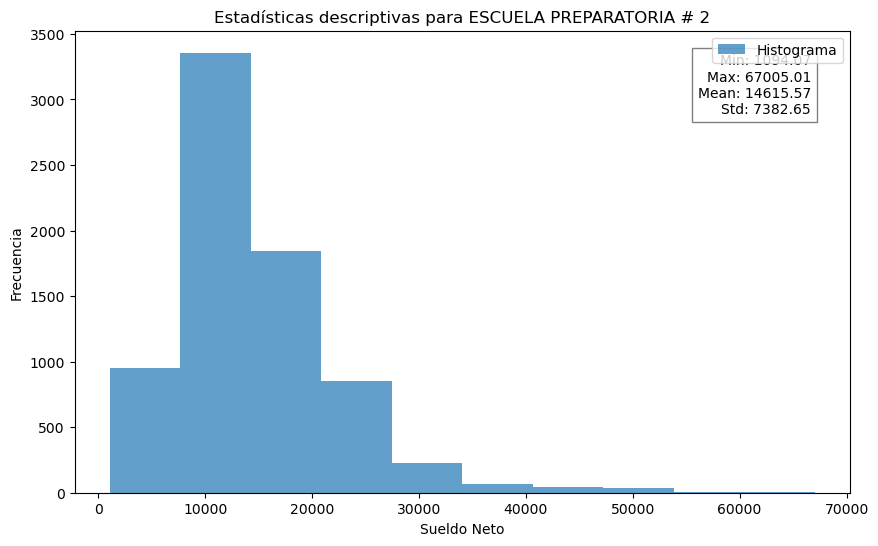

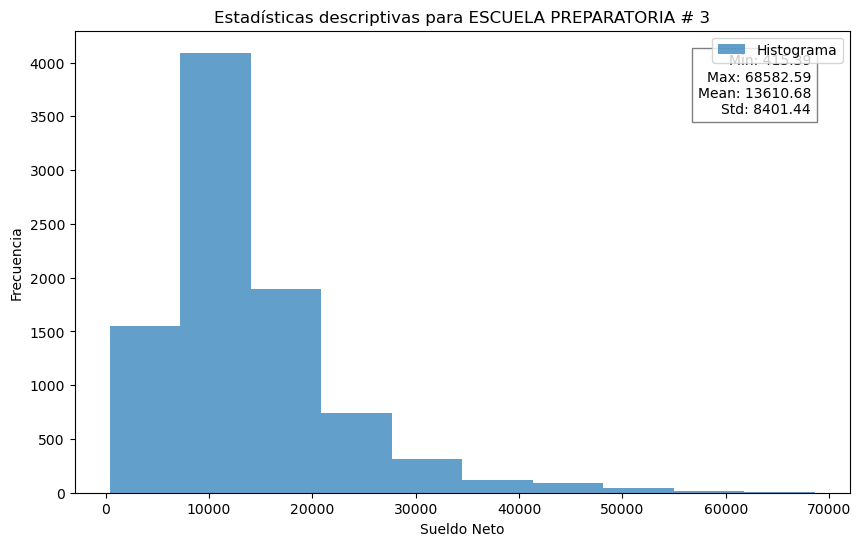

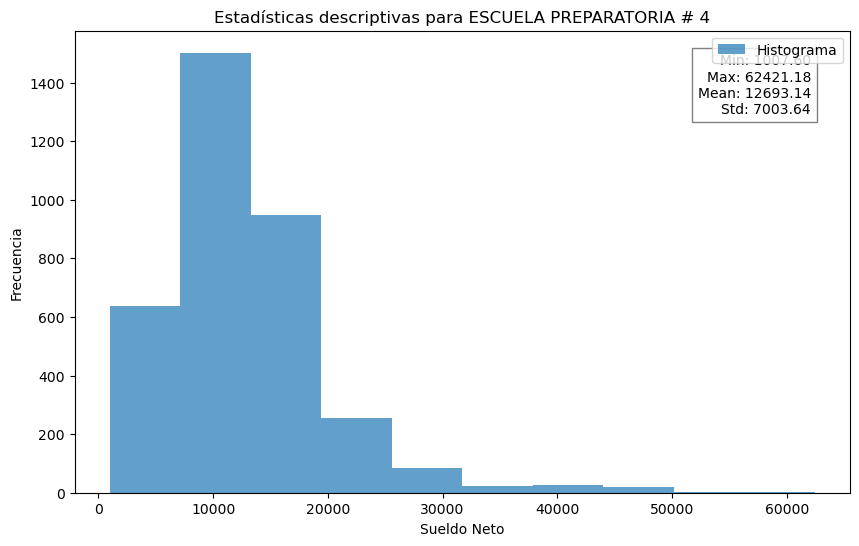

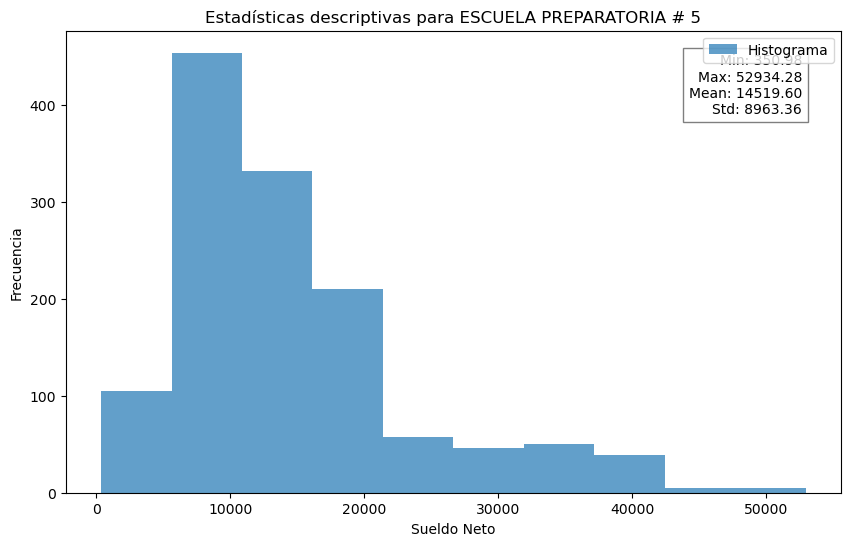

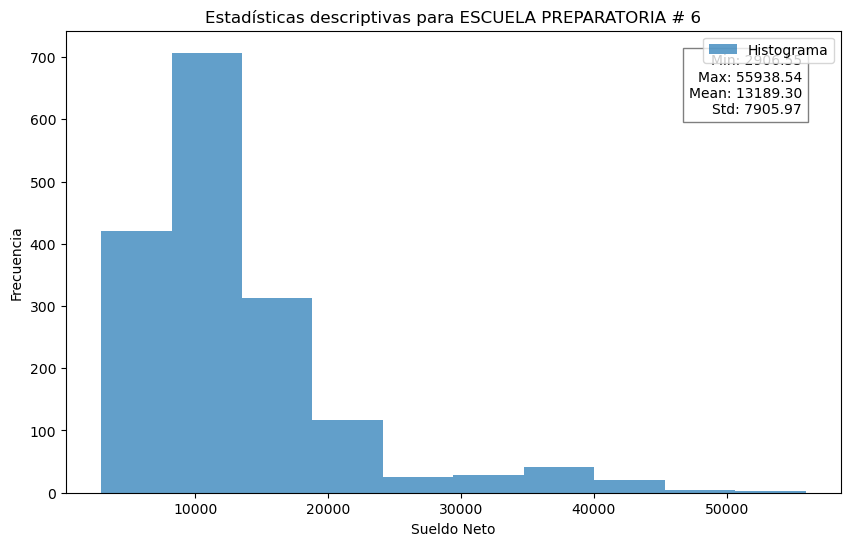

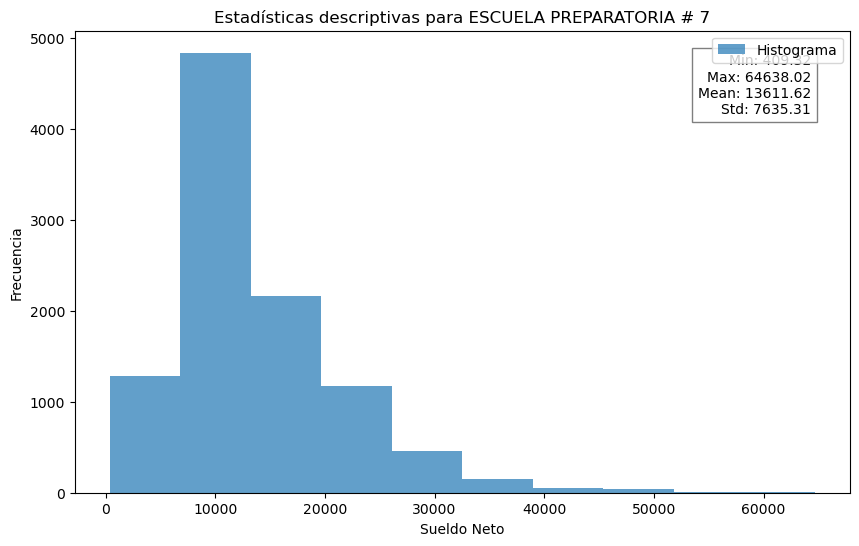

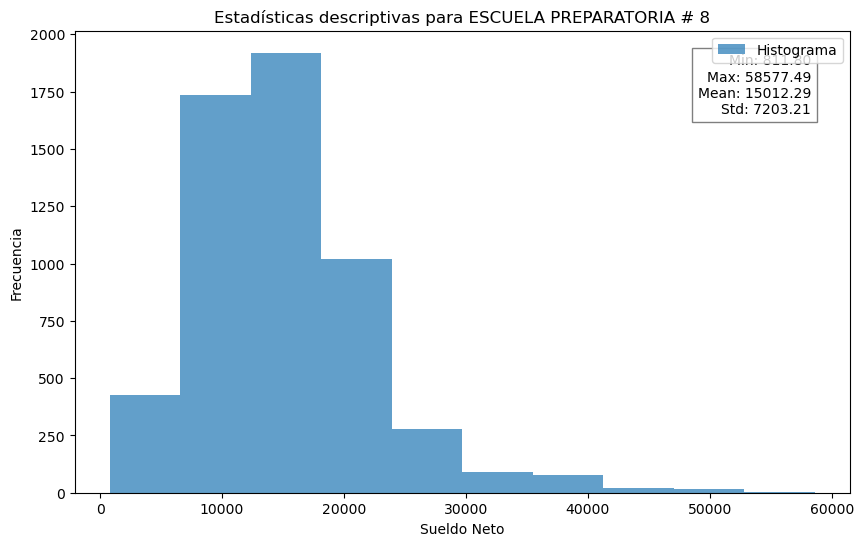

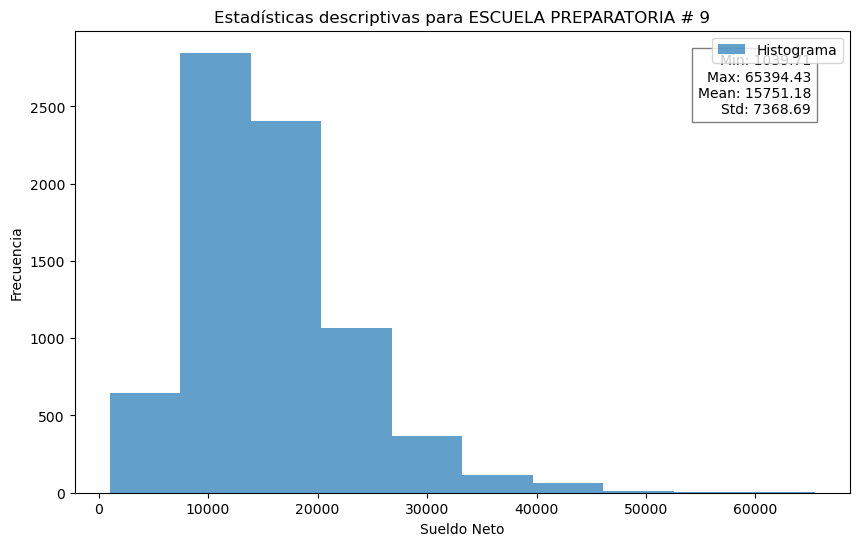

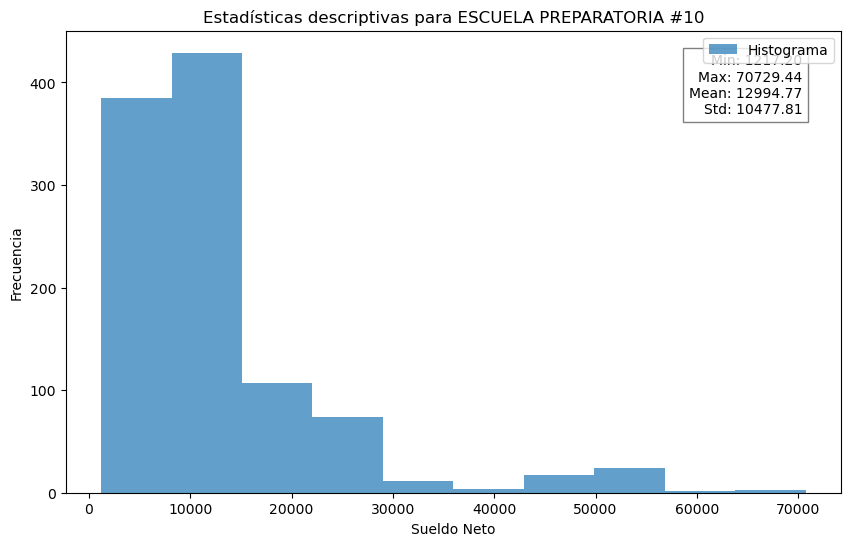

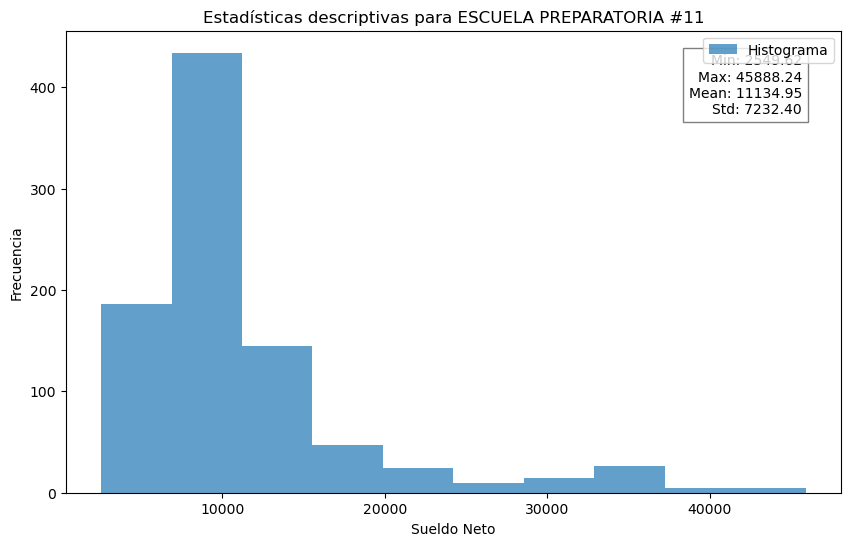

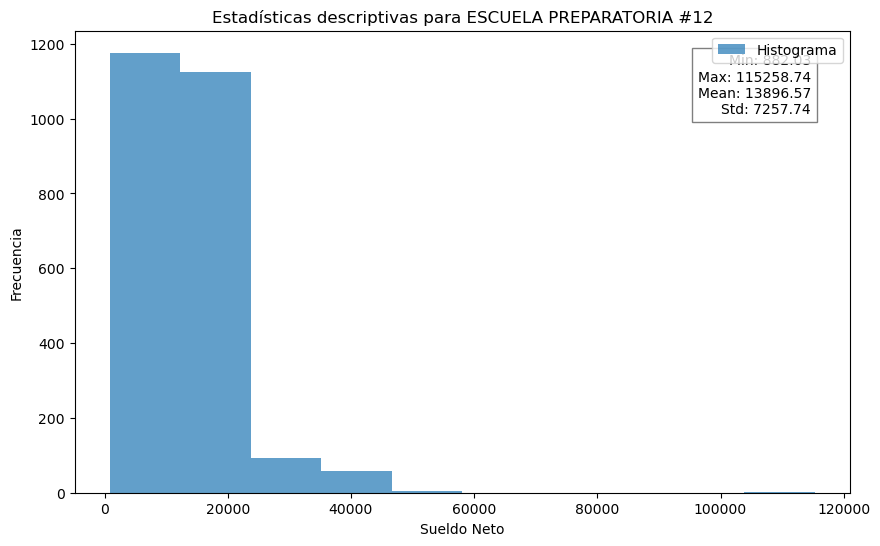

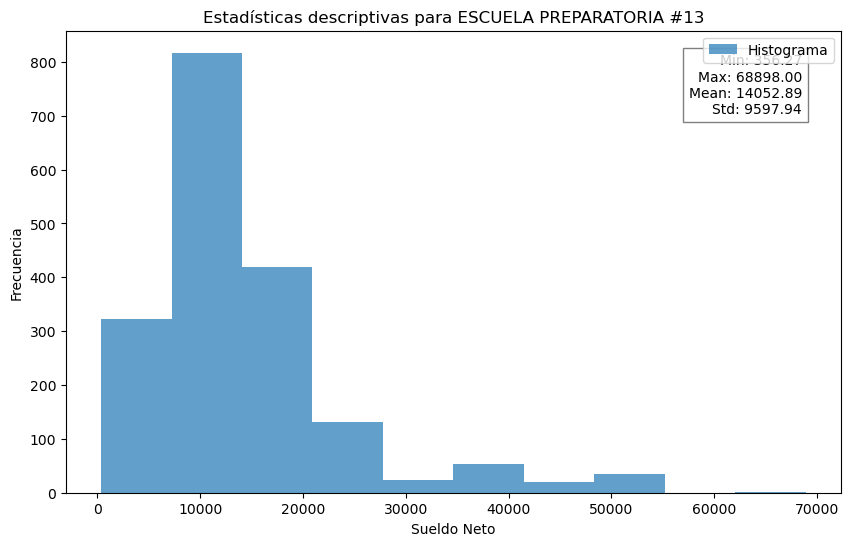

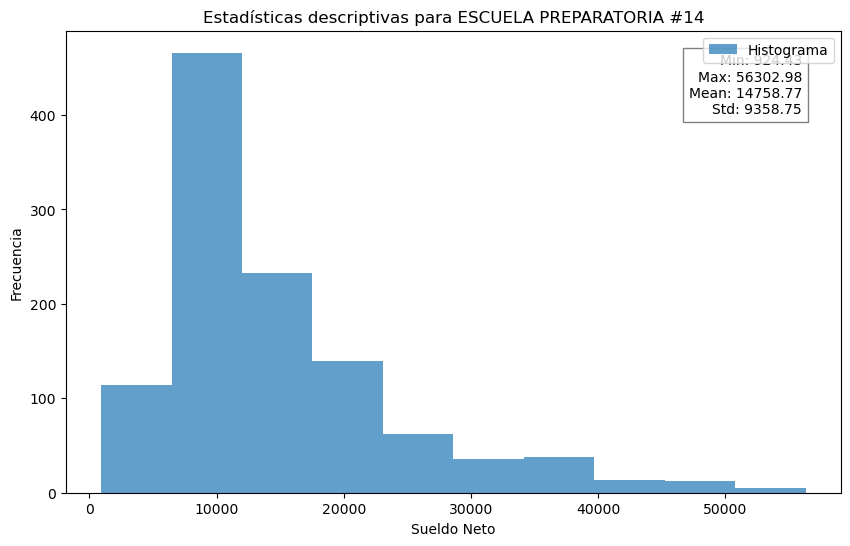

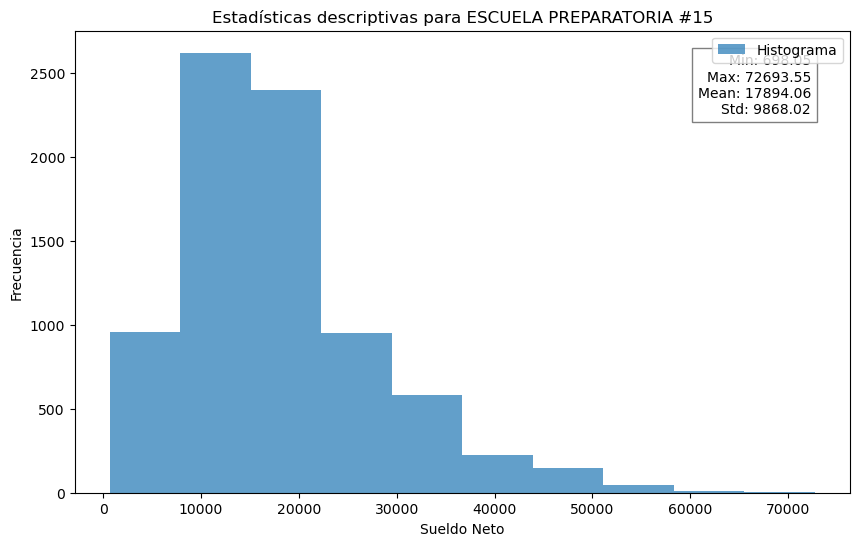

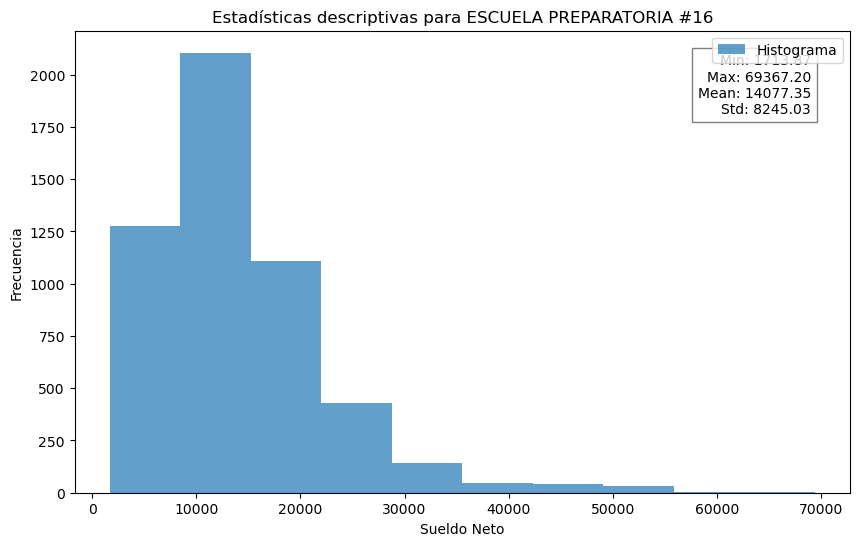

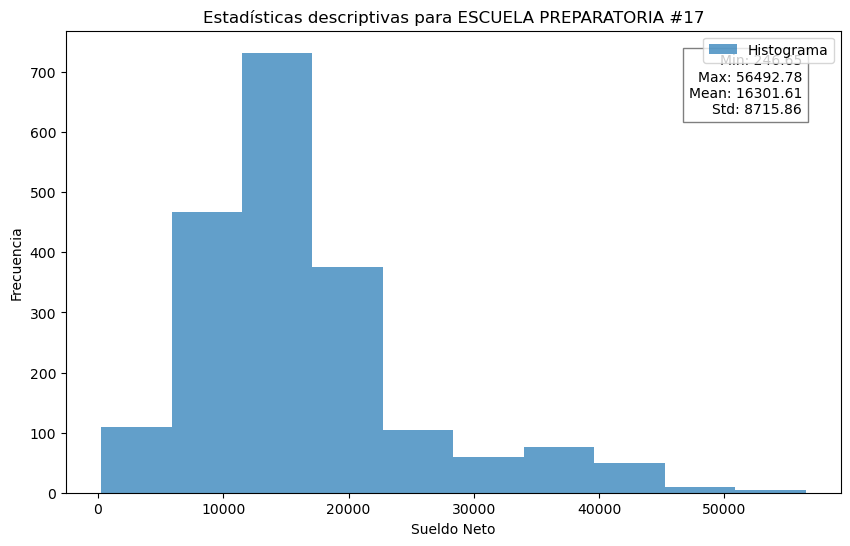

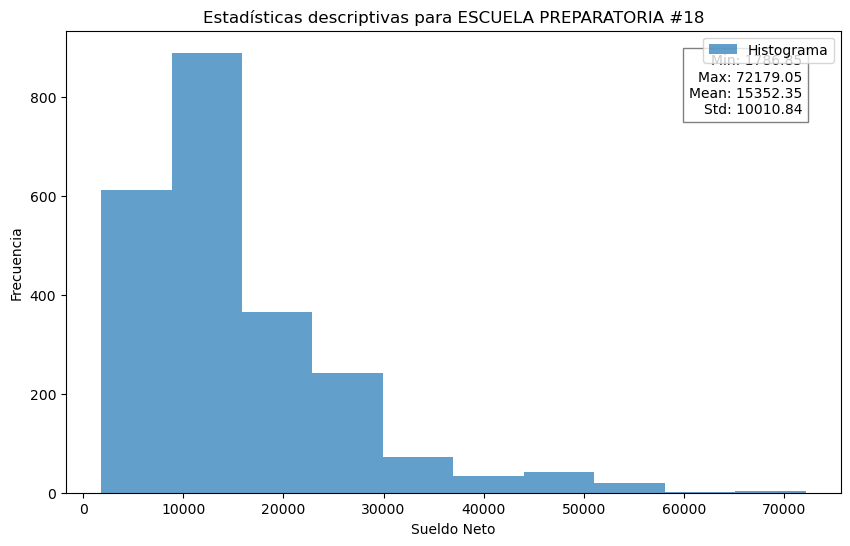

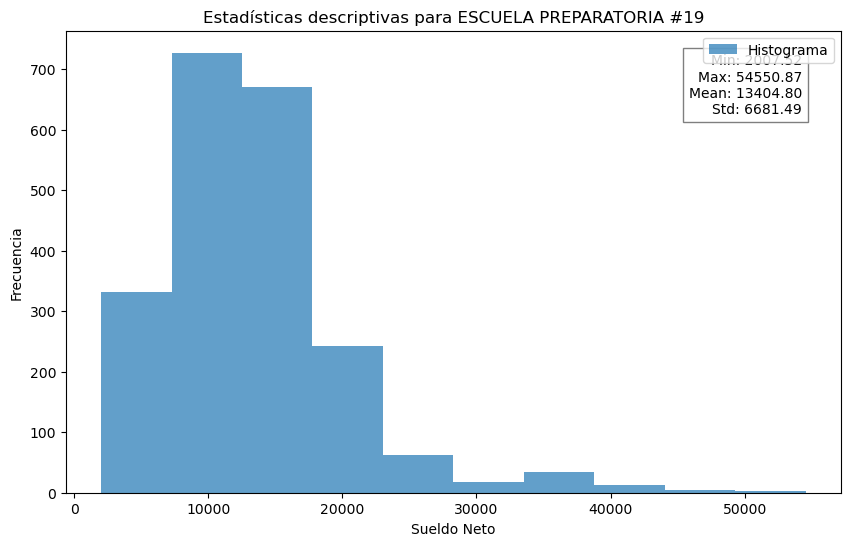

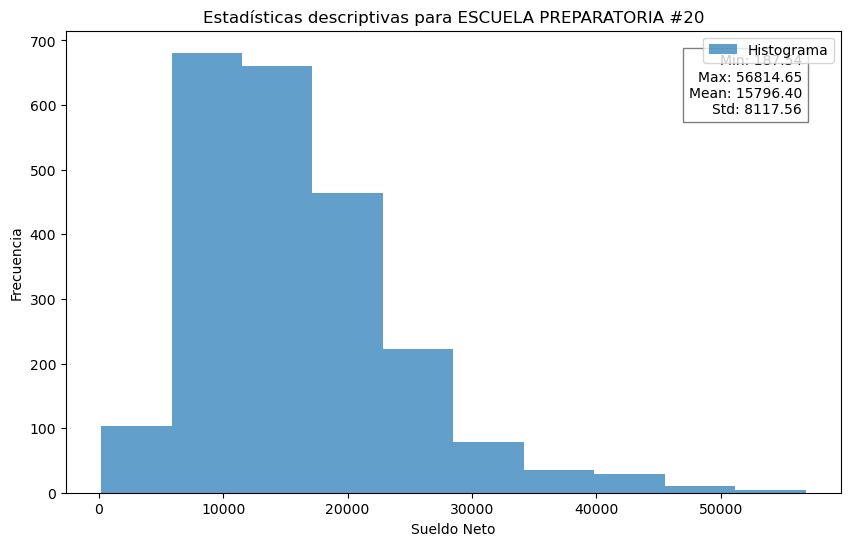

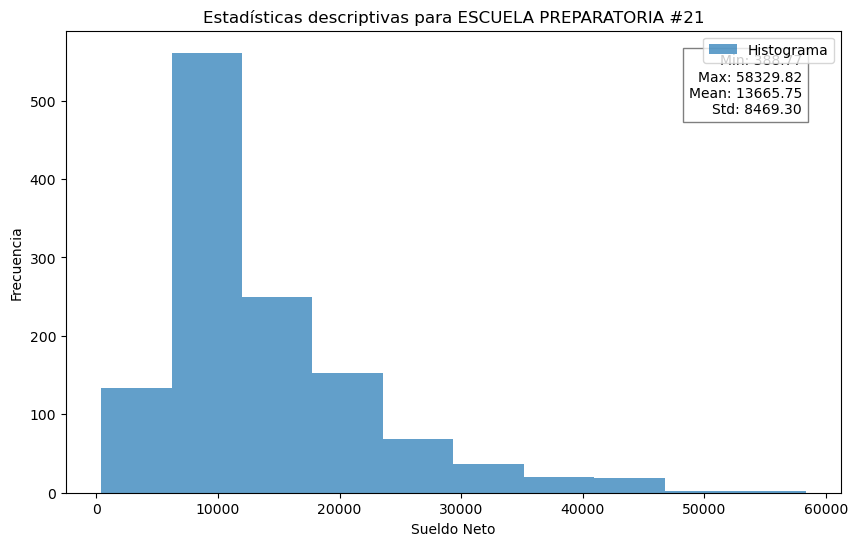

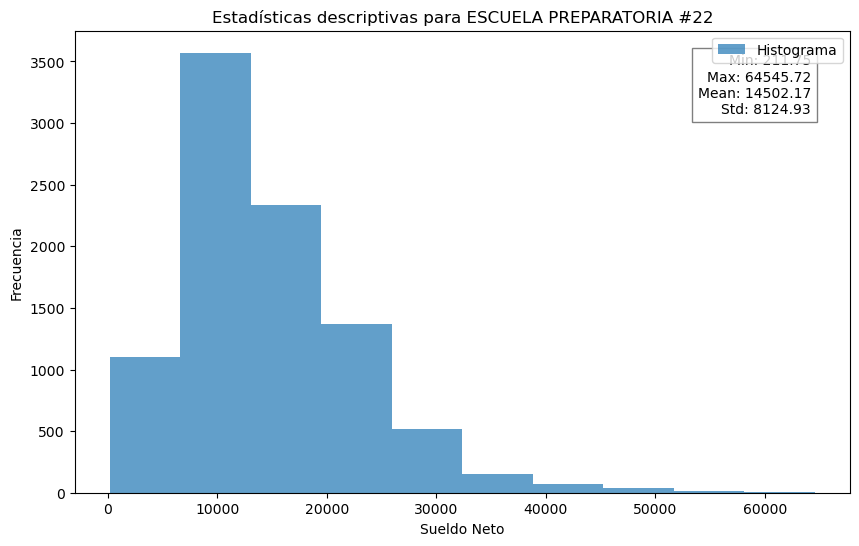

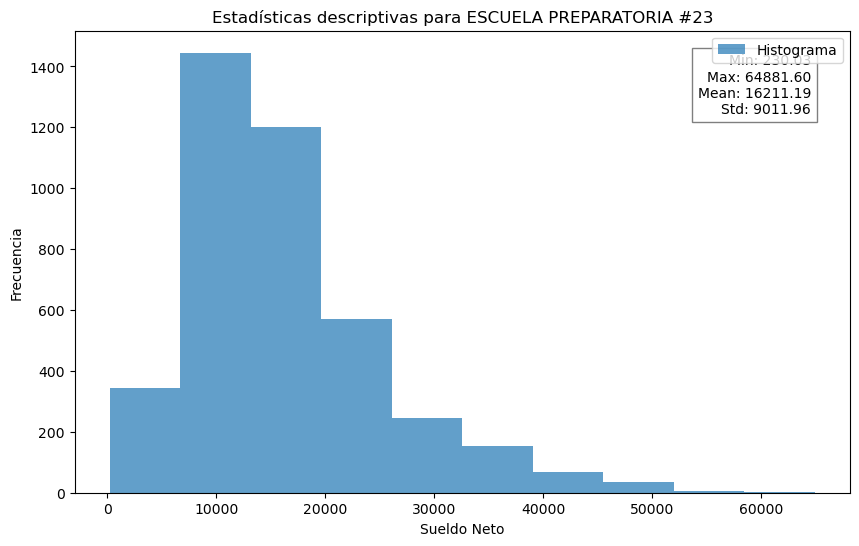

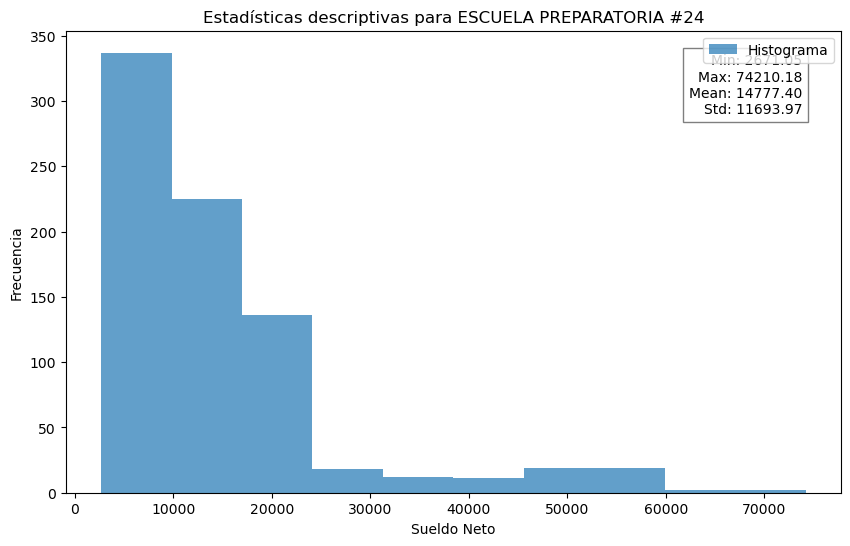

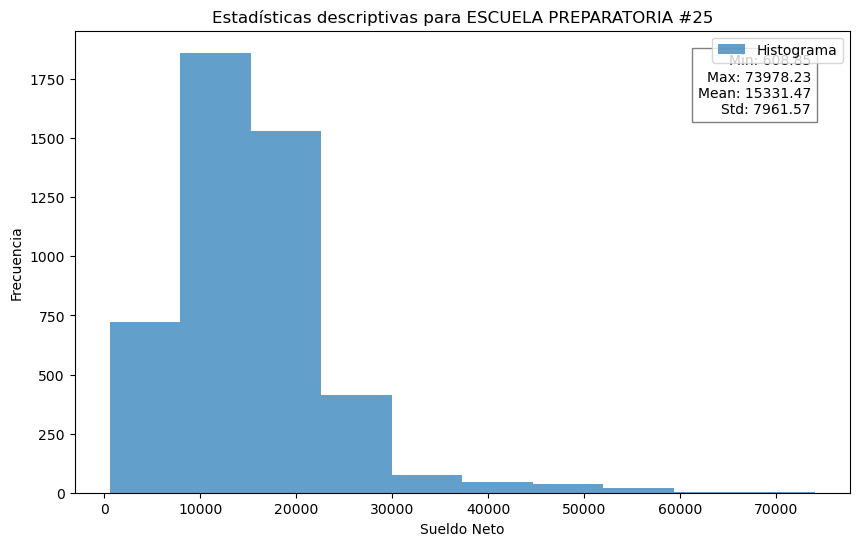

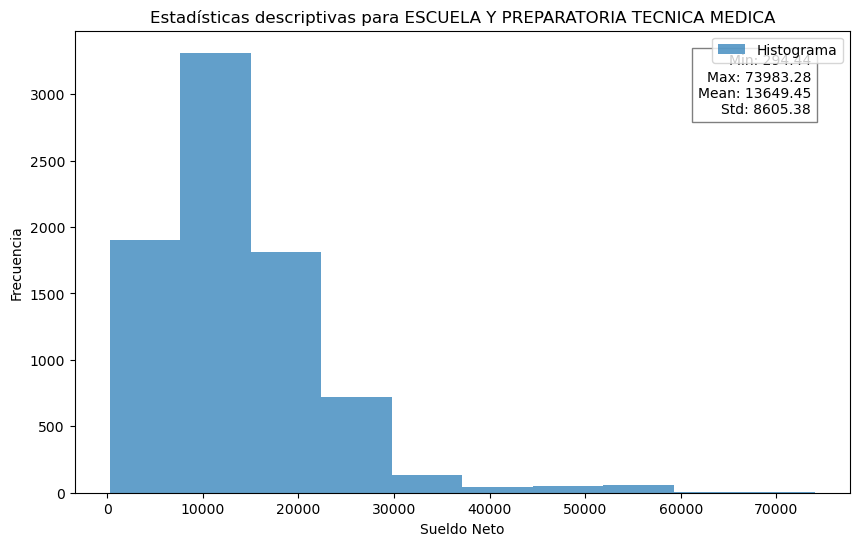

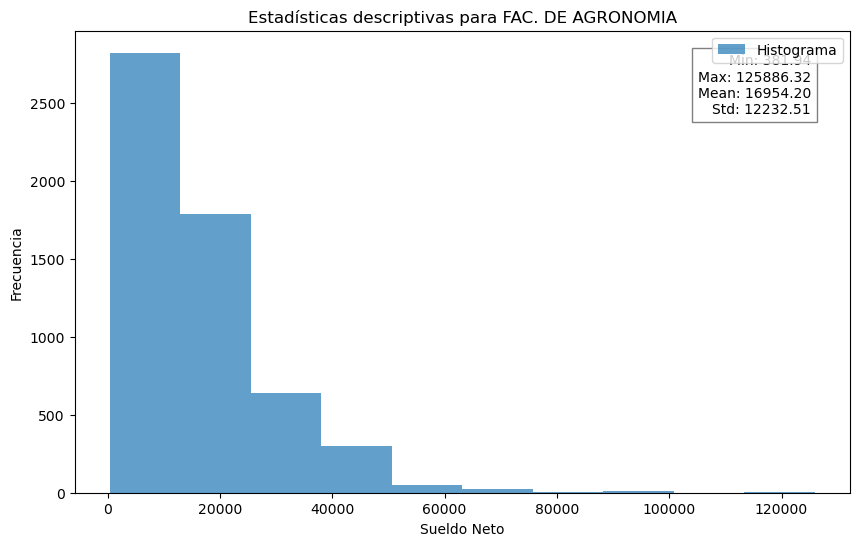

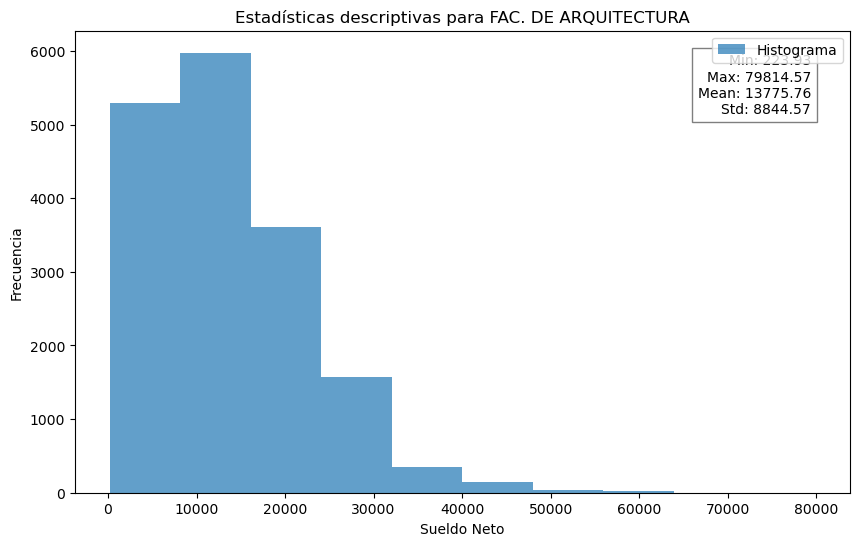

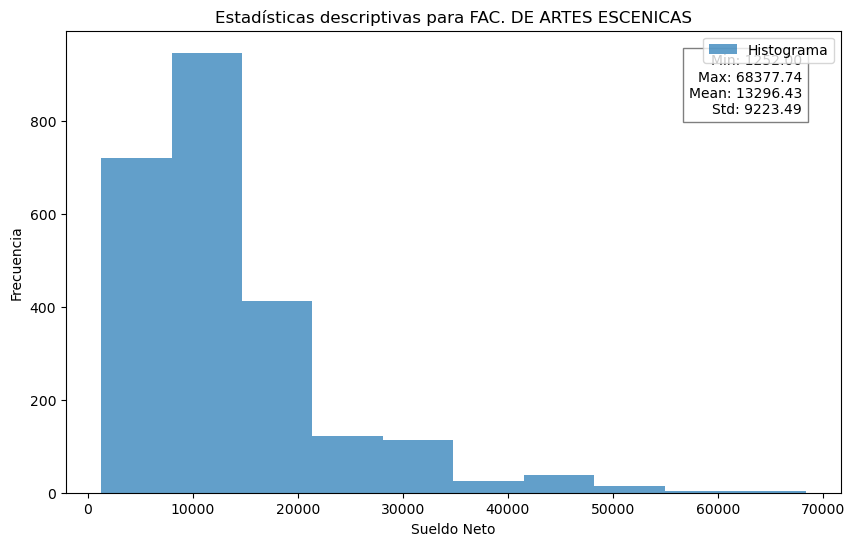

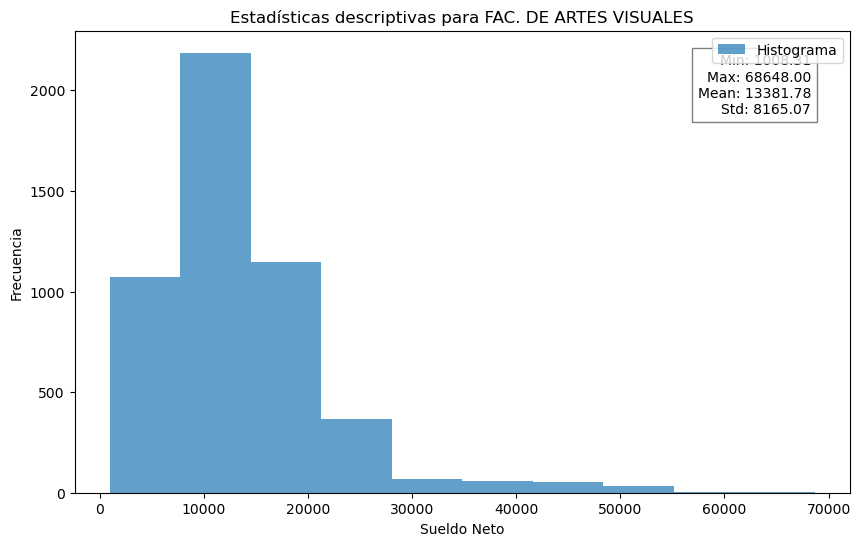

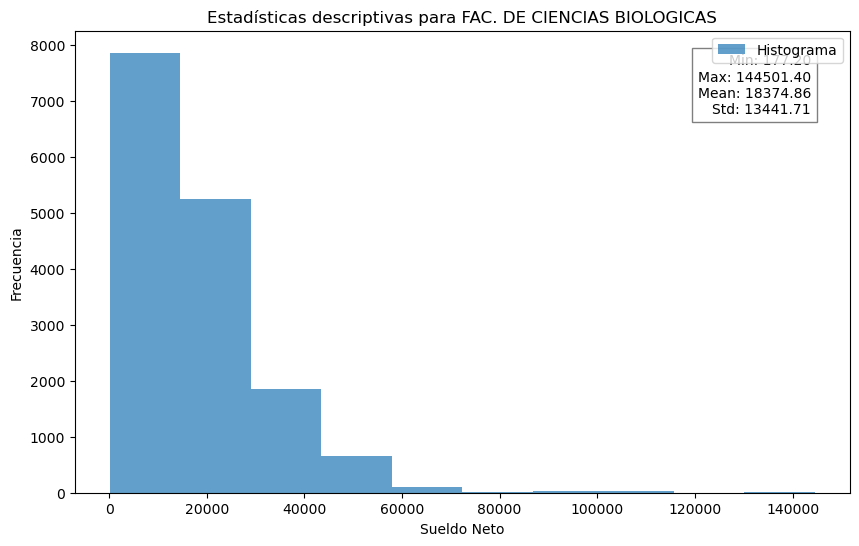

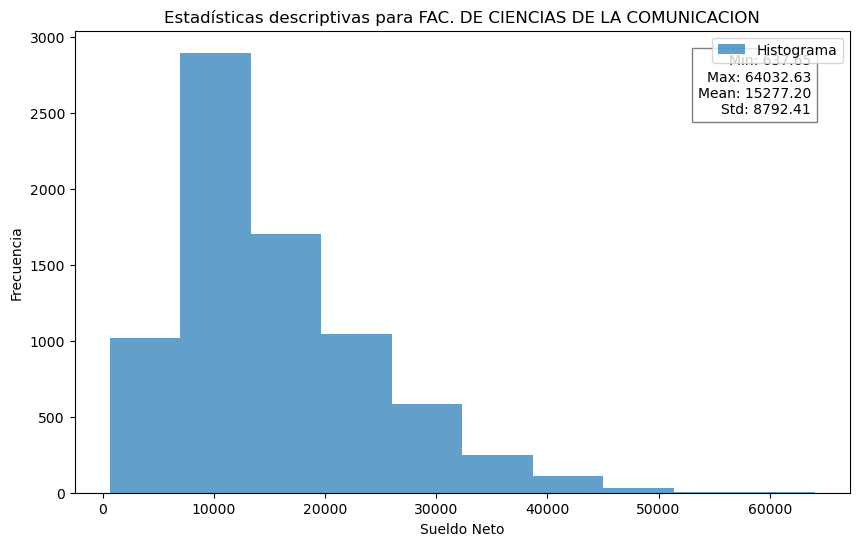

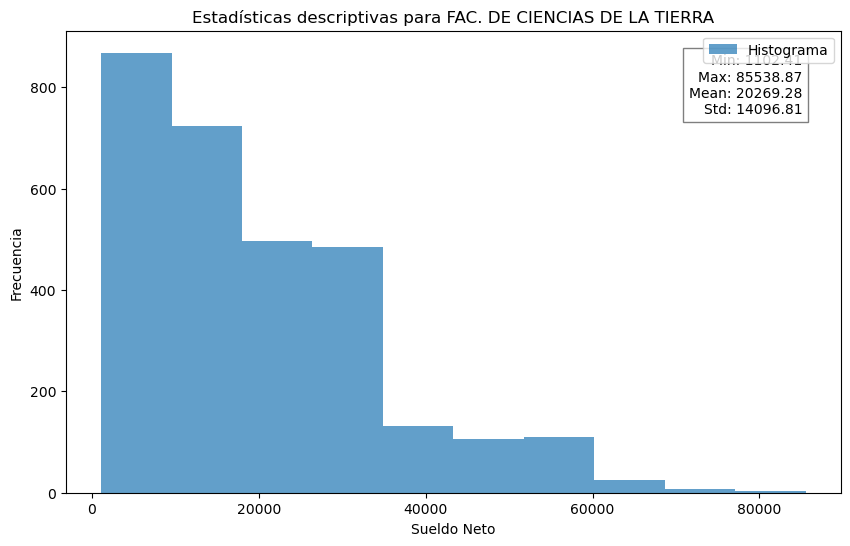

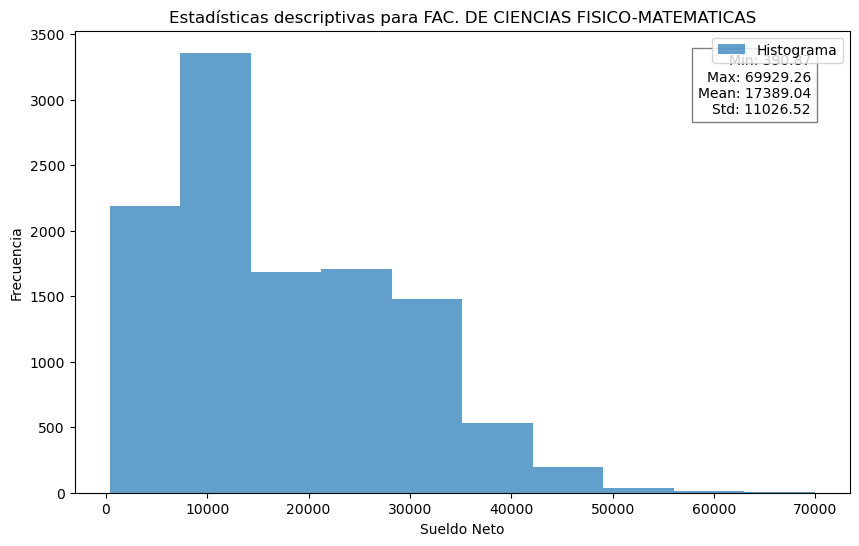

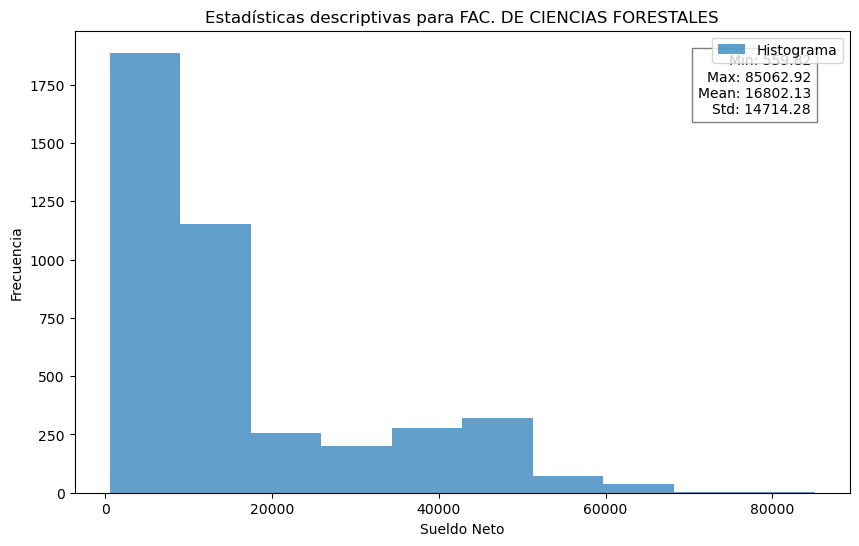

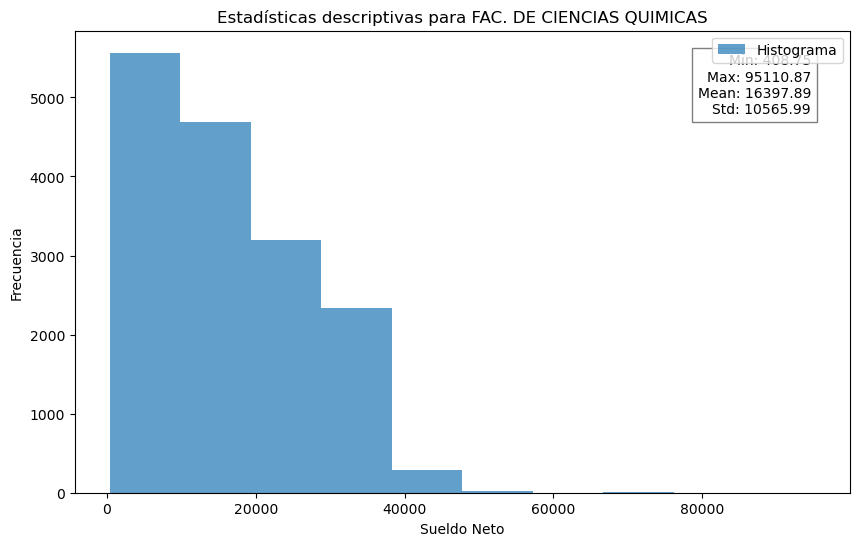

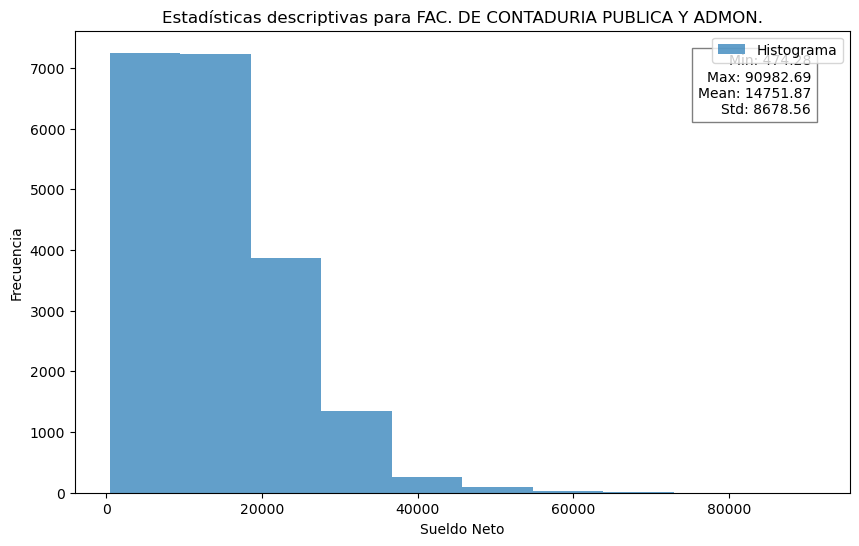

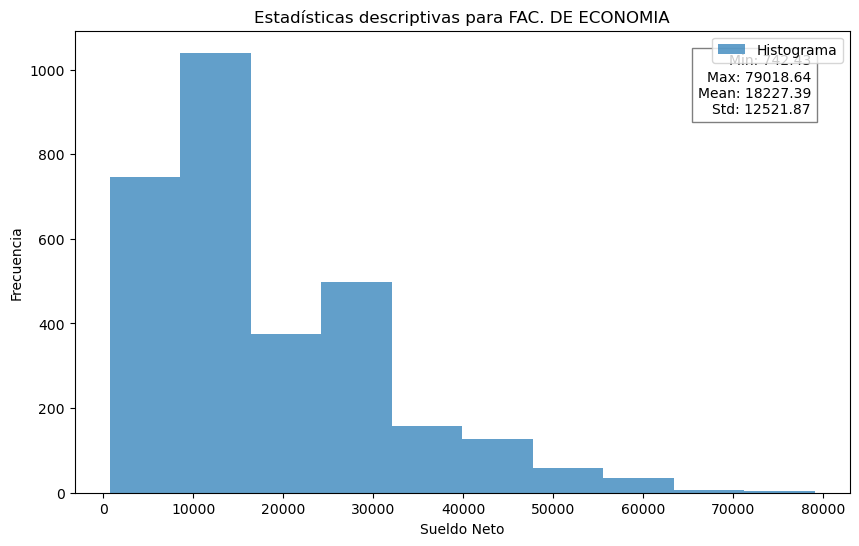

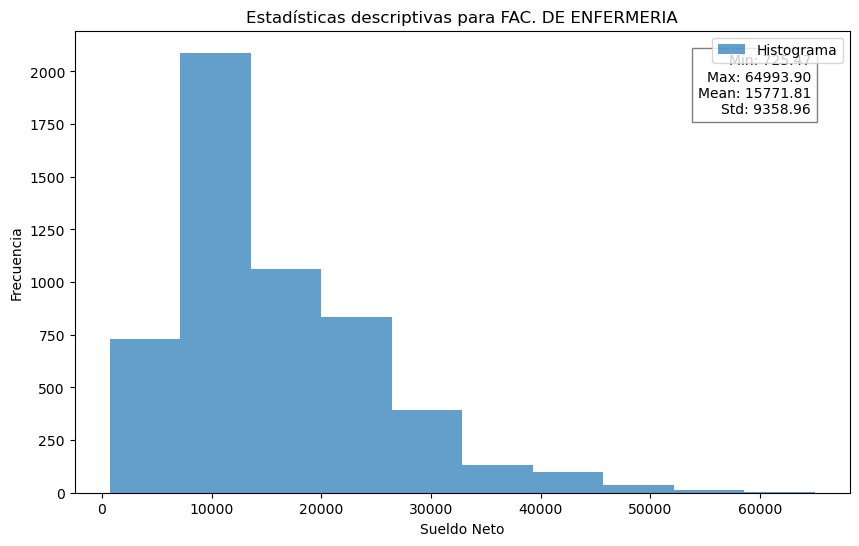

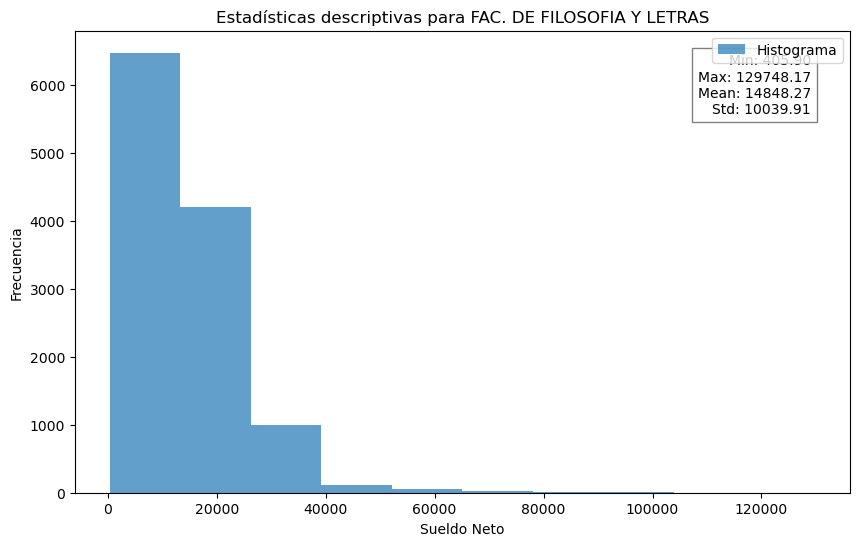

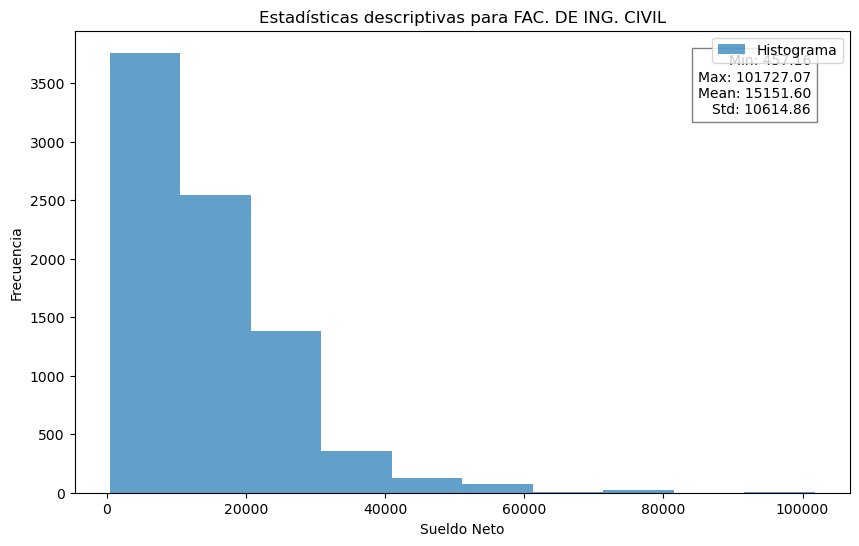

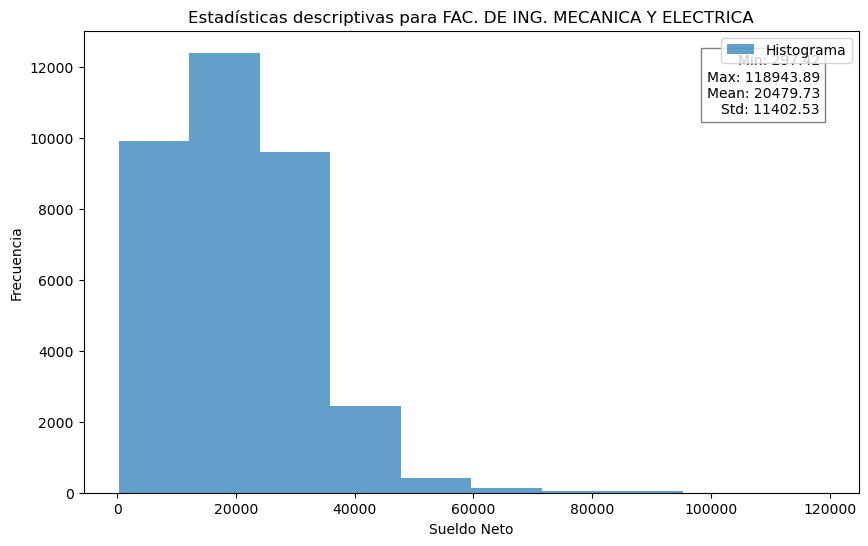

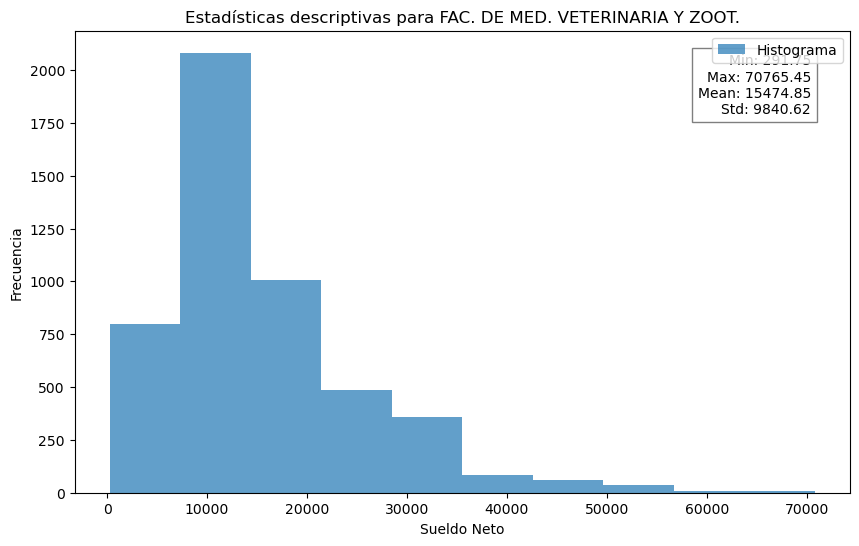

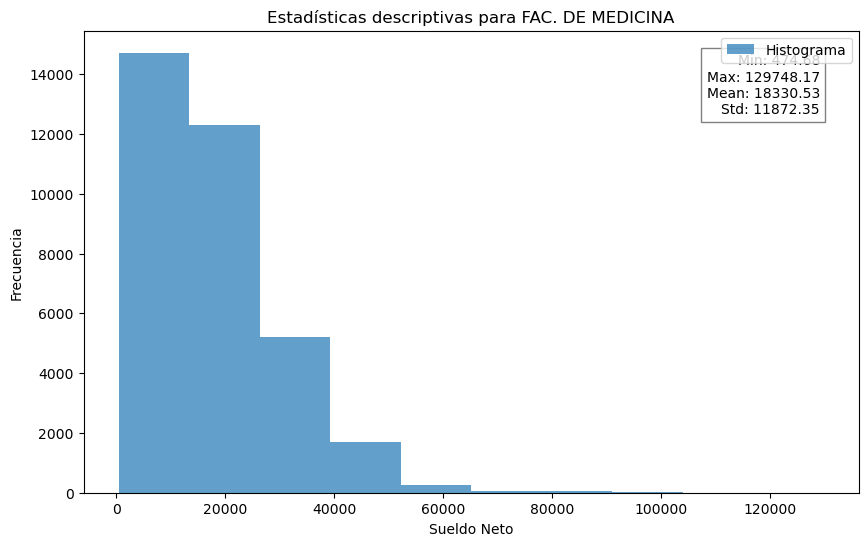

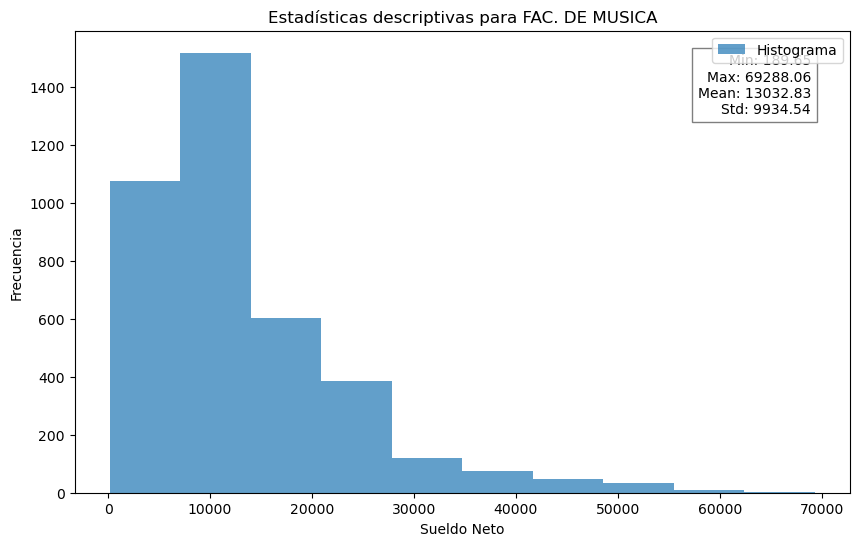

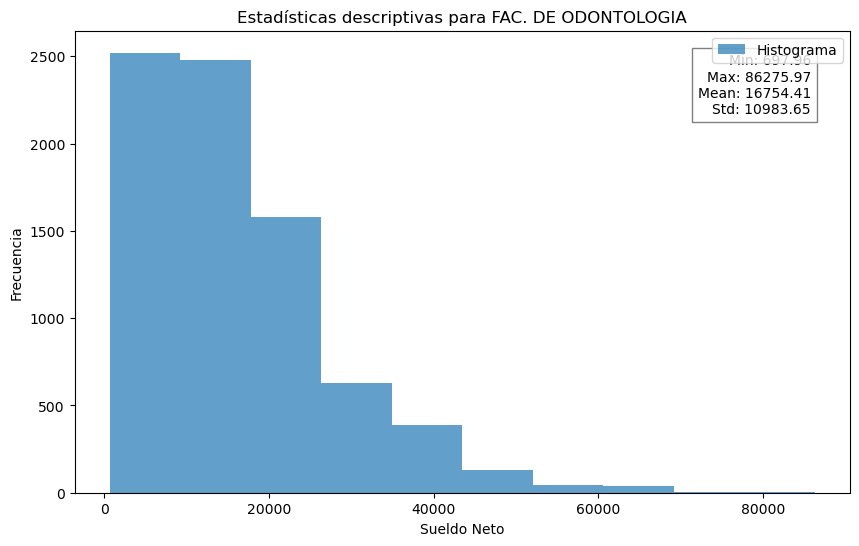

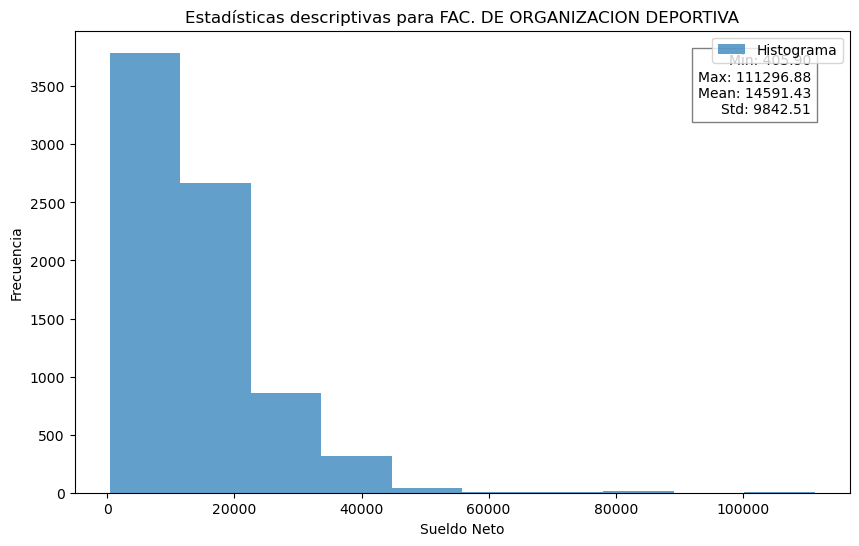

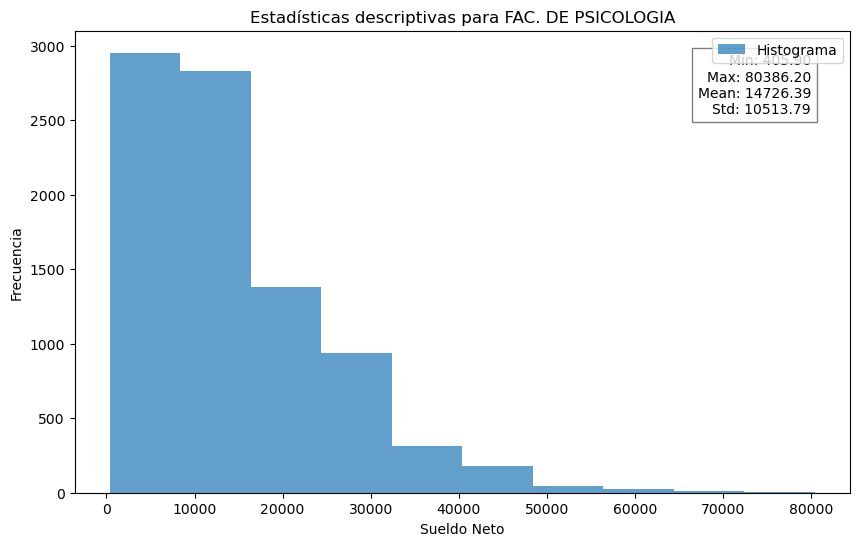

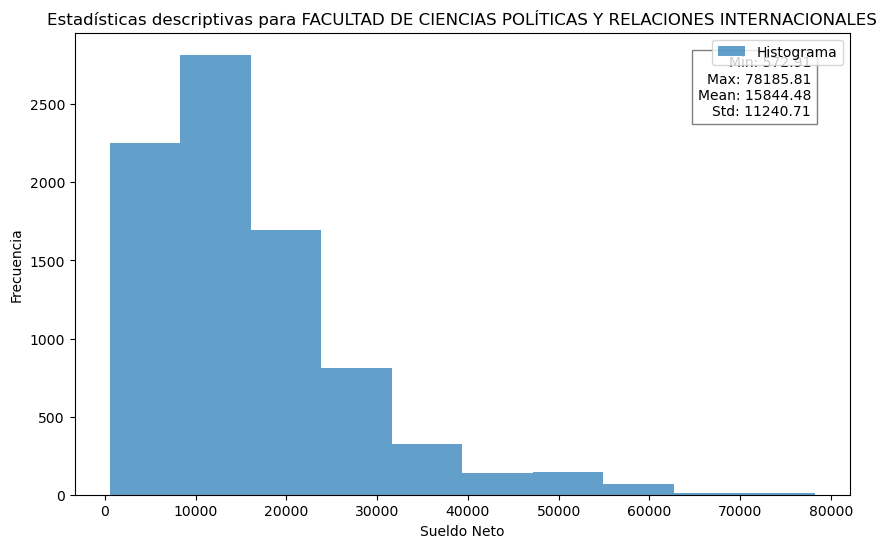

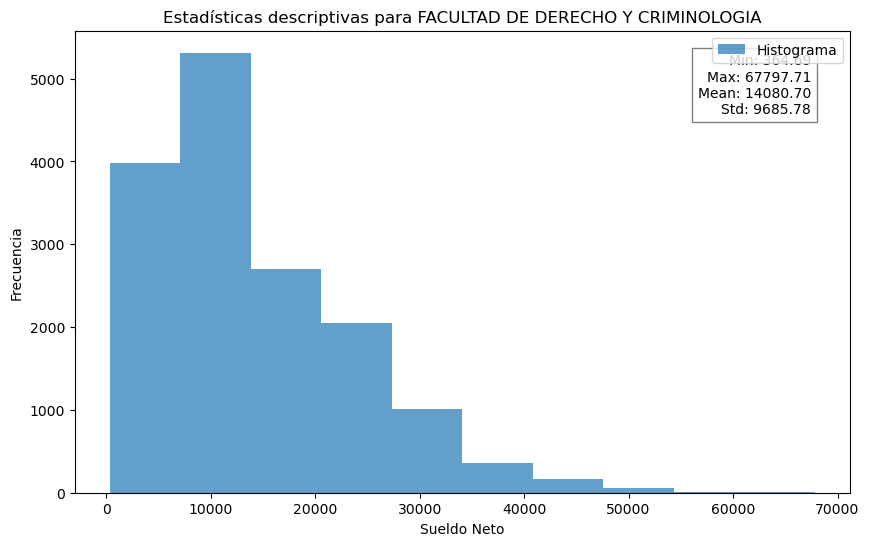

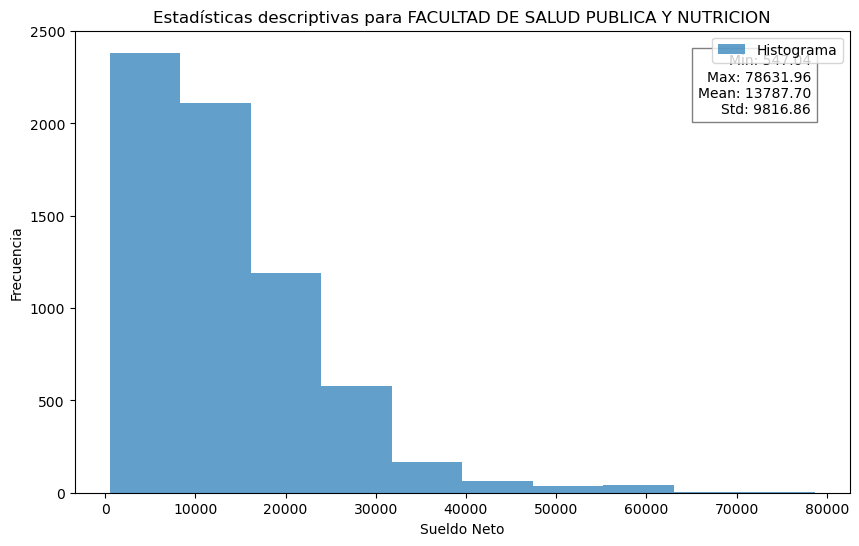

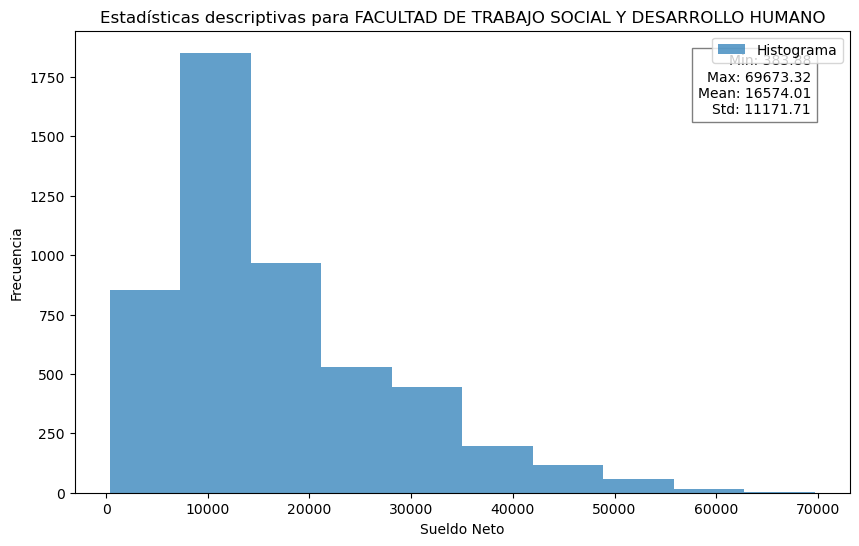

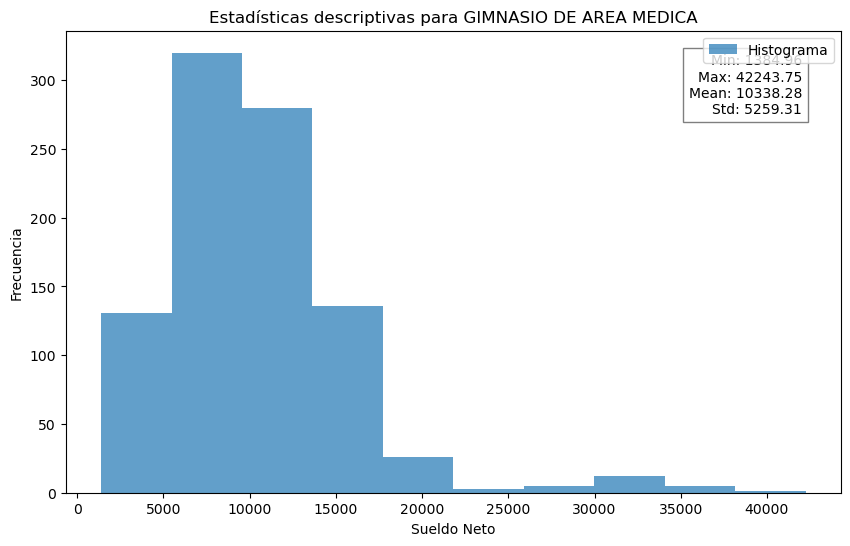

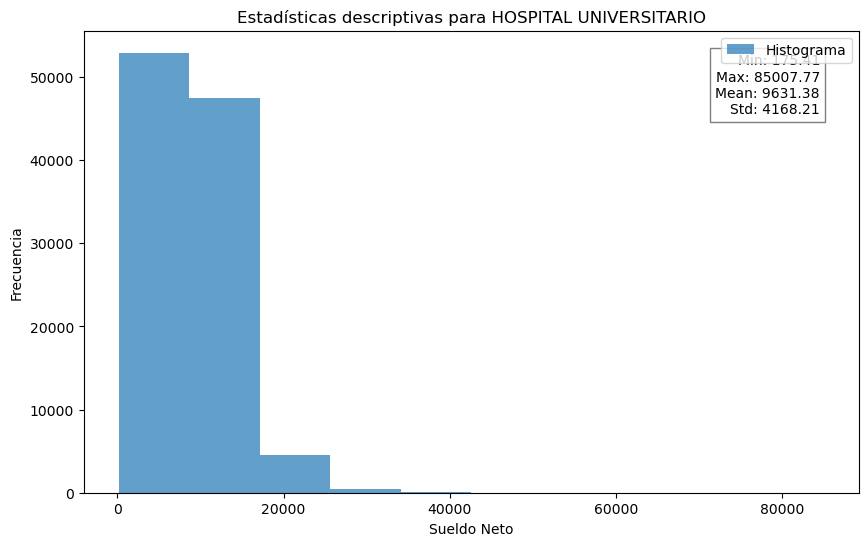

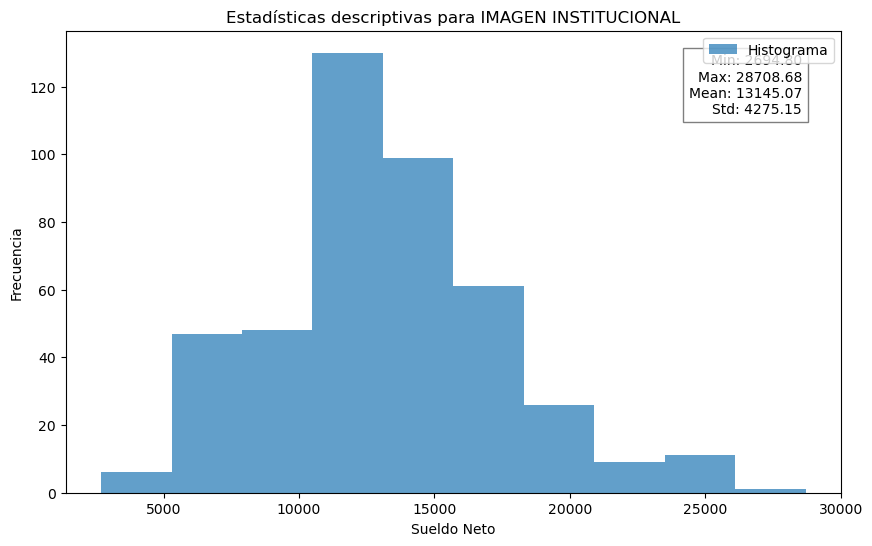

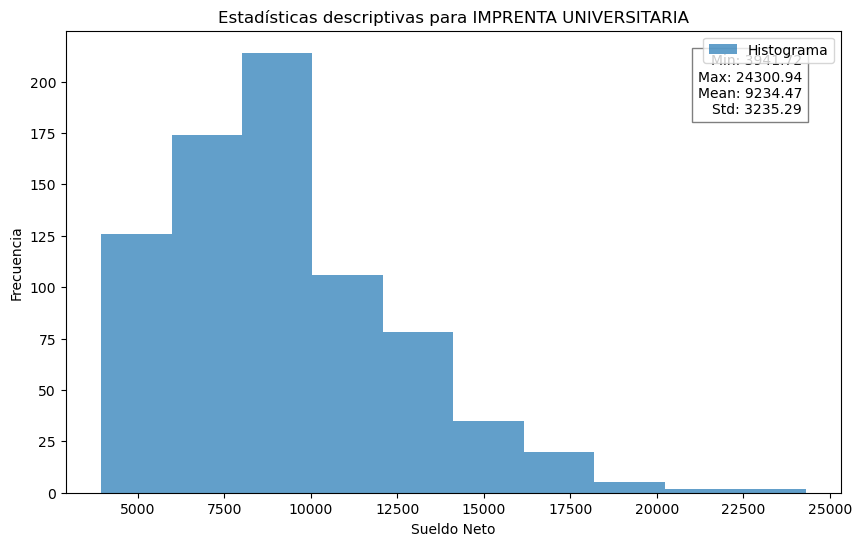

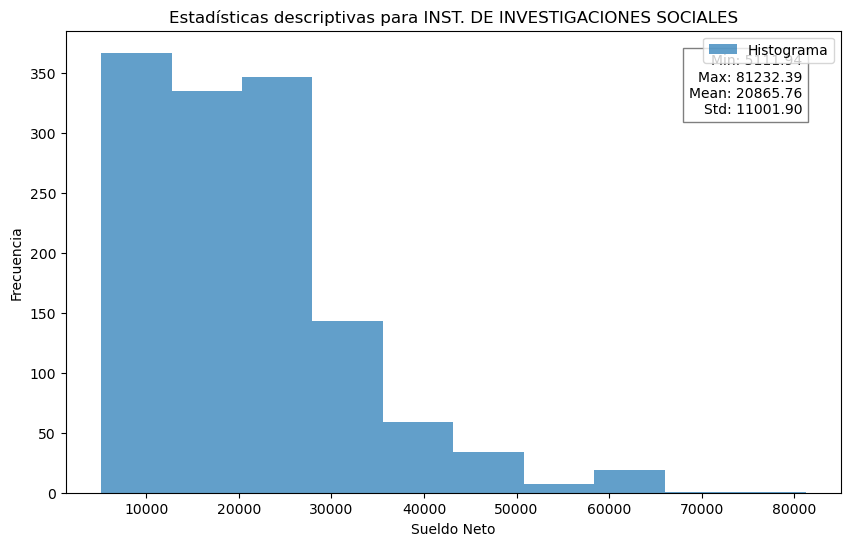

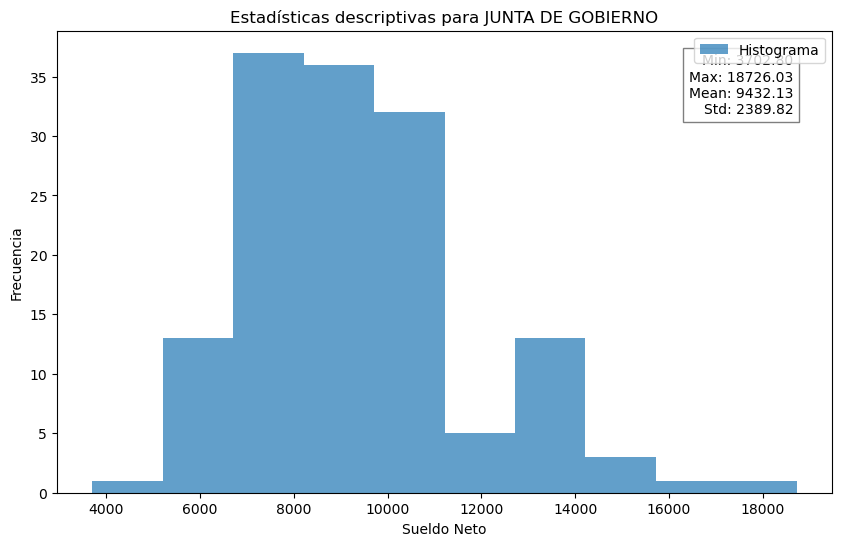

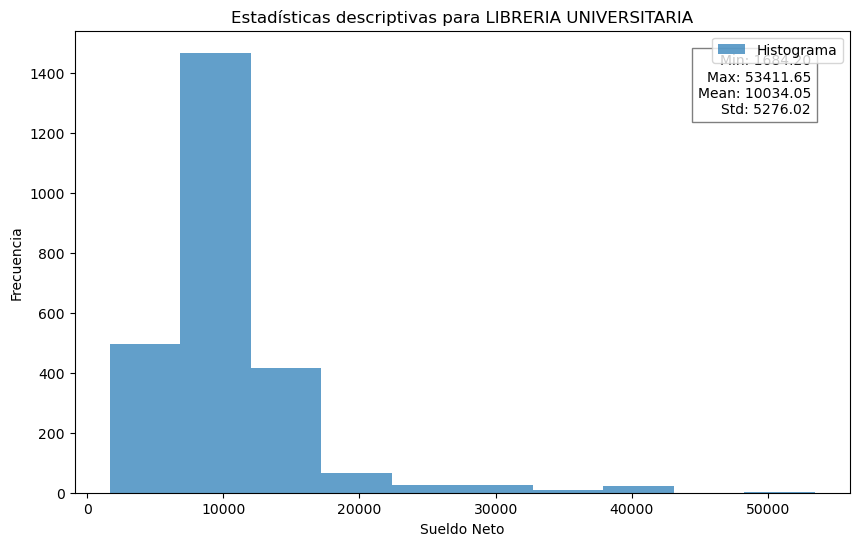

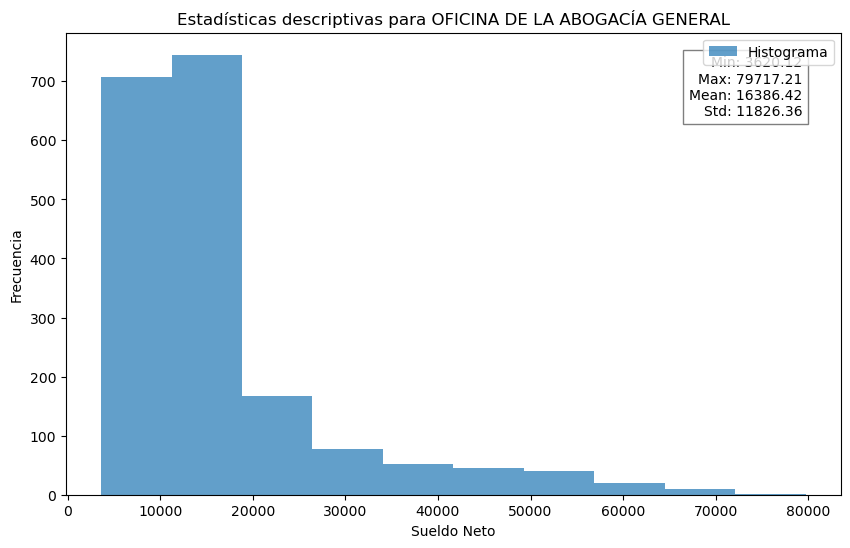

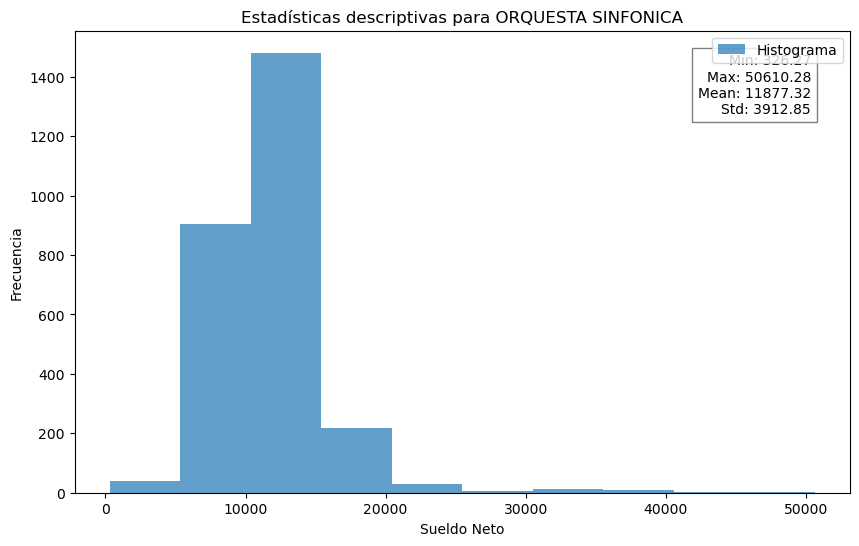

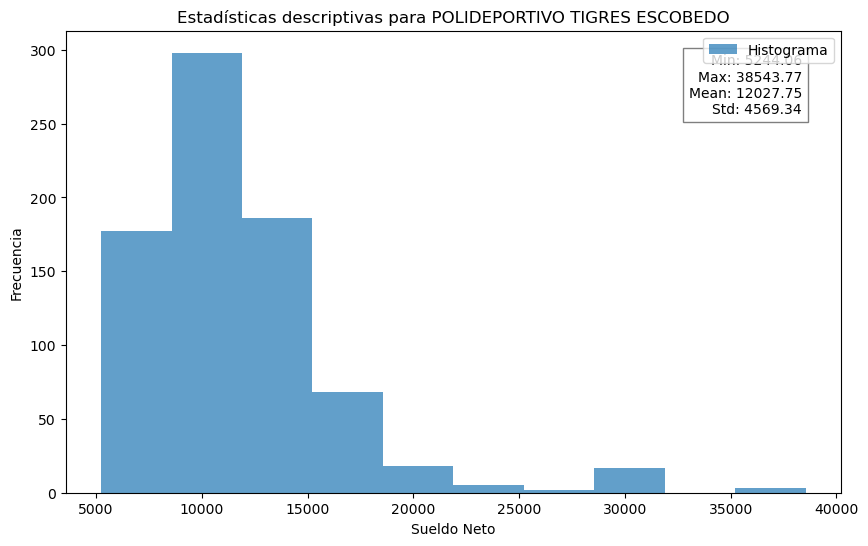

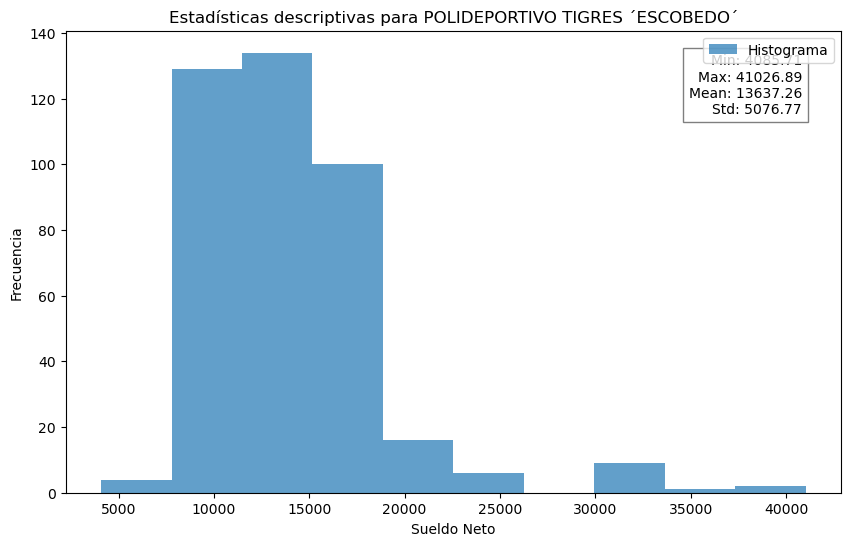

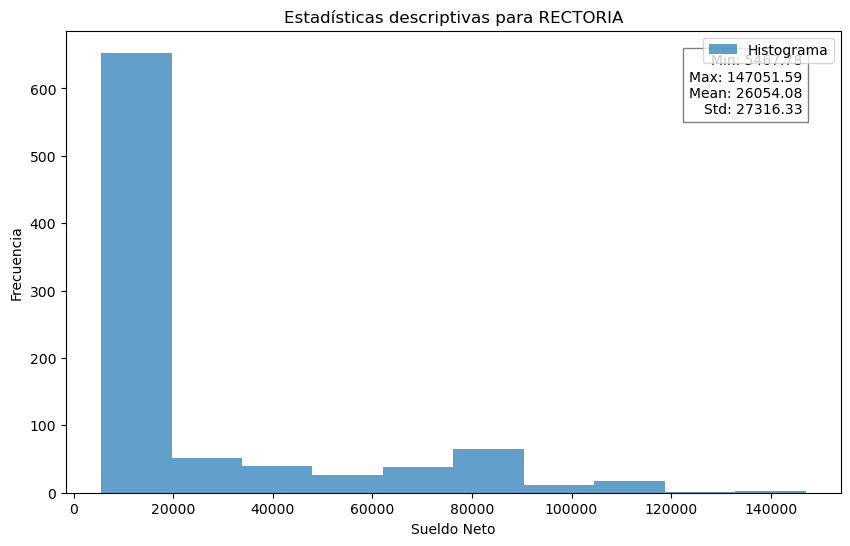

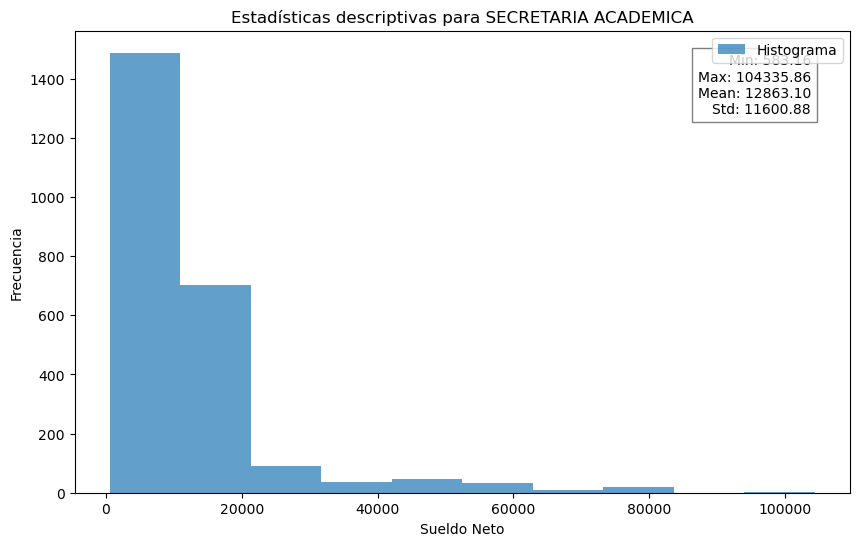

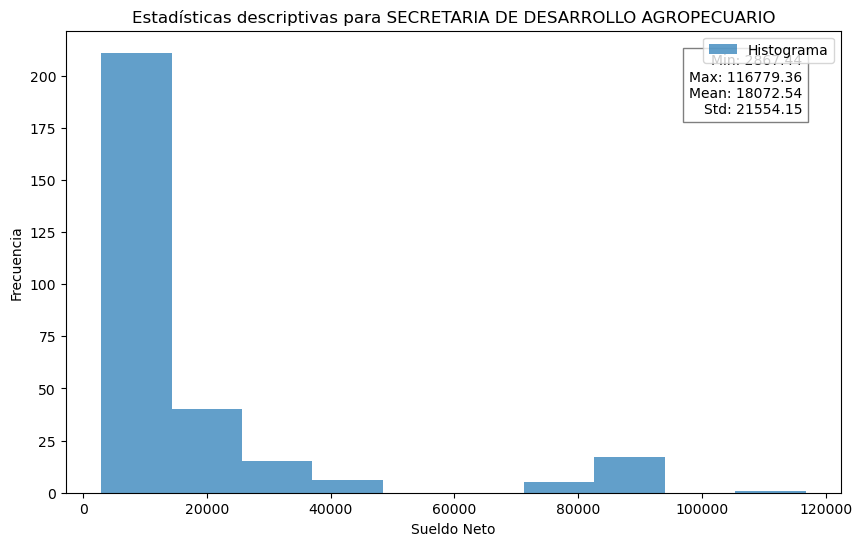

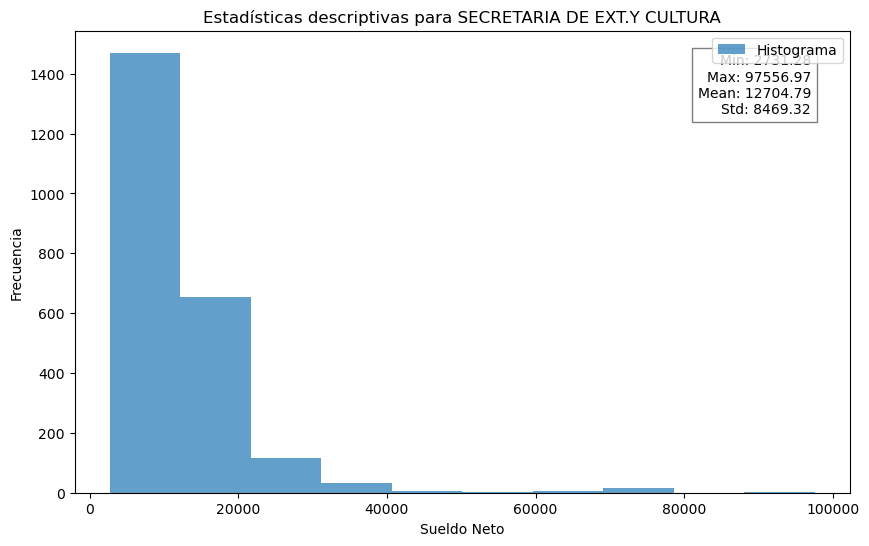

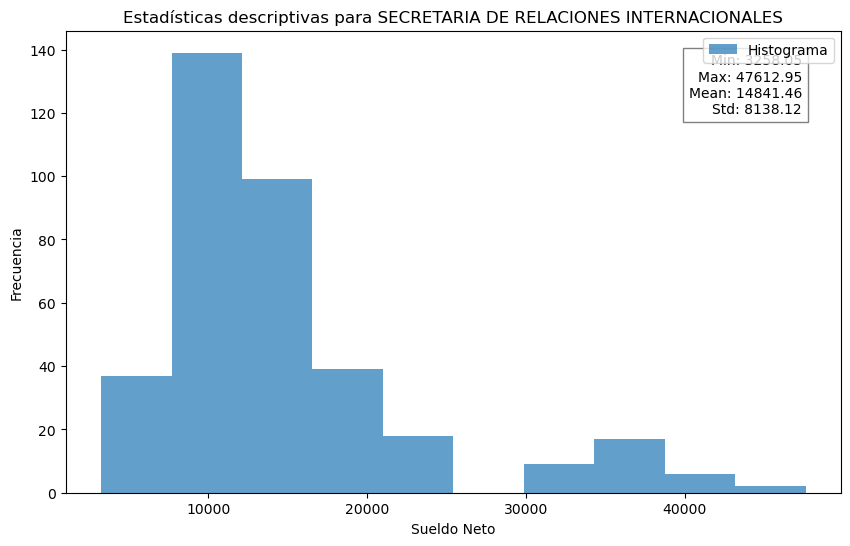

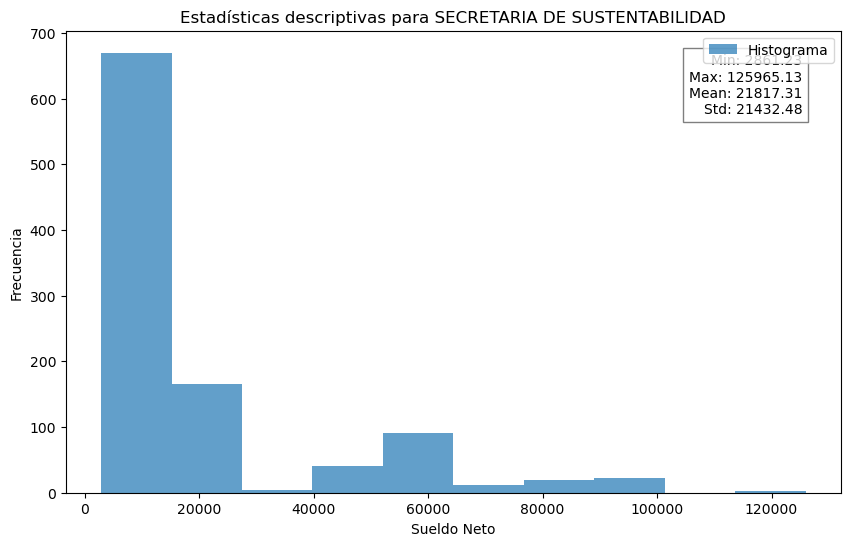

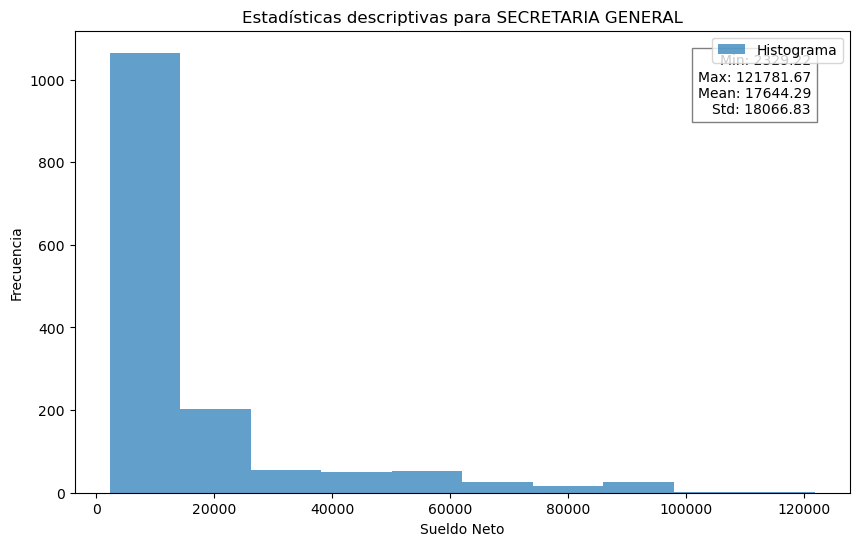

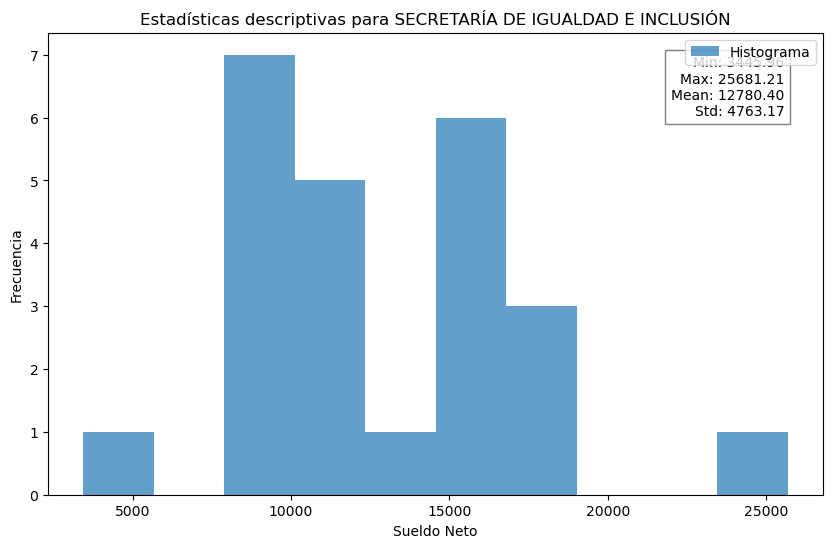

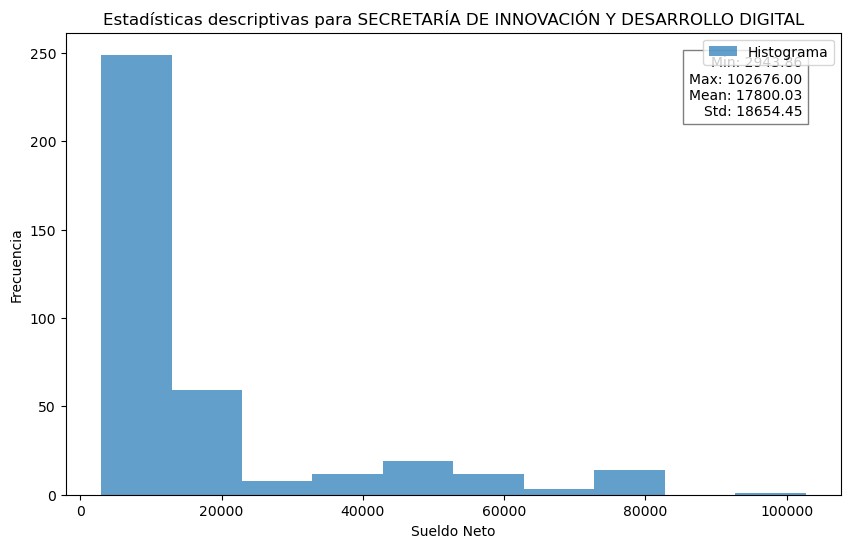

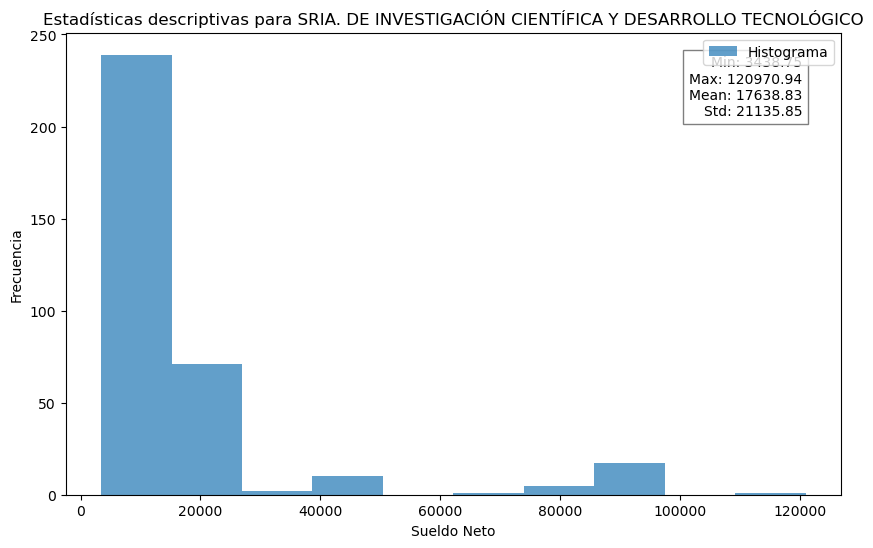

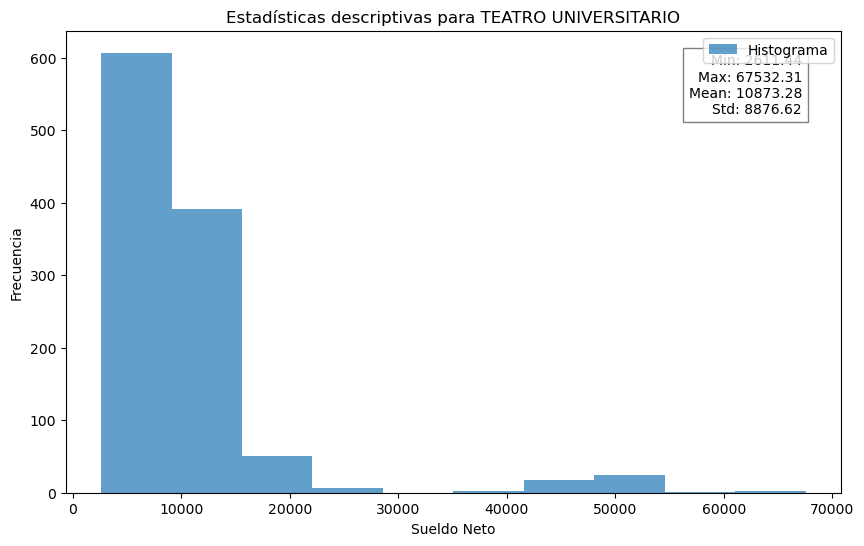

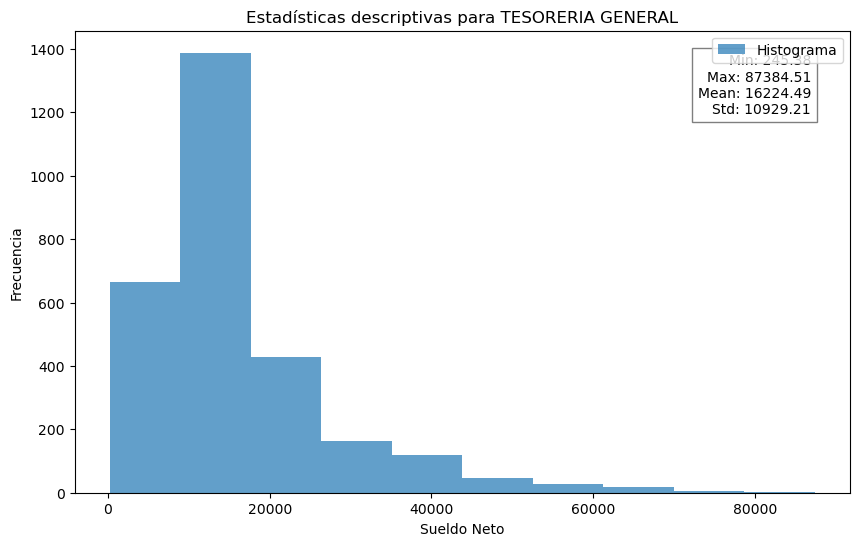

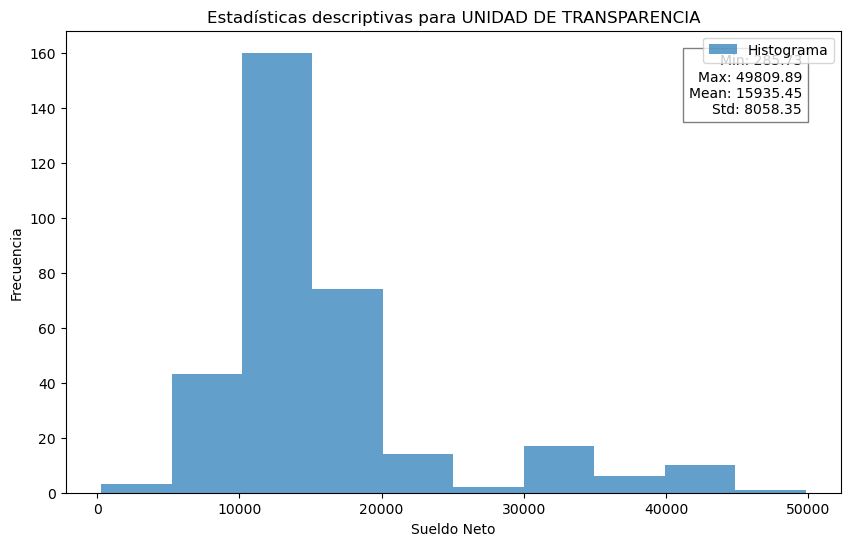

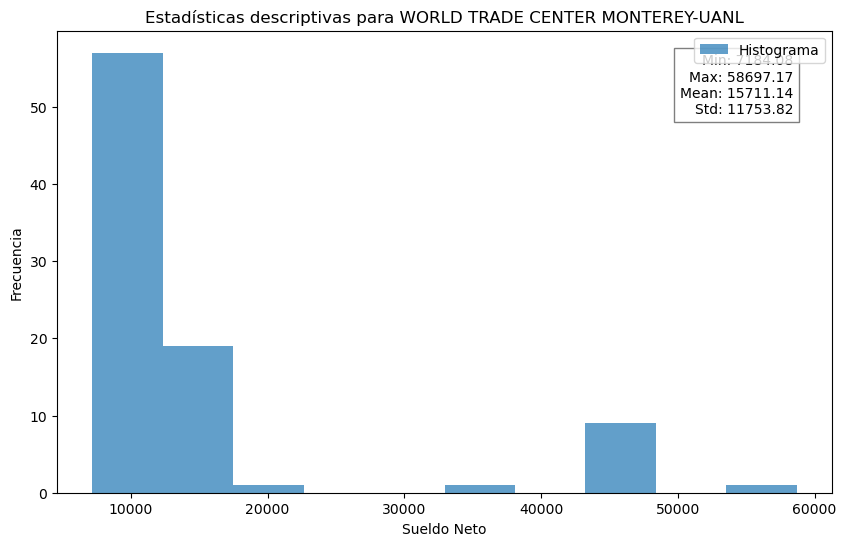

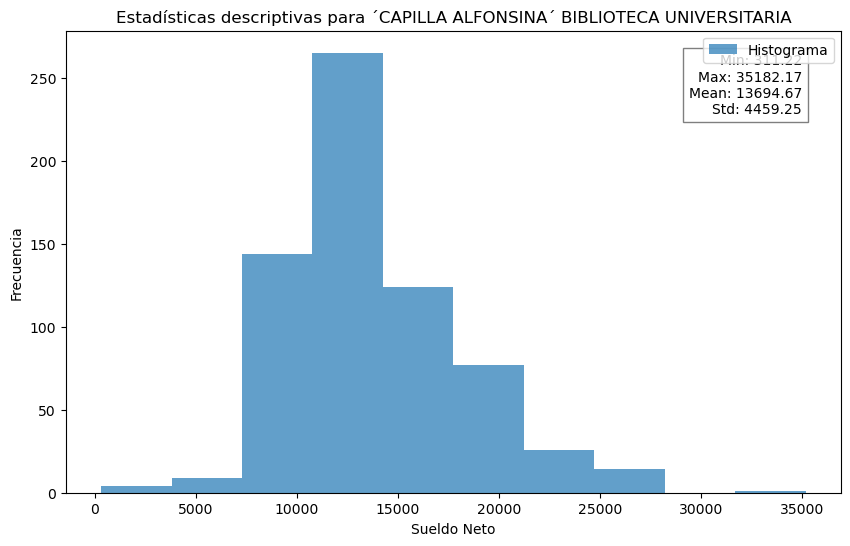

In [163]:
# Graficar las estadísticas descriptivas para cada dependencia
for dependencia in Agrupado_dependencia.index:
    data_dependencia = df[df['dependencia'] == dependencia]['Sueldo Neto']
    
    plt.figure(figsize=(10, 6))
    
    # Histograma del sueldo neto por dependencia
    plt.hist(data_dependencia, bins=10, alpha=0.7, label='Histograma')
    
    # Agregar título y etiquetas
    plt.title(f'Estadísticas descriptivas para {dependencia}')
    plt.xlabel('Sueldo Neto')
    plt.ylabel('Frecuencia')
    
    # Mostrar estadísticas en la gráfica
    stats = Agrupado_dependencia.loc[dependencia]
    textstr = '\n'.join((
        f'Min: {stats["min"]:.2f}',
        f'Max: {stats["max"]:.2f}',
        f'Mean: {stats["mean"]:.2f}',
        f'Std: {stats["std"]:.2f}'))
    
    # Posición del texto
    plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(facecolor='white', alpha=0.5))
    
      
    # Guardar la gráfica en un archivo
    plt.savefig(f'C:/Users/PC/Documents/ML003/Practicas/graficasHistograma_dependencia/Histograma{dependencia}.png')
  
   # Mostrar la gráfica
    plt.legend()
   # plt.show()
    plt.close()

<h2> Histogramas UANL </h2>

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


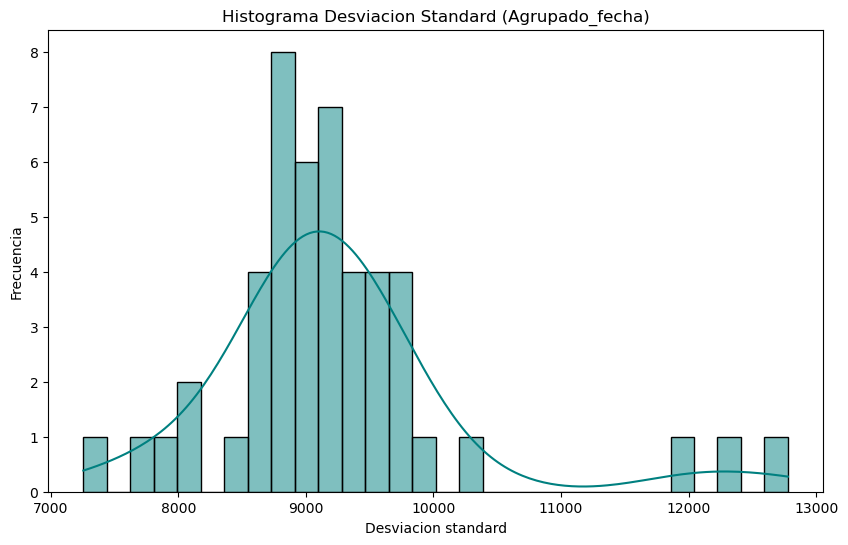

In [104]:
# Histograma de los std   de UANL 
plt.figure(figsize=(10, 6))
sns.histplot(Agrupado_fecha['std'], bins=30,kde=True,  color='teal')
plt.title(f'Histograma Desviacion Standard (Agrupado_fecha)')
plt.xlabel('Desviacion standard')
plt.ylabel('Frecuencia')

# Guardar la gráfica en un archivo
plt.savefig("C:/Users/PC/Documents/ML003/Practicas/GraficaHistogramaDesviacionEstandar.png")
# Mostrar la gráfica
plt.show()
plt.close()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


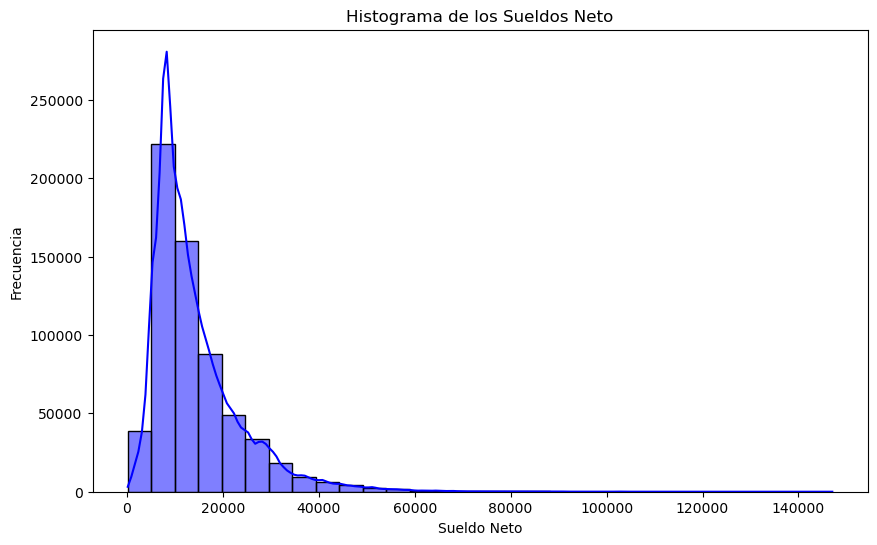

In [105]:
# Histograma de los sueldo netos
plt.figure(figsize=(10, 6))
sns.histplot(df['Sueldo Neto'], bins=30,kde=True,  color='blue')
plt.title(f'Histograma de los Sueldos Neto')
plt.xlabel('Sueldo Neto')
plt.ylabel('Frecuencia')

# Guardar la gráfica en un archivo
plt.savefig("C:/Users/PC/Documents/ML003/Practicas/GraficaHistogramaSueldoNeto.png")
# Mostrar la gráfica
plt.show()
plt.close()

<h2> XPLOT </h2>

In [106]:
# Para  obtener los datos de cierto año, filtramos y obtenemos medidas descriptivas
# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])
# Filtrar por año 
year = 2023
df_year = df[df['Fecha'].dt.year == year]

In [107]:
# Agrupar por mes y calcular la media y suma del Sueldo Neto
df_sueldodanio = df_year.groupby(df_year['Fecha'].dt.month)['Sueldo Neto'].agg(['min','max','mean', 'sum','std'])
print(df_sueldodanio)

          min        max          mean           sum           std
Fecha                                                             
1      472.57  107790.01  14737.152639  1.695362e+08   9632.615820
2      405.90  106374.47  14936.212092  1.915121e+08   9135.333625
3      405.90  102664.94  15088.801769  1.962299e+08   9044.481396
4      348.02  111936.46  15572.479556  2.046380e+08   9673.707718
5      292.15  111936.46  15938.467928  2.091765e+08   9583.269064
6      722.30  147051.59  19782.699780  2.595490e+08  12778.336497
7      415.39  111936.46  15662.398408  1.789116e+08   9891.055852
8      246.65  111936.46  15351.693323  1.924335e+08   9791.976237
9      405.90  111868.46  15403.922615  2.004512e+08   9594.254425
10     267.00  111868.46  15628.432305  2.045449e+08   9409.956725
11     769.70  102596.94  14693.509905  1.967020e+08   8895.890922
12     230.03  117861.97  21298.893514  2.855969e+08  10357.035251


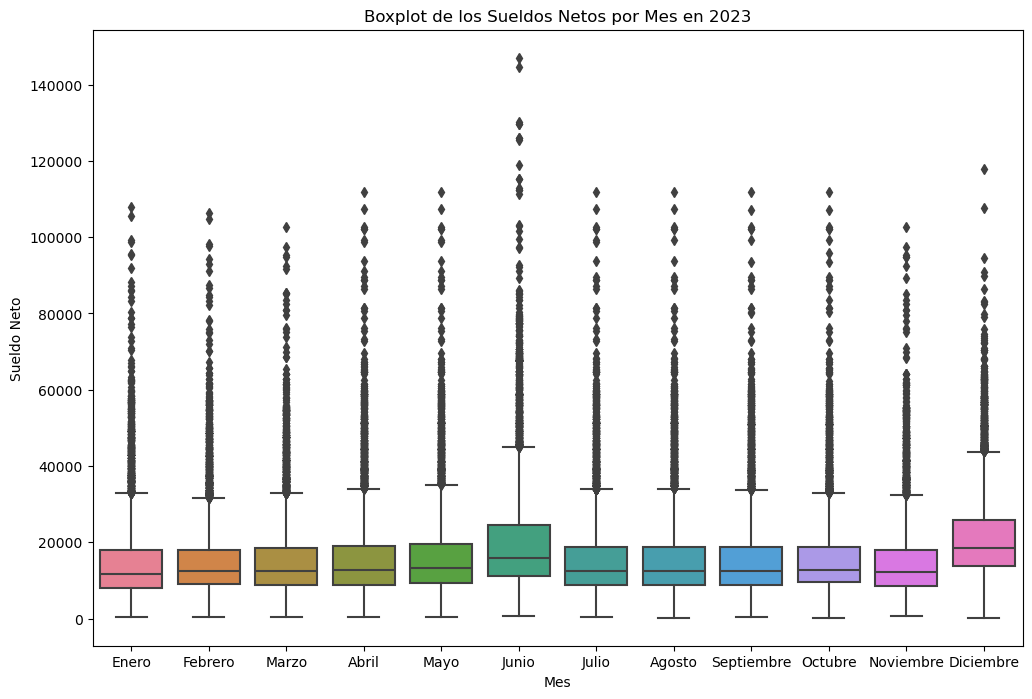

In [109]:
# Boxplot de los saldos neto por mes en el año filtrado
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_year['Fecha'].dt.month, y='Sueldo Neto', data=df_year, palette='husl')
plt.title(f'Boxplot de los Sueldos Netos por Mes en {year}')
plt.xlabel('Mes')
plt.ylabel('Sueldo Neto')
plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

# Guardar la gráfica en un archivo
plt.savefig("C:/Users/PC/Documents/ML003/Practicas/GraficaBoxplotSueldoNeto.png")
# Mostrar la gráfica
plt.show()
plt.close()

<h2>  ANOVA  </h2>

In [133]:
# ANOVA o Prueba no paramétrica
# Comprobando la normalidad de los Saldos Netos por tipo de empleado
normality_tests = df.groupby('Tipo')['Sueldo Neto'].apply(lambda x: normaltest(x).pvalue)
print("Normality test p-values:\n", normality_tests)

Normality test p-values:
 Tipo
ADMIN           0.0
CENTRO          0.0
FACULTAD        0.0
HOSPITAL        0.0
OTRO            0.0
PREPARATORIA    0.0
Name: Sueldo Neto, dtype: float64


In [134]:
# ANOVA o Prueba no paramétrica
# Comprobando la normalidad de los Saldos Netos por tipo de gasto
normality_tests = df.groupby('Tipo')['Sueldo Neto'].apply(lambda x: normaltest(x).pvalue)
print("Normality test p-values:\n", normality_tests)

# Si todas las muestras son normales, realizamos ANOVA
if all(normality_tests > 0.05):
    # Prueba ANOVA
    groups = [group['Sueldo Neto'].values for name, group in df.groupby('Tipo')]
    anova_result = f_oneway(*groups)
    print("ANOVA result:", anova_result)

    if anova_result.pvalue < 0.05:
        # Si ANOVA es significativa, realizar T-test post hoc
        significant_pairs = []
        tipos = df['Tipo'].unique()
        for i, tipo1 in enumerate(tipos):
            for tipo2 in tipos[i+1:]:
                t_stat, p_val = ttest_ind(df[df['Tipo'] == tipo1]['Sueldo Neto'],
                                          df[df['Tipo'] == tipo2]['Sueldo Neto'])
                if p_val < 0.05:
                    significant_pairs.append((tipo1, tipo2, p_val))
        print("Significant pairs (T-test):", significant_pairs)
else:
    # Si no todas las muestras son normales, realizamos Kruskal-Wallis
    # Agrupar los sueldos netos por mes
    groups = [df_year[df_year['Fecha'].dt.month == month]['Sueldo Neto'].values for month in range(1, 13)]
    # Realizar la prueba Kruskal-Wallis
    kruskal_result = kruskal(*groups)
    print(f"Resultado de la prueba Kruskal-Wallis: {kruskal_result}")
    kruskal_result = kruskal(*groups)
    print("Kruskal-Wallis result:", kruskal_result)

    if kruskal_result.pvalue < 0.05:
        # Si Kruskal-Wallis es significativa, realizar Tukey HSD post hoc
        tukey_result = pairwise_tukeyhsd(endog=df['Sueldo Neto'], groups=df['Tipo'])
        print(tukey_result)

Normality test p-values:
 Tipo
ADMIN           0.0
CENTRO          0.0
FACULTAD        0.0
HOSPITAL        0.0
OTRO            0.0
PREPARATORIA    0.0
Name: Sueldo Neto, dtype: float64
Resultado de la prueba Kruskal-Wallis: KruskalResult(statistic=8836.727472747005, pvalue=0.0)
Kruskal-Wallis result: KruskalResult(statistic=8836.727472747005, pvalue=0.0)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1     group2     meandiff  p-adj   lower      upper    reject
-------------------------------------------------------------------
   ADMIN       CENTRO  -518.2844   0.0  -709.9208   -326.648   True
   ADMIN     FACULTAD  3211.3688   0.0  3103.8192  3318.9183   True
   ADMIN     HOSPITAL -3672.8157   0.0 -3797.8074 -3547.8241   True
   ADMIN         OTRO -1890.4612   0.0 -2147.5405 -1633.3819   True
   ADMIN PREPARATORIA   976.8796   0.0   858.8224  1094.9367   True
  CENTRO     FACULTAD  3729.6532   0.0  3555.8009  3903.5054   True
  CENTRO     HOSPITAL -3154.531

<h2> Ciclo de  graficas </h2>

In [182]:
import os
# Crear una carpeta principal para las gráficas
if not os.path.exists('GraficasLinea_Dependencia'):
    os.makedirs('C:/Users/PC/Documents/ML003/Practicas/GraficasLinea_DependenciaMaxSueldoNeto')


In [183]:
import matplotlib.pyplot as plt

# Agrupar por fecha y dependencia y calcular el sueldo neto máximo
max_sueldo_por_fecha_dependencia = df.groupby(['Fecha', 'dependencia'])['Sueldo Neto'].max().reset_index()
print(max_sueldo_por_fecha_dependencia)

# Obtener la lista de dependencias
dependencias = df['dependencia'].unique()

# Graficar el sueldo neto máximo por fecha para cada dependencia
for dependencia in dependencias:
    data_dependencia = max_sueldo_por_fecha_dependencia[max_sueldo_por_fecha_dependencia['dependencia'] == dependencia]
    
    plt.figure(figsize=(10, 6))
    
    # Gráfica de líneas del sueldo neto máximo por fecha para la dependencia
    plt.plot(data_dependencia['Fecha'], data_dependencia['Sueldo Neto'], marker='o', linestyle='-', color='m', label='Sueldo Neto Máximo')
    
    # Agregar título y etiquetas
    plt.title(f'Comportamiento del Sueldo Neto Máximo para {dependencia} por Fecha')
    plt.xlabel('Fecha')
    plt.ylabel('Sueldo Neto Máximo')
    
    # Mostrar leyenda y gráfico
    plt.legend()
    
    # Crear una subcarpeta para la dependencia
    subfolder_path = os.path.join('C:/Users/PC/Documents/ML003/Practicas/GraficasLinea_DependenciaMaxSueldoNeto', dependencia)
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)
    
    # Guardar la gráfica en un archivo
    filename = f'{subfolder_path}/{dependencia}_sueldo_neto_maximo.png'
    plt.savefig(filename)
    plt.close()


          Fecha                                        dependencia  \
0    2019-12-01                   AUDITORIA INTERNA DE LA U.A.N.L.   
1    2019-12-01  C. INNOVACION; INVEST. Y DESLLO. DE INGENIERIA...   
2    2019-12-01                         C.DE ESTUDIOS HUMANISTICOS   
3    2019-12-01                      C.DE INV.Y DES.DE ED.BILINGUE   
4    2019-12-01         CAPILLA ALFONSINA BIBLIOTECA UNIVERSITARIA   
...         ...                                                ...   
6119 2024-01-01  SRIA. DE INVESTIGACIÓN CIENTÍFICA Y DESARROLLO...   
6120 2024-01-01                               TEATRO UNIVERSITARIO   
6121 2024-01-01                                  TESORERIA GENERAL   
6122 2024-01-01                            UNIDAD DE TRANSPARENCIA   
6123 2024-01-01       ´CAPILLA ALFONSINA´ BIBLIOTECA UNIVERSITARIA   

      Sueldo Neto  
0        36971.50  
1        20327.44  
2        13720.68  
3        48355.60  
4        17748.66  
...           ...  
6119     20946.49  